In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data to python environment
data=pd.read_excel(r"C:\Users\Dell\Downloads\singapore.xlsx")

In [4]:
data.head()

case  Year    R.mth       date     intv_nam Country_residence  \
0    18  2015  January 2015-01-01    Cindy Liu         Indonesia   
1    41  2015  January 2015-01-01  Philip Chew         Indonesia   
2    43  2015  January 2015-01-01  Philip Chew         Indonesia   
3    44  2015  January 2015-01-01  Philip Chew         Indonesia   
4    45  2015  January 2015-01-01  Philip Chew         Indonesia   

  City_residence      Purpose_grp  \
0     Yogyakarta          Leisure   
1          Batam          Leisure   
2          Batam          Leisure   
3          Batam          Leisure   
4          Batam  Others/ Refused   

                                            Purpose  Weights_QTR  ...  \
0                             Holiday/ Rest & Relax   632.145161  ...   
1                             Holiday/ Rest & Relax   341.937500  ...   
2                             Holiday/ Rest & Relax   432.866667  ...   
3                                            Others   368.285714  ...   
4  Others - Personal (e.g. weddings, funerals, etc)   315.254902  ...   

  tototh_$ totshopping_$     totexp_$                           MainAccomm  \
0      0.0    854.853136  1096.186995                                Hotel   
1      0.0    171.519802   379.309926                                Hotel   
2      0.0    104.853136   420.727677                                Hotel   
3      0.0    220.853136   378.990074  Accommodation not required - Others   
4      0.0    104.853136   342.356298                                Hotel   

              MainHotel              travel_companion.1  \
0      V Hotel Lavender                          Spouse   
1          Madras Hotel                          Spouse   
2    Hotel 81 - Geylang                          Spouse   
3                   NaN  Partner/ Boyfriend/ Girlfriend   
4  Hotel 81 - Bencoolen         Parents/ Parents-in-law   

        travel_companion.2 travel_companion.3 travel_companion.4  \
0   Children aged 8-12 yrs                NaN                NaN   
1    Children aged 0-7 yrs            Friends                NaN   
2   Children aged 8-12 yrs                NaN                NaN   
3  Parents/ Parents-in-law           Siblings                NaN   
4                 Siblings                NaN                NaN   

  travel_companion.5  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 48 columns]

# **Exploratory Data Analysis**

In [5]:
#Checking dimensions
data.shape

(8887, 48)

Dataset contains 8887 rows and 48 columns

In [6]:
data.head()

case  Year    R.mth       date     intv_nam Country_residence  \
0    18  2015  January 2015-01-01    Cindy Liu         Indonesia   
1    41  2015  January 2015-01-01  Philip Chew         Indonesia   
2    43  2015  January 2015-01-01  Philip Chew         Indonesia   
3    44  2015  January 2015-01-01  Philip Chew         Indonesia   
4    45  2015  January 2015-01-01  Philip Chew         Indonesia   

  City_residence      Purpose_grp  \
0     Yogyakarta          Leisure   
1          Batam          Leisure   
2          Batam          Leisure   
3          Batam          Leisure   
4          Batam  Others/ Refused   

                                            Purpose  Weights_QTR  ...  \
0                             Holiday/ Rest & Relax   632.145161  ...   
1                             Holiday/ Rest & Relax   341.937500  ...   
2                             Holiday/ Rest & Relax   432.866667  ...   
3                                            Others   368.285714  ...   
4  Others - Personal (e.g. weddings, funerals, etc)   315.254902  ...   

  tototh_$ totshopping_$     totexp_$                           MainAccomm  \
0      0.0    854.853136  1096.186995                                Hotel   
1      0.0    171.519802   379.309926                                Hotel   
2      0.0    104.853136   420.727677                                Hotel   
3      0.0    220.853136   378.990074  Accommodation not required - Others   
4      0.0    104.853136   342.356298                                Hotel   

              MainHotel              travel_companion.1  \
0      V Hotel Lavender                          Spouse   
1          Madras Hotel                          Spouse   
2    Hotel 81 - Geylang                          Spouse   
3                   NaN  Partner/ Boyfriend/ Girlfriend   
4  Hotel 81 - Bencoolen         Parents/ Parents-in-law   

        travel_companion.2 travel_companion.3 travel_companion.4  \
0   Children aged 8-12 yrs                NaN                NaN   
1    Children aged 0-7 yrs            Friends                NaN   
2   Children aged 8-12 yrs                NaN                NaN   
3  Parents/ Parents-in-law           Siblings                NaN   
4                 Siblings                NaN                NaN   

  travel_companion.5  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 48 columns]

In [7]:
#Checking columns
data.columns

Index(['case', 'Year', 'R.mth', 'date', 'intv_nam', 'Country_residence',
       'City_residence', 'Purpose_grp', 'Purpose', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'langint', '1st_visit',
       'length_stay', 'travel_type', 'f1_gender', 'f3_occupation',
       'f4_industry', 'f5_designation', 'f5_designation.oth', 'shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$',
       'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
       'tototh_$', 'totshopping_$', 'totexp_$', 'MainAccomm', 'MainHotel',
       'travel_companion.1', 'travel_companion.2', 'travel_companion.3',
       'travel_companion.4', 'travel_companion.5'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   Year                8887 non-null   int64         
 2   R.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   intv_nam            8887 non-null   object        
 5   Country_residence   8887 non-null   object        
 6   City_residence      8887 non-null   object        
 7   Purpose_grp         8887 non-null   object        
 8   Purpose             8887 non-null   object        
 9   Weights_QTR         8887 non-null   float64       
 10  Air_Terminal        5697 non-null   object        
 11  Sea_Terminal        2828 non-null   object        
 12  Land_Terminal       355 non-null    object        
 13  langint             8887 non-null   object      

we have many categorical and numerical values

In [9]:
#Statistical summary
data.describe()

case         Year  Weights_QTR    shop_$fash     shop_$jew  \
count   8887.000000  8887.000000  8887.000000   8807.000000   8807.000000   
mean   11521.140880  2014.503545   592.199788     84.202886      4.073048   
std     6615.259259     0.500016   352.449669    347.318349    124.264357   
min       15.000000  2014.000000     0.000000      0.000000      0.000000   
25%     5623.500000  2014.000000   419.090000      0.000000      0.000000   
50%    11381.000000  2015.000000   534.883333      0.000000      0.000000   
75%    17418.500000  2015.000000   666.422535     70.000000      0.000000   
max    23243.000000  2015.000000  8958.000000  15000.000000  10000.000000   

         shop_$wat   shop_$well   shop_$food   shop_$gift   shop_$ctec  ...  \
count  8807.000000  8807.000000  8807.000000  8807.000000  8807.000000  ...   
mean      5.078301    19.603905    23.220032     7.454479    13.223605  ...   
std      80.738276    80.528533    61.717987    34.570943   100.795269  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000    30.000000     0.000000     0.000000  ...   
max    4500.000000  2000.000000  2150.000000  1375.000000  3500.000000  ...   

          shop_$any     totacc_$     totfnb_$    tottran_$     totbiz_$  \
count   8807.000000  8887.000000  8887.000000  8887.000000  8887.000000   
mean     167.022502   182.091335    88.972969    35.138836     3.388864   
std      443.041314   270.410515   140.990364    45.102560    86.199504   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.633333     0.000000    15.322785    11.361328     0.000000   
50%       55.000000    77.870370    55.146940    23.197952     0.000000   
75%      175.000000   275.810124   116.015031    42.670908     0.000000   
max    15000.000000  3129.199893  5802.015116   786.019694  6000.000000   

          totedu_$      totmedi_$     tototh_$  totshopping_$      totexp_$  
count  8887.000000    8887.000000  8887.000000   8.887000e+03  8.887000e+03  
mean      3.001575     216.271980     0.568938   3.155676e+03  3.685110e+03  
std     114.616839    2234.957037     7.632622   2.735708e+05  2.736304e+05  
min       0.000000       0.000000     0.000000   8.086393e+01  8.086393e+01  
25%       0.000000       0.000000     0.000000   1.018482e+02  2.070473e+02  
50%       0.000000       0.000000     0.000000   1.480251e+02  4.279709e+02  
75%       0.000000       0.000000     0.000000   2.680251e+02  8.552404e+02  
max    9000.000000  100000.000000   350.000000   2.578999e+07  2.579524e+07  

[8 rows x 22 columns]

Few columns have missing values as count is not same for all.
Dataset needs scaling as range in values are very different.

In [10]:
#Checking missing values
data.isna().sum()

case                     0
Year                     0
R.mth                    0
date                     0
intv_nam                 0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Weights_QTR              0
Air_Terminal          3190
Sea_Terminal          6059
Land_Terminal         8532
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
shop_$fash              80
shop_$jew               80
shop_$wat               80
shop_$well              80
shop_$food              80
shop_$gift              80
shop_$ctec              80
shop_$anti              80
shop_$oth               80
shop_$any               80
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
t

In [11]:
#Null values percentage in overall data
data.isnull().sum()/data.shape[0]*100

case                   0.000000
Year                   0.000000
R.mth                  0.000000
date                   0.000000
intv_nam               0.000000
Country_residence      0.000000
City_residence         0.000000
Purpose_grp            0.000000
Purpose                0.000000
Weights_QTR            0.000000
Air_Terminal          35.895128
Sea_Terminal          68.178238
Land_Terminal         96.005401
langint                0.000000
1st_visit              0.000000
length_stay            0.000000
travel_type            0.000000
f1_gender              0.000000
f3_occupation          0.000000
f4_industry           32.001800
f5_designation        34.837403
f5_designation.oth    33.408349
shop_$fash             0.900191
shop_$jew              0.900191
shop_$wat              0.900191
shop_$well             0.900191
shop_$food             0.900191
shop_$gift             0.900191
shop_$ctec             0.900191
shop_$anti             0.900191
shop_$oth              0.900191
shop_$an

Many missing values are there in few columns which we need to handle

In [12]:
# Checking for duplicate rows

data.duplicated().sum()

0

No duplicates found.

In [13]:
#checking zeros in dataset
(data == 0).sum()

case                     0
Year                     0
R.mth                    0
date                     0
intv_nam                 0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Weights_QTR             80
Air_Terminal             0
Sea_Terminal             0
Land_Terminal            0
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry              0
f5_designation           0
f5_designation.oth       0
shop_$fash            5330
shop_$jew             8760
shop_$wat             8626
shop_$well            7536
shop_$food            5303
shop_$gift            7542
shop_$ctec            8364
shop_$anti            8731
shop_$oth             8083
shop_$any             2197
totacc_$              3952
totfnb_$              1272
tottran_$              904
totbiz_$              8700
totedu_$              8869
t

There are zero values which we need to look into later.

In [14]:
#To get unique value counts of all features in a glance
data_un=pd.DataFrame(data.nunique())
data_un

0
case                8043
Year                   2
R.mth                 12
date                 587
intv_nam              34
Country_residence      1
City_residence        59
Purpose_grp            5
Purpose               40
Weights_QTR          192
Air_Terminal           3
Sea_Terminal           4
Land_Terminal          2
langint                8
1st_visit              2
length_stay           13
travel_type            3
f1_gender              2
f3_occupation         13
f4_industry           25
f5_designation        12
f5_designation.oth   421
shop_$fash           297
shop_$jew             35
shop_$wat             69
shop_$well           188
shop_$food           178
shop_$gift           116
shop_$ctec           109
shop_$anti            36
shop_$oth            161
shop_$any            713
totacc_$            2239
totfnb_$            1795
tottran_$           1522
totbiz_$              56
totedu_$              16
totmedi_$            195
tototh_$              37
totshopping_$       1642
totexp_$            8160
MainAccomm            13
MainHotel            290
travel_companion.1    15
travel_companion.2    14
travel_companion.3    13
travel_companion.4     8
travel_companion.5     6

In [15]:
#Checking categorical  columns
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['R.mth', 'intv_nam', 'Country_residence', 'City_residence', 'Purpose_grp', 'Purpose', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'langint', '1st_visit', 'length_stay', 'travel_type', 'f1_gender', 'f3_occupation', 'f4_industry', 'f5_designation', 'f5_designation.oth', 'MainAccomm', 'MainHotel', 'travel_companion.1', 'travel_companion.2', 'travel_companion.3', 'travel_companion.4', 'travel_companion.5']


In [16]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(data[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'R.mth': 12},
 {'intv_nam': 34},
 {'Country_residence': 1},
 {'City_residence': 59},
 {'Purpose_grp': 5},
 {'Purpose': 40},
 {'Air_Terminal': 4},
 {'Sea_Terminal': 5},
 {'Land_Terminal': 3},
 {'langint': 8},
 {'1st_visit': 2},
 {'length_stay': 13},
 {'travel_type': 3},
 {'f1_gender': 2},
 {'f3_occupation': 13},
 {'f4_industry': 26},
 {'f5_designation': 13},
 {'f5_designation.oth': 422},
 {'MainAccomm': 14},
 {'MainHotel': 291},
 {'travel_companion.1': 15},
 {'travel_companion.2': 15},
 {'travel_companion.3': 14},
 {'travel_companion.4': 9},
 {'travel_companion.5': 7}]

In [17]:
#Checking those unique values
unique_categories_list = [{col:data[col].value_counts()} for col in categorical_columns]        
unique_categories_list

[{'R.mth': March        812
  August       792
  December     787
  October      757
  January      745
  June         741
  May          737
  April        728
  July         724
  November     692
  February     691
  September    681
  Name: R.mth, dtype: int64}, {'intv_nam': Philip Chew            1856
  Bay Poh Choo           1709
  Cindy Liu              1267
  Simon                   763
  Anderson Yu Tor Kim     562
  Sarah                   464
  Teck Ghee               337
  S1                      261
  Sharon Hsu              238
  PC                      208
  Shariffah               186
  And                     183
  Patrick lim             169
  Noraini                 154
  Felicia                 138
  Patrick Lim              98
  Adwen                    66
  Jay                      48
  Cl                       46
  BAY POH CHOO             30
  CI                       29
  Cindy Lim                23
  Nizam                    12
  Joeypoh                  10
  

In [18]:
#Checking numerical  columns
numerical_columns = [col for col in data.columns if data.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['case', 'Year', 'date', 'Weights_QTR', 'shop_$fash', 'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift', 'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$', 'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$', 'tototh_$', 'totshopping_$', 'totexp_$']


# Univariate Analysis

In [19]:
categorical_columns

['R.mth',
 'intv_nam',
 'Country_residence',
 'City_residence',
 'Purpose_grp',
 'Purpose',
 'Air_Terminal',
 'Sea_Terminal',
 'Land_Terminal',
 'langint',
 '1st_visit',
 'length_stay',
 'travel_type',
 'f1_gender',
 'f3_occupation',
 'f4_industry',
 'f5_designation',
 'f5_designation.oth',
 'MainAccomm',
 'MainHotel',
 'travel_companion.1',
 'travel_companion.2',
 'travel_companion.3',
 'travel_companion.4',
 'travel_companion.5']

In [20]:
#R.mth
data['R.mth'].value_counts()

March        812
August       792
December     787
October      757
January      745
June         741
May          737
April        728
July         724
November     692
February     691
September    681
Name: R.mth, dtype: int64

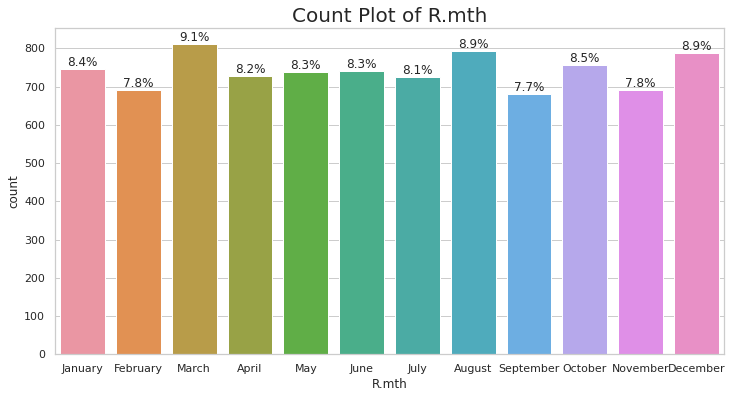

In [21]:
#Visualization

sns.set(style="whitegrid")
plt.figure(figsize = (12,6))
total = float(len(data))
ax = sns.countplot(x = 'R.mth',data=data)
plt.title('Count Plot of R.mth', fontsize=20)
plt.xlabel('R.mth')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [22]:
#More travellers in the month of March followed by August and December

In [23]:
#intv_nam
data['intv_nam'].value_counts()

Philip Chew            1856
Bay Poh Choo           1709
Cindy Liu              1267
Simon                   763
Anderson Yu Tor Kim     562
Sarah                   464
Teck Ghee               337
S1                      261
Sharon Hsu              238
PC                      208
Shariffah               186
And                     183
Patrick lim             169
Noraini                 154
Felicia                 138
Patrick Lim              98
Adwen                    66
Jay                      48
Cl                       46
BAY POH CHOO             30
CI                       29
Cindy Lim                23
Nizam                    12
Joeypoh                  10
Janelle                   6
Chris                     5
Anees                     4
Cindy liu                 4
Bhadrul                   2
Angeline Cheong           2
Shanon Lim                2
Meri                      2
Cindy Pang                2
Sharrifah                 1
Name: intv_nam, dtype: int64

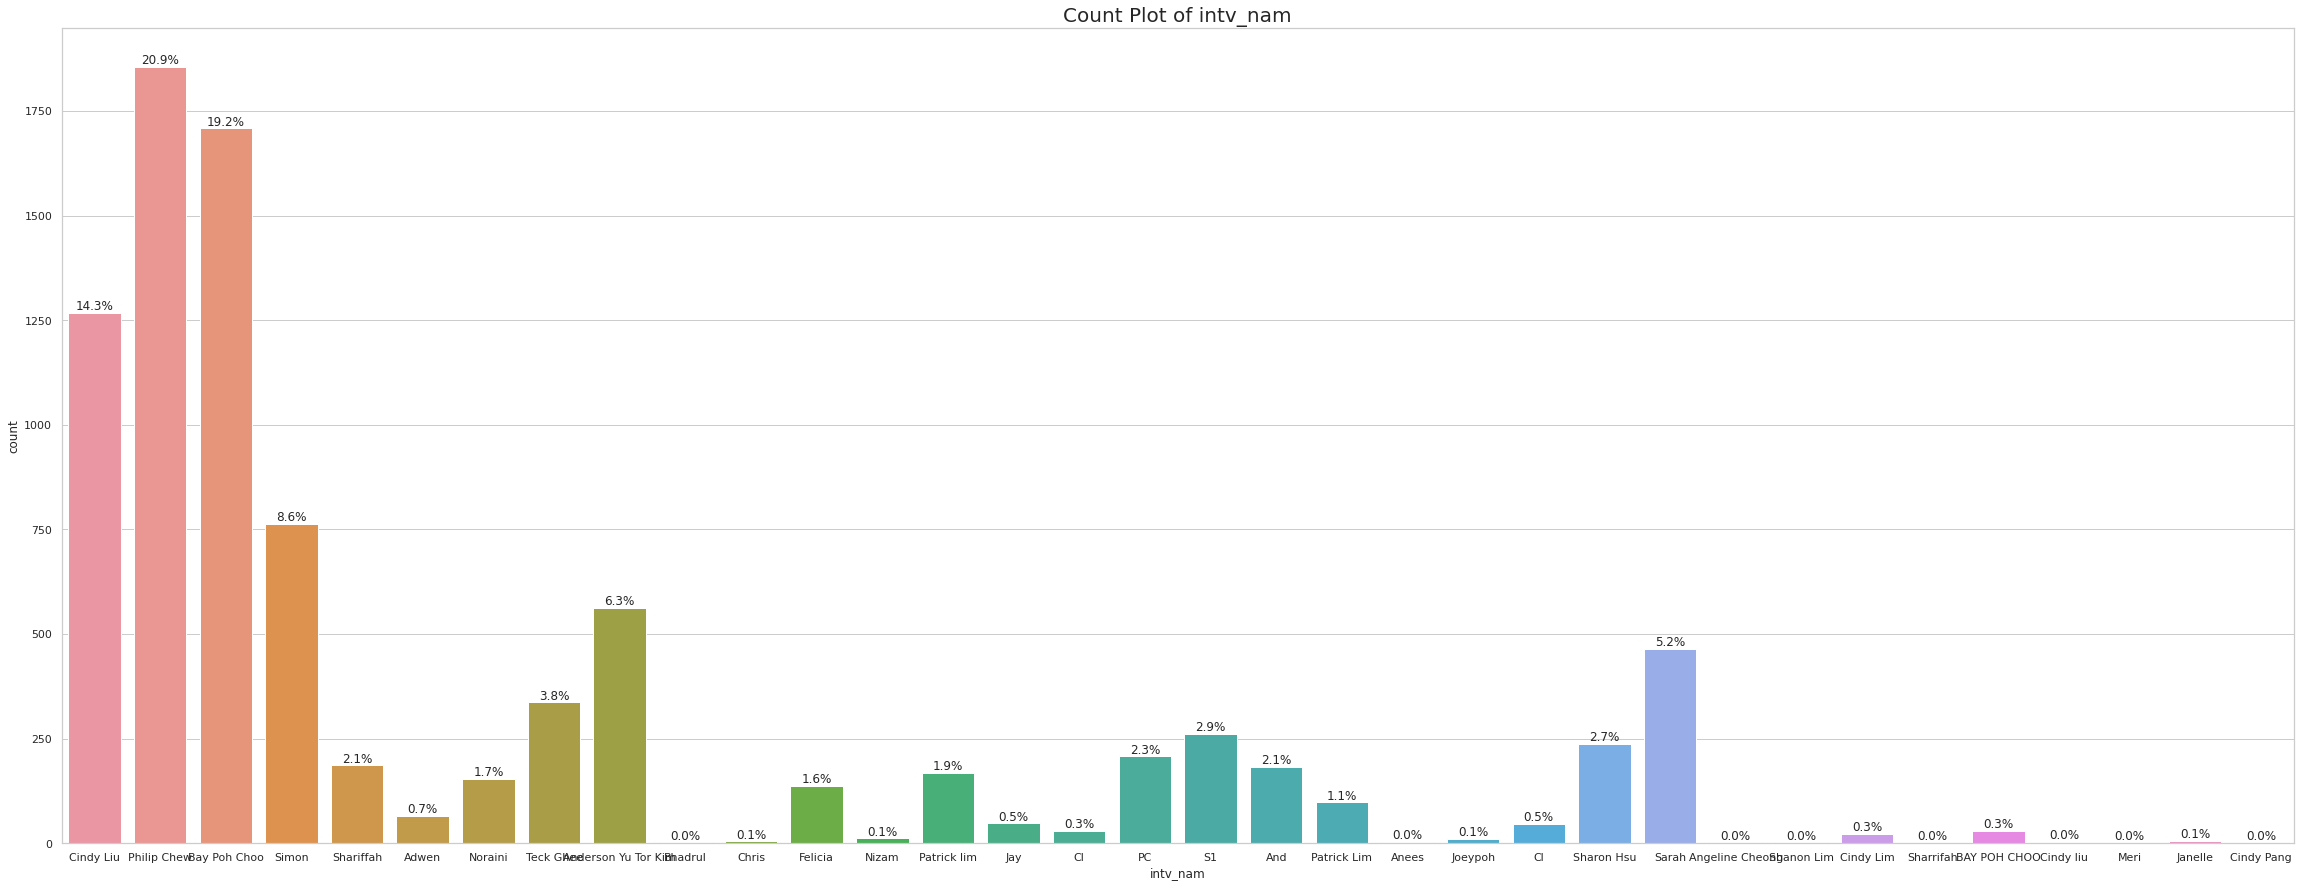

In [24]:
#intv_nam Visualization

sns.set(style="whitegrid")
plt.figure(figsize = (40,15))
total = float(len(data))
ax = sns.countplot(x = 'intv_nam',data=data,orient='v')
plt.title('Count Plot of intv_nam', fontsize=20)
plt.xlabel('intv_nam')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [25]:
#Mr.Philip Chew has travelled more and then Mr.Bay Poh Choo 
#Top 5 are: Philip Chew, Bay Poh Choo,Cindy Liu,Simon,Anderson Yu Tor Kim

In [26]:
#Country_residence
data['Country_residence'].value_counts()

Indonesia    8887
Name: Country_residence, dtype: int64

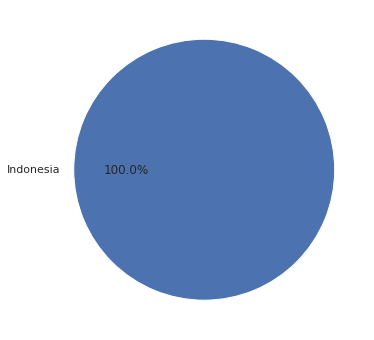

In [27]:
#Country_residence Visualization

plt.figure(figsize=(6,6))
data['Country_residence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [28]:
#This data contains only Indonesians

In [29]:
#City_residence
data['City_residence'].value_counts()

Jakarta                 3867
Batam                   1928
Surabaya                 746
Bandung                  563
Medan                    277
Yogyakarta               272
Tanjung Pinang           211
Bali                     189
Tanjung Balai            100
Semarang                  88
Palembang                 56
Solo                      55
Padang                    35
Kalimantan                34
Makassar                  34
Bintan                    32
Pekan Baru                30
Java                      28
Bogor                     27
Riau                      27
East Java                 21
Malang                    20
Jambi / Telanaipura       18
Sumatra                   18
Tangerang                 15
Lombok                    15
Pontianak                 14
Balikpapan                14
Indonesia                 14
Denpasar                  11
Lampung                   10
West Java                 10
Manado                    10
Aceh                       9
Banjarmasin   

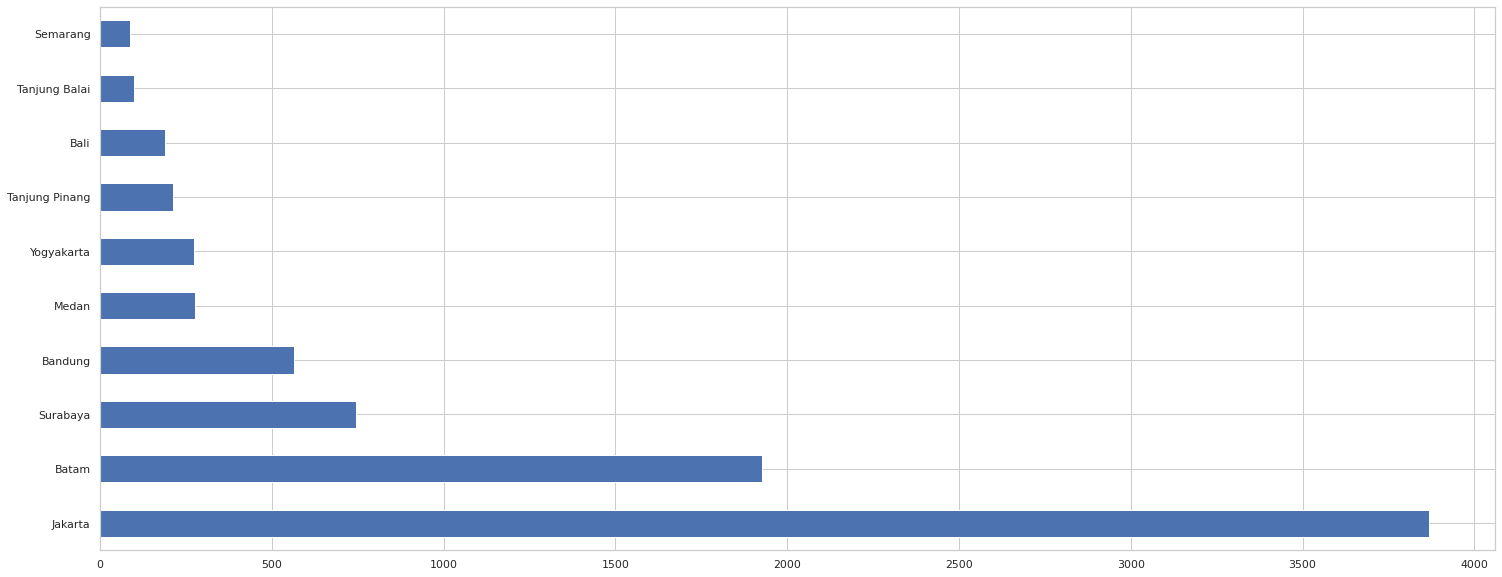

In [30]:
#City_residence (only top 10) Visualization

plt.figure(figsize=(25,10))
data['City_residence'].value_counts()[:10].plot.barh()
plt.ylabel('')
plt.show()

In [31]:
#Top 5 cities of Indonesia, from where more people have visited Singapore: Jakarta,Batam,Surabaya,Bandung,Medan

In [32]:
#Purpose_grp

data['Purpose_grp'].value_counts()

Leisure                        5655
Business+Accompanying Pax      1251
Healthcare+Accompanying Pax    1143
Others/ Refused                 650
Education+Accompanying Pax      188
Name: Purpose_grp, dtype: int64

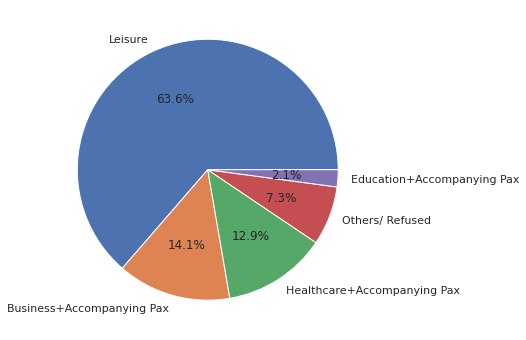

In [33]:
#Purpose_grp Visualization

plt.figure(figsize=(6,6))
data['Purpose_grp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [34]:
#Most of the visitors came for Leisure

In [35]:
#Purpose

data['Purpose'].value_counts()

Holiday/ Rest & Relax                                                          3244
Visiting friends/relatives                                                     1446
General business purpose                                                        772
Outpatient consultation/treatment                                               634
Others - Personal (e.g. weddings, funerals, etc)                                616
Accompanying a Healthcare/medical visitor for Outpatient consultation/treat     431
To shop/attend shopping events in Singapore                                     364
Corporate/business meetings                                                     358
Sightseeing/ Attractions                                                        177
Stopover                                                                        121
Visiting an international student studying in Singapore                          76
Skills development/skills training/vocational training                      

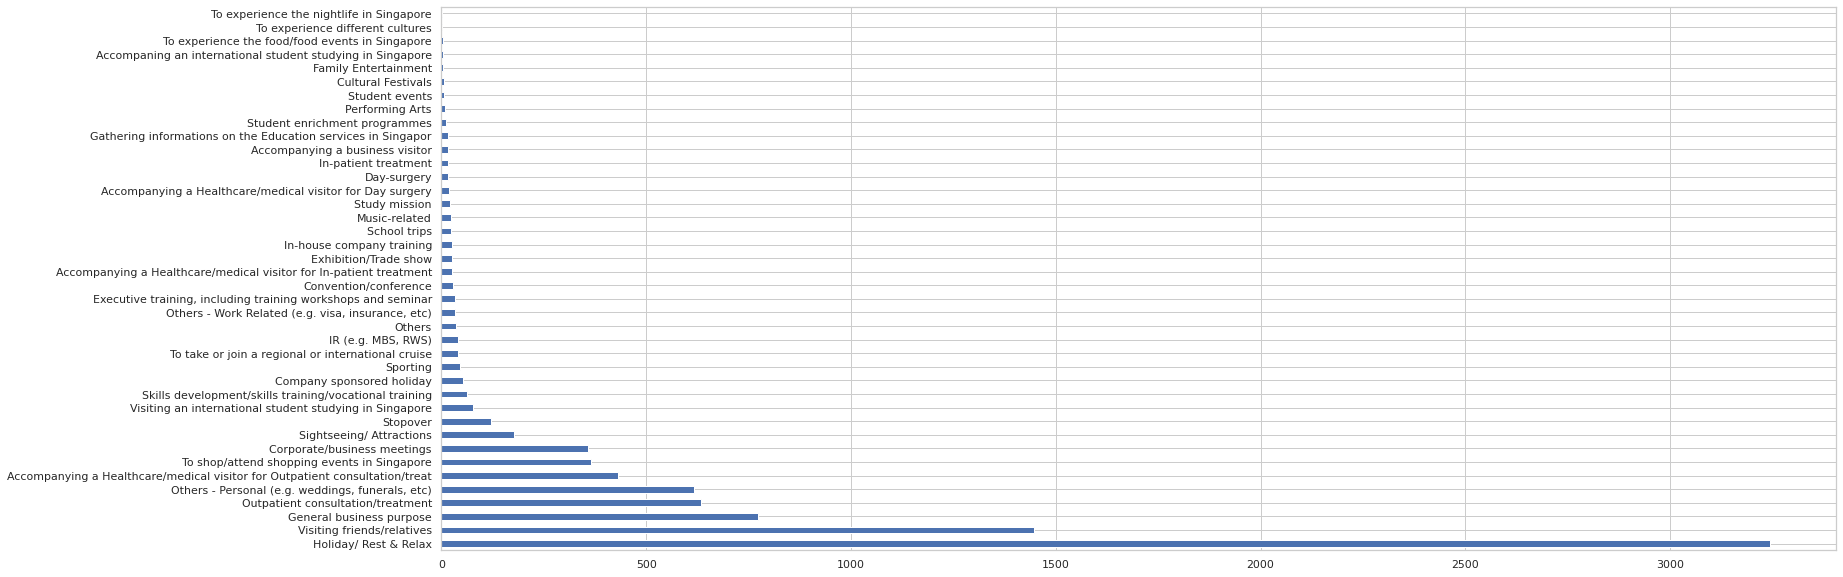

In [36]:
#Purpose visualization
plt.figure(figsize=(25,10))
data['Purpose'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

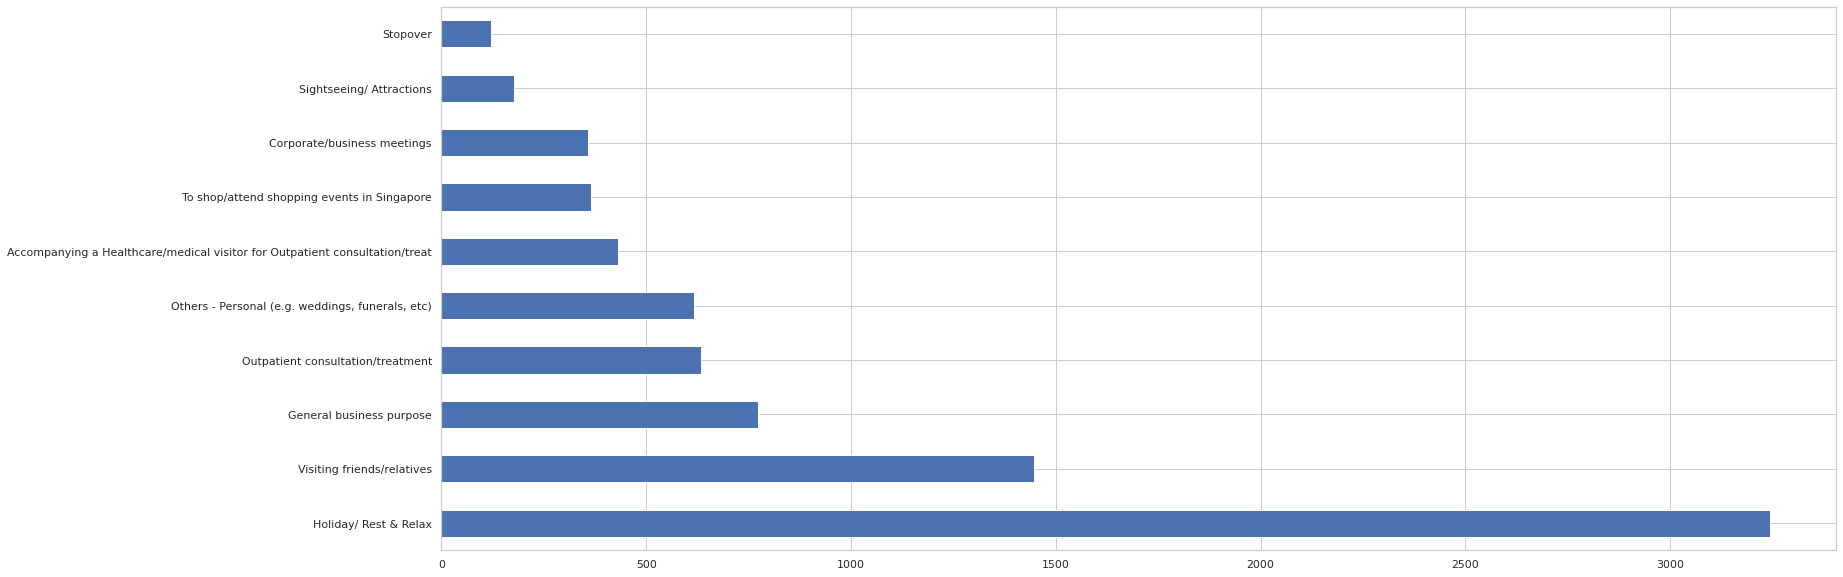

In [37]:
#Purpose  (top 10)

plt.figure(figsize=(25,10))
data['Purpose'].value_counts()[:10].plot.barh()
plt.ylabel('')
plt.show()

In [38]:
#Most of the people came for Holidays/Rest & relax

In [39]:
#Part of feature Engineering
#There are many missing values in the columns terminal 1, terminal2 and terminal 3 becuase people who chose one means of travel wont have any values for other two columns.
#Hence we are combining three of these terminal columns into a single column named Travel Path


#'Air_Terminal',
# 'Sea_Terminal',
# 'Land_Terminal'

#combining all unique values in each travel modes to one

def categorise(row):
    if row['Air_Terminal']=='Terminal 1' or row['Air_Terminal']=='Terminal 2' or row['Air_Terminal']=='Terminal 3':
        return 'Air'
    elif row['Sea_Terminal']=='RFT' or row['Sea_Terminal']=='TMFT' or row['Sea_Terminal']=='HCC' or row['Sea_Terminal']=='MBCCS':
        return 'Sea'
    elif row['Land_Terminal']=='Tuas' or row['Land_Terminal']=='Woodlands':
        return 'Land'
    return 'Not Specified'

In [40]:
#created a new column for travel path
data['Travel Path']=data.apply(lambda row: categorise(row),axis=1)

In [41]:
data['Travel Path']

0       Air
1       Sea
2       Sea
3       Sea
4       Sea
       ... 
8882    Sea
8883    Sea
8884    Sea
8885    Sea
8886    Sea
Name: Travel Path, Length: 8887, dtype: object

In [42]:
#new column added to our dataset
data.head(2)

case  Year    R.mth       date     intv_nam Country_residence  \
0    18  2015  January 2015-01-01    Cindy Liu         Indonesia   
1    41  2015  January 2015-01-01  Philip Chew         Indonesia   

  City_residence Purpose_grp                Purpose  Weights_QTR  ...  \
0     Yogyakarta     Leisure  Holiday/ Rest & Relax   632.145161  ...   
1          Batam     Leisure  Holiday/ Rest & Relax   341.937500  ...   

  totshopping_$     totexp_$ MainAccomm         MainHotel travel_companion.1  \
0    854.853136  1096.186995      Hotel  V Hotel Lavender             Spouse   
1    171.519802   379.309926      Hotel      Madras Hotel             Spouse   

       travel_companion.2 travel_companion.3 travel_companion.4  \
0  Children aged 8-12 yrs                NaN                NaN   
1   Children aged 0-7 yrs            Friends                NaN   

  travel_companion.5 Travel Path  
0                NaN         Air  
1                NaN         Sea  

[2 rows x 49 columns]

In [43]:
#Travel Path
data['Travel Path'].value_counts()

Air              5697
Sea              2828
Land              355
Not Specified       7
Name: Travel Path, dtype: int64

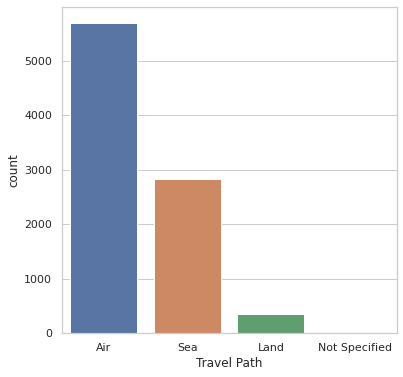

In [44]:
#Travel path visualization
plt.figure(figsize=(6,6))
sns.countplot(data["Travel Path"])

In [45]:
#Most of the travellers used airways 

In [46]:
#Langint

data['langint'].value_counts()

English              7235
Chinese               846
Malay                 378
Hybrid Indonesian     323
Hybrid Chinese         86
Indonesian             16
Japanese                2
Hybrid French           1
Name: langint, dtype: int64

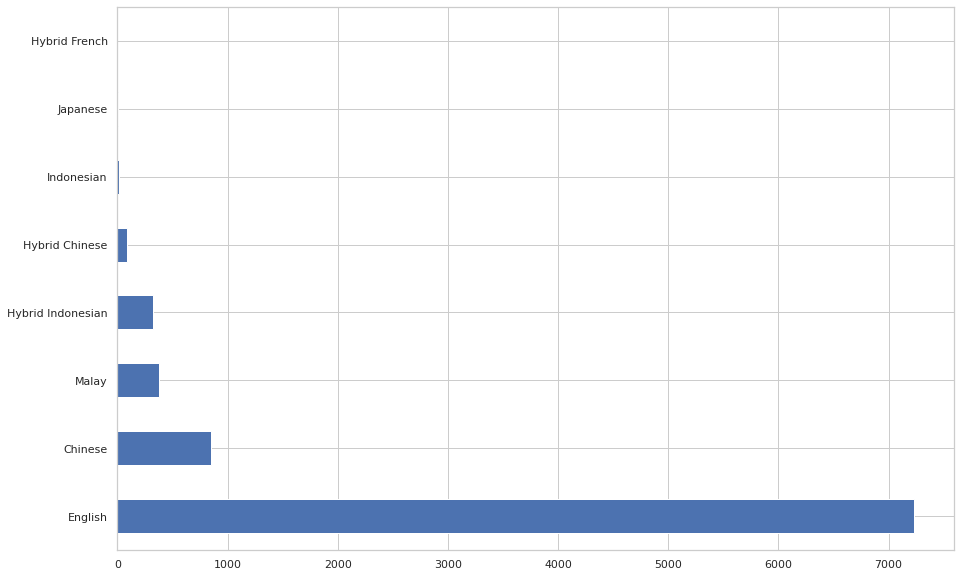

In [47]:
#langint Visualization

plt.figure(figsize=(15,10))
data['langint'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

In [48]:
#Majority were English speakers 

In [49]:
#1st_visit

data['1st_visit'].value_counts()

No     7593
Yes    1294
Name: 1st_visit, dtype: int64

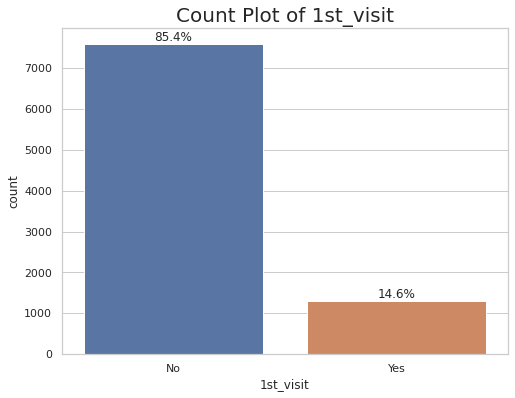

In [50]:
#1st_visit visualization

sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
total = float(len(data))
ax = sns.countplot(x = '1st_visit',data=data)
plt.title('Count Plot of 1st_visit', fontsize=20)
plt.xlabel('1st_visit')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [51]:
#85.4 % are not first time visitors in Singapore 

In [52]:
#length_stay

data['length_stay'].value_counts()

2 days            2159
Under 1 day       1827
1 day             1639
3 days            1460
4 days             699
5 days             335
6 days             199
15-29 days         174
8-10 days          156
7 days             134
11-14 days          75
30-59 days          29
60 days & over       1
Name: length_stay, dtype: int64

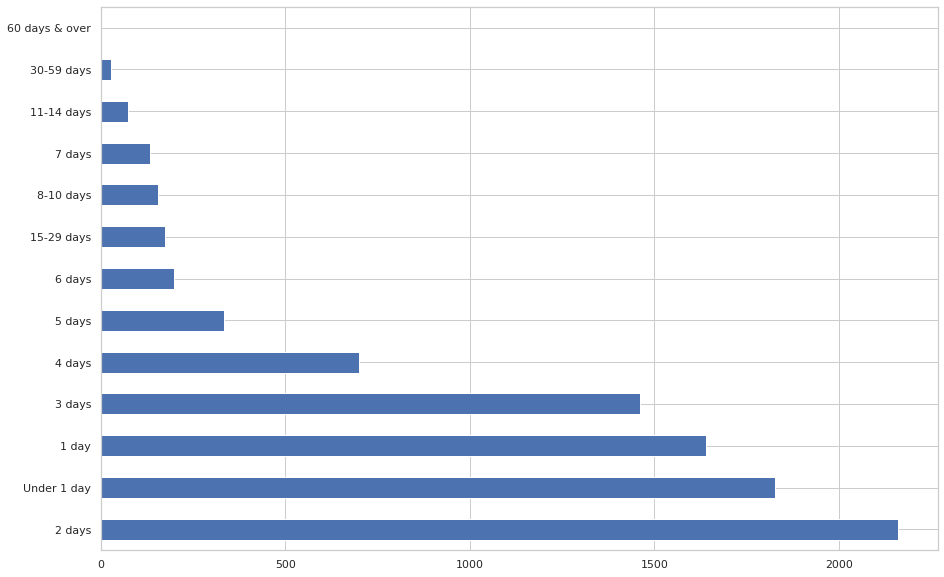

In [53]:
#length_stay visualization

plt.figure(figsize=(15,10))
data['length_stay'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

In [54]:
##Most of the ppl stayed for 2 days

In [55]:
#travel_type

data['travel_type'].value_counts()

Non-Packaged               7032
Business (Non-Packaged)    1235
Packaged                    620
Name: travel_type, dtype: int64

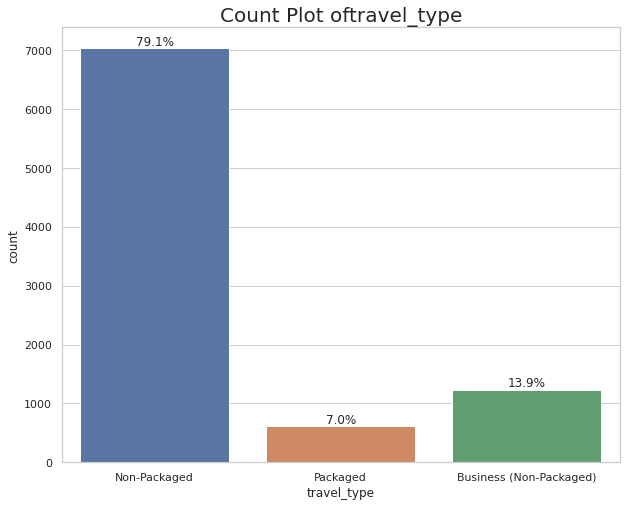

In [56]:
#travel_type visualization

sns.set(style="whitegrid")
plt.figure(figsize = (10,8))
total = float(len(data))
ax = sns.countplot(x = 'travel_type',data=data)
plt.title('Count Plot oftravel_type', fontsize=20)
plt.xlabel('travel_type')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [57]:
#Most of the visitors where non-packaged travellers
#then followed by business related travellers
#Packaged tourists were very less
#We already saw that majority of people were not first timers in Singapore so may be that is why more Non-Packaged compared to Packaged travel types

Male      4767
Female    4120
Name: f1_gender, dtype: int64


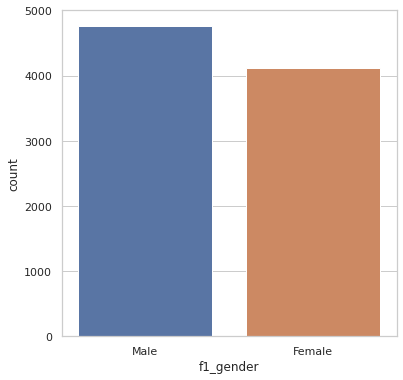

In [58]:
#f1_gender

plt.figure(figsize=(6,6))
sns.countplot(data["f1_gender"])
print(data.f1_gender.value_counts())

In [59]:
#Male travellers were more 
#the count difference is not so huge

In [60]:
#f3_occupation

data['f3_occupation'].value_counts()

Homemaker (Full time)                                                        1262
Professiols (doctor, lawyer, lecturer, etc)                                  1208
Businessman (small company, <50 people)                                      1178
Mager (CEO, company director, senior mager)                                  1090
Student                                                                      1012
Executive (sales, administration)                                             773
Other White collar (Teacher, Nurse, secretary, receptionist, cashier etc)     766
Others (specify)                                                              548
Retired                                                                       347
Blue collar (technician, hairdresser, hawker, taxi drivers etc)               332
Businessman (medium size company, 50 -250 people)                             183
Unemployed                                                                    142
Businessman (lar

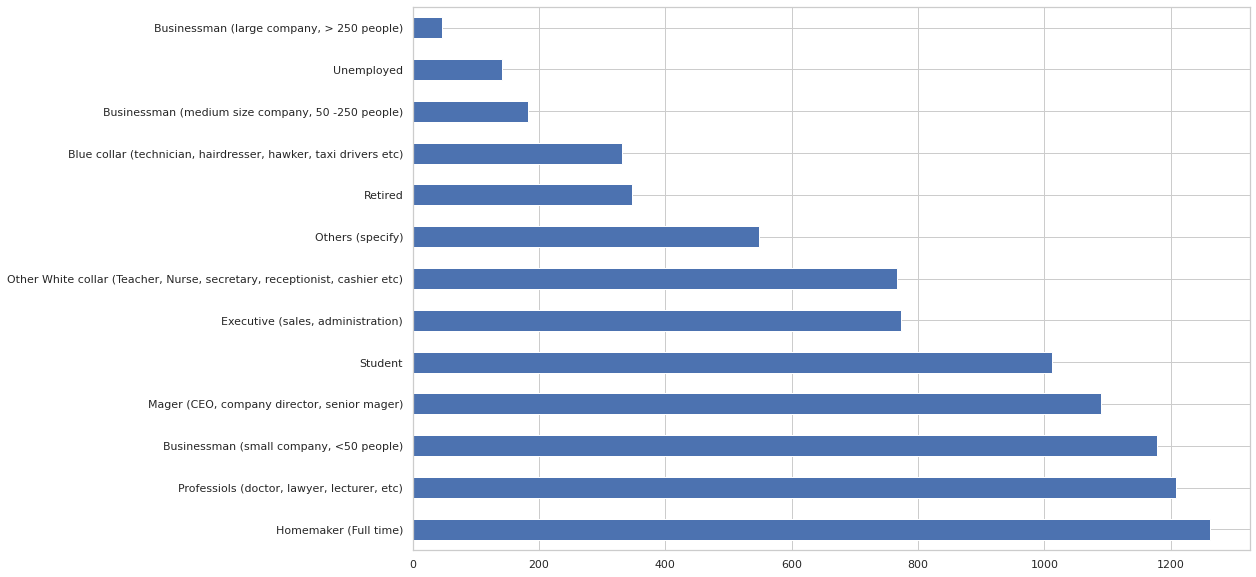

In [61]:
#f3_occupation visualization

plt.figure(figsize=(15,10))
data['f3_occupation'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

In [62]:
##Majority were homemakers
#Top 3 Occupations: Homemaker,Professionals,Businessman

In [63]:
#f4_industry

data['f4_industry'].value_counts()

Others (specify)                                                                        1694
Wholesale and Retail Trade                                                               608
Fincial and Insurance Activities                                                         432
Manufacturing and Chemicals                                                              398
Environment and Energy                                                                   282
Education                                                                                256
Healthcare and Biomedical Sciences                                                       246
Construction                                                                             241
Accommodation and Food & Beverage-related activities                                     233
Hospitality, Travel & Tourism                                                            232
Transportation and Logistics                                          

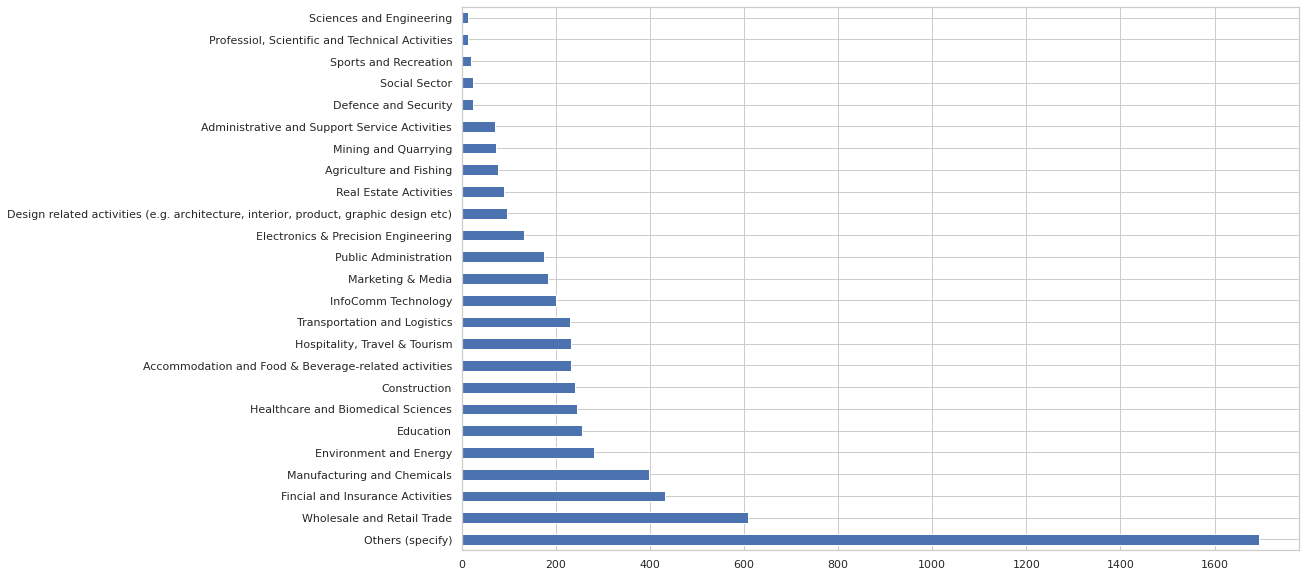

In [64]:
#f4_industry visualization

plt.figure(figsize=(15,10))
data['f4_industry'].value_counts().plot.barh()
plt.ylabel('')
plt.show()


In [65]:
#Majority have not specified their industry
#then comes Wholesale and Retail Traders
#Top 5 are: Others,Wholesale and Retail Trade,Financial and Insurance Activities,Manfacturing and Chemicals,Environment and Energy

In [66]:
#f5_designation

data['f5_designation'].value_counts()

Others (specify)                      3263
Mager/ Assistant Mager                 847
Director                               397
Senior Executive                       367
Junior Executive                       339
Clerk/ Secretary/ Persol Assistant     270
General Mager                          132
CEO/ Assistant CEO                      63
Chairman                                38
Deputy/ Assistant Director              36
President/ Vice-President               21
Board of Directors                      18
Name: f5_designation, dtype: int64

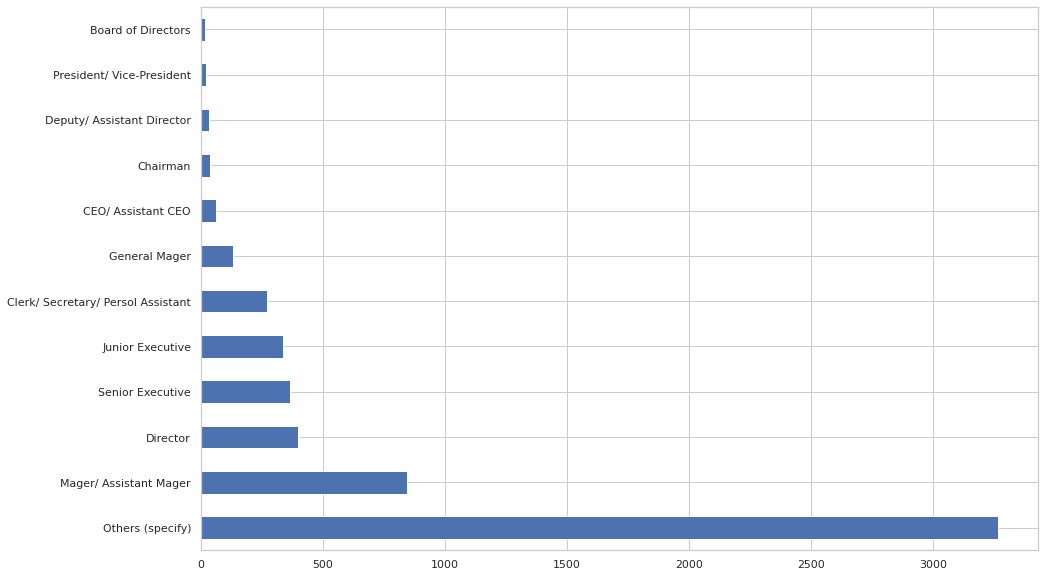

In [67]:
#f5_designation visualization

plt.figure(figsize=(15,10))
data['f5_designation'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

In [68]:
#Top designation is not specified

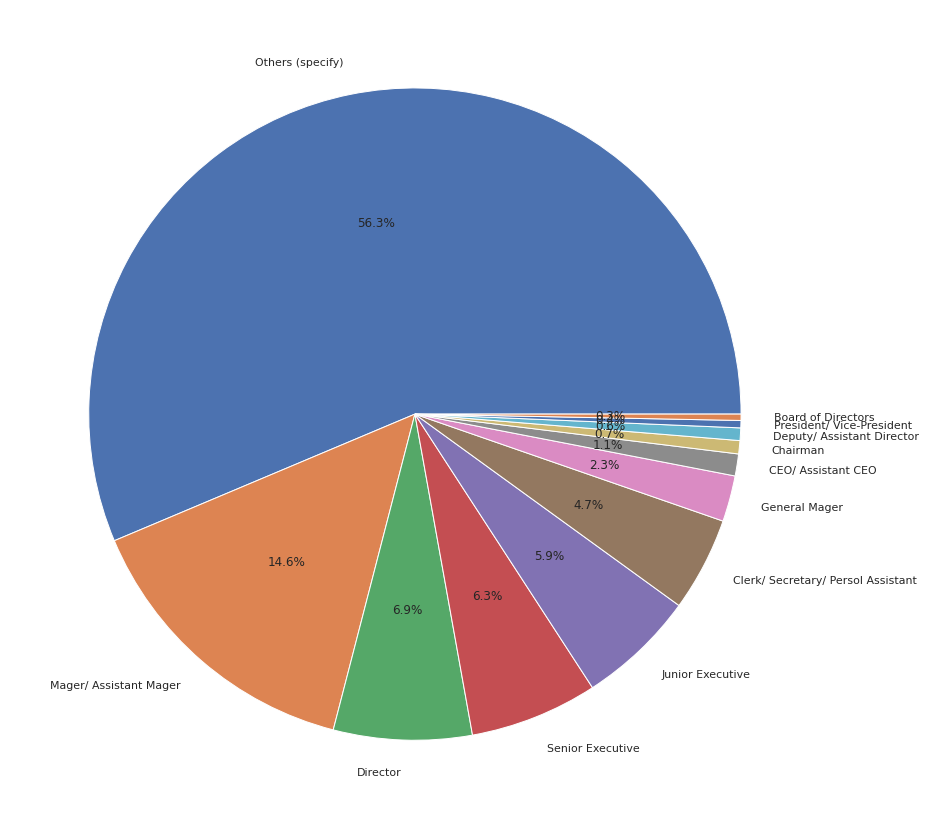

In [69]:
#f5_designation

plt.figure(figsize=(30,15))
data['f5_designation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [70]:
#f5_designation.oth

data['f5_designation.oth'].value_counts()

                         3659
Owner                     414
Engineer                  322
Teacher                   106
Doctor                     89
                         ... 
Bank Teller                 1
Pharmist                    1
Quality Control             1
Production Supervisor       1
Psychologist                1
Name: f5_designation.oth, Length: 421, dtype: int64

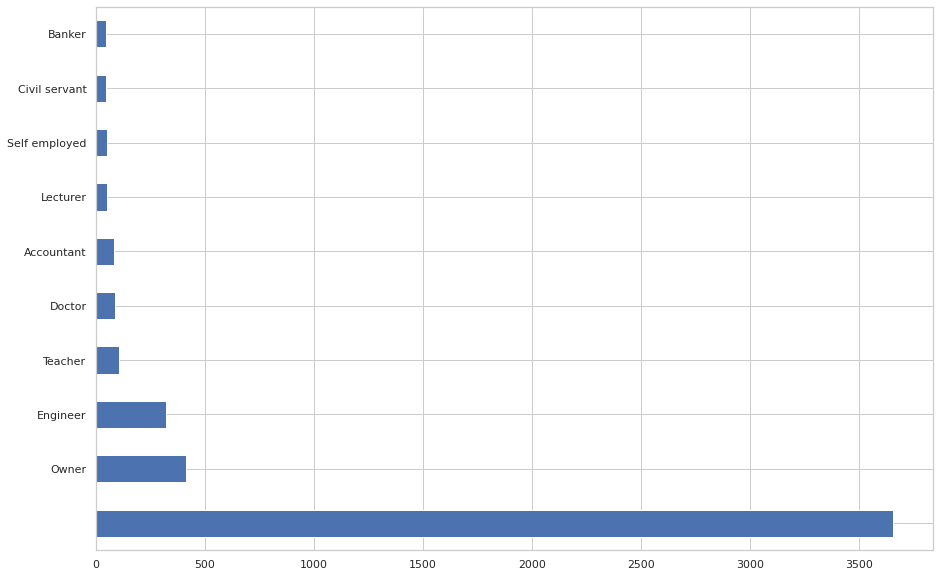

In [71]:
#f5_designation.oth visualization
plt.figure(figsize=(15,10))
data['f5_designation.oth'].value_counts()[:10].plot.barh()
plt.ylabel('')
plt.show()

In [72]:
#Top designation in Other category is also not specified
#Majority have not specified their designation

In [73]:
#MainAccomm
data['MainAccomm'].value_counts()

Hotel                                                          4296
Stayed with relatives/ friends                                 1811
Accommodation not required - Day Tripper                       1746
Hostel (Rental by bed)                                          459
Service Apartment                                               248
Own Residence                                                    89
Accommodation not required - On-board Cruise                     57
Homestay                                                         50
Other paid accommodations (e.g.chalets, country clubs, etc)      37
Accommodation not required - Others                              28
Other non-paid accommodations (e.g. religious places, camp,      23
Student Hostel                                                    6
Hospital                                                          4
Name: MainAccomm, dtype: int64

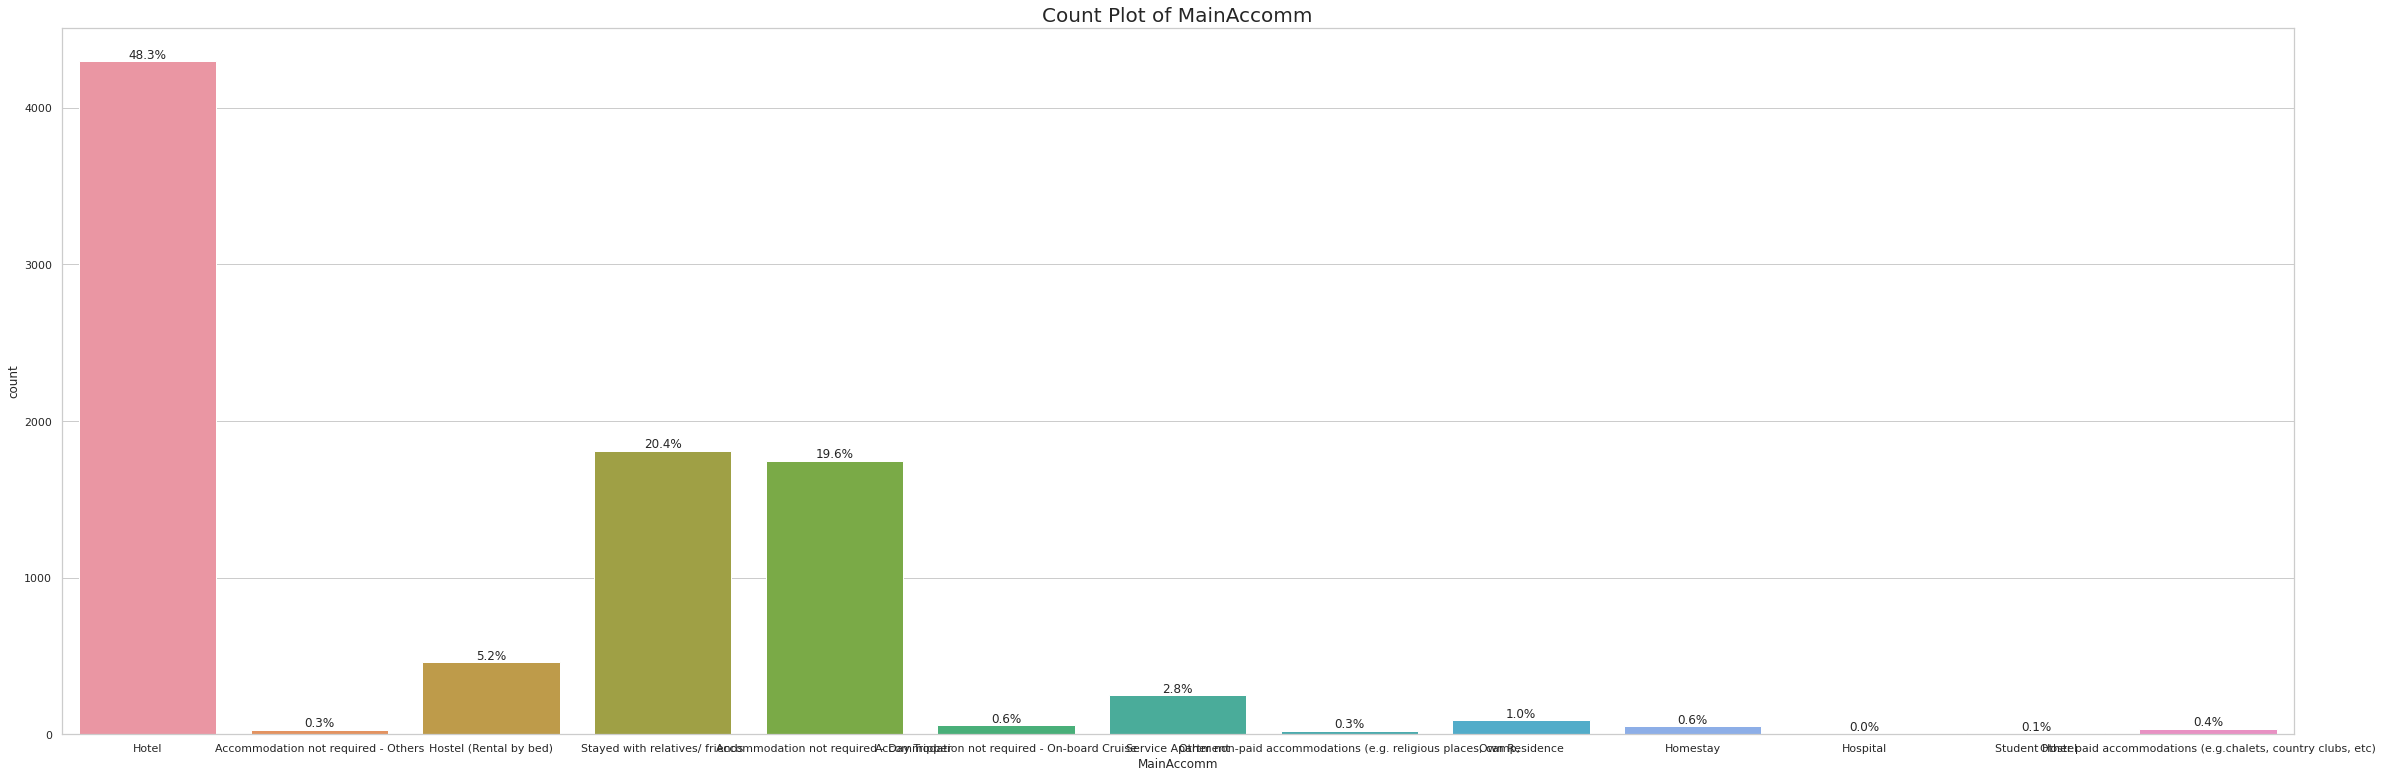

In [74]:
#MainAccomm

sns.set(style="whitegrid")
plt.figure(figsize = (40,13))
total = float(len(data))
ax = sns.countplot(x = 'MainAccomm',data=data,orient='v')
plt.title('Count Plot of MainAccomm', fontsize=20)
plt.xlabel('MainAccomm')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [75]:
#Most of them preferred Hotel accomodation
#Followed by those who preferred staying with relatives/friends
#Then those who do not require accomodation 

In [76]:
#MainHotel

data['MainHotel'].value_counts()

Mandarin Orchard Singapore       358
V Hotel Lavender                 200
York Hotel                       175
Ibis Singapore on Bencoolen      166
Marina Bay Sands Singapore       146
                                ... 
Village Hotel (Not Specified)      1
Klapsons The Boutique Hotel        1
Hotel 81 - Violet                  1
Oxley Hotel 88                     1
Kerbau Hotel                       1
Name: MainHotel, Length: 290, dtype: int64

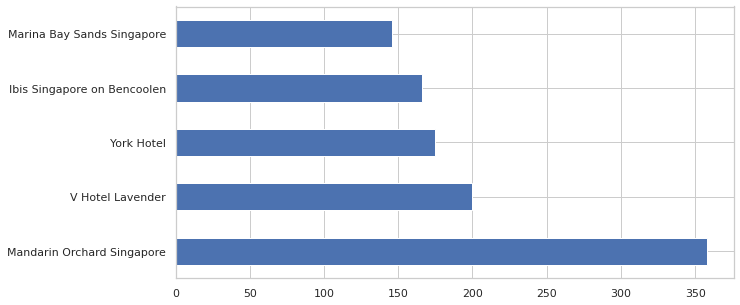

In [77]:
#MainHotel visualization
plt.figure(figsize=(10,5))
data['MainHotel'].value_counts()[:5].plot.barh()
plt.ylabel('')
plt.show()


In [78]:
#Most of the travellers who stayed in Hotel chose Mandarin Orchard Singapore
#Top 5 Hotels are:Mandarin Orchard Singapore,V Hotel Lavender,York Hotel,Ibis Singapore on Bencoolen,Marina Bay Sands Singapore

In [79]:
#travel_companion.1

data['travel_companion.1'].value_counts()

Alone                                2883
Spouse                               2358
Parents/ Parents-in-law              1006
Friends                               995
Business associates/ Colleagues       473
Siblings                              311
Other relatives                       188
Others                                184
Partner/ Boyfriend/ Girlfriend        157
Children aged 0-7 yrs                  90
Children aged 20-39 yrs                84
Children aged 13-19 yrs                78
Children aged 8-12 yrs                 43
Grandparents/ Grandparents-in-law      20
Children aged 40 yrs and above         17
Name: travel_companion.1, dtype: int64

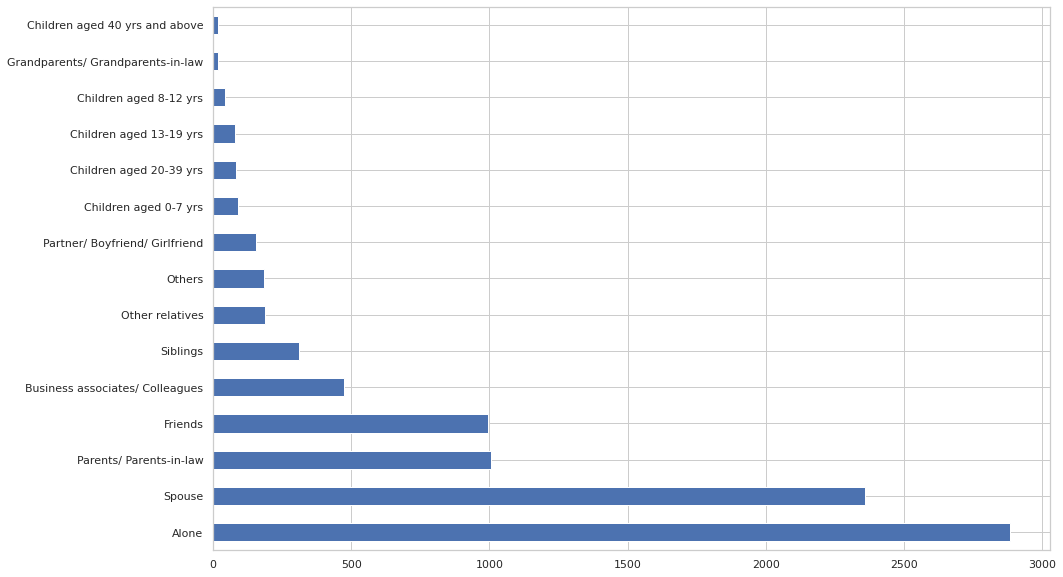

In [80]:
#travel_companion.1 visualization


plt.figure(figsize=(15,10))
data['travel_companion.1'].value_counts().plot.barh()
plt.ylabel('')
plt.show()

In [81]:
#Most of the travellers visited singapore alone
#Followed by those travelled with Spouse

In [82]:
#travel_companion.2

data['travel_companion.2'].value_counts()

Siblings                             467
Children aged 0-7 yrs                413
Children aged 8-12 yrs               203
Other relatives                      132
Parents/ Parents-in-law              103
Children aged 13-19 yrs               97
Friends                               67
Children aged 20-39 yrs               62
Others                                32
Grandparents/ Grandparents-in-law     28
Spouse                                13
Children aged 40 yrs and above         7
Business associates/ Colleagues        5
Partner/ Boyfriend/ Girlfriend         3
Name: travel_companion.2, dtype: int64

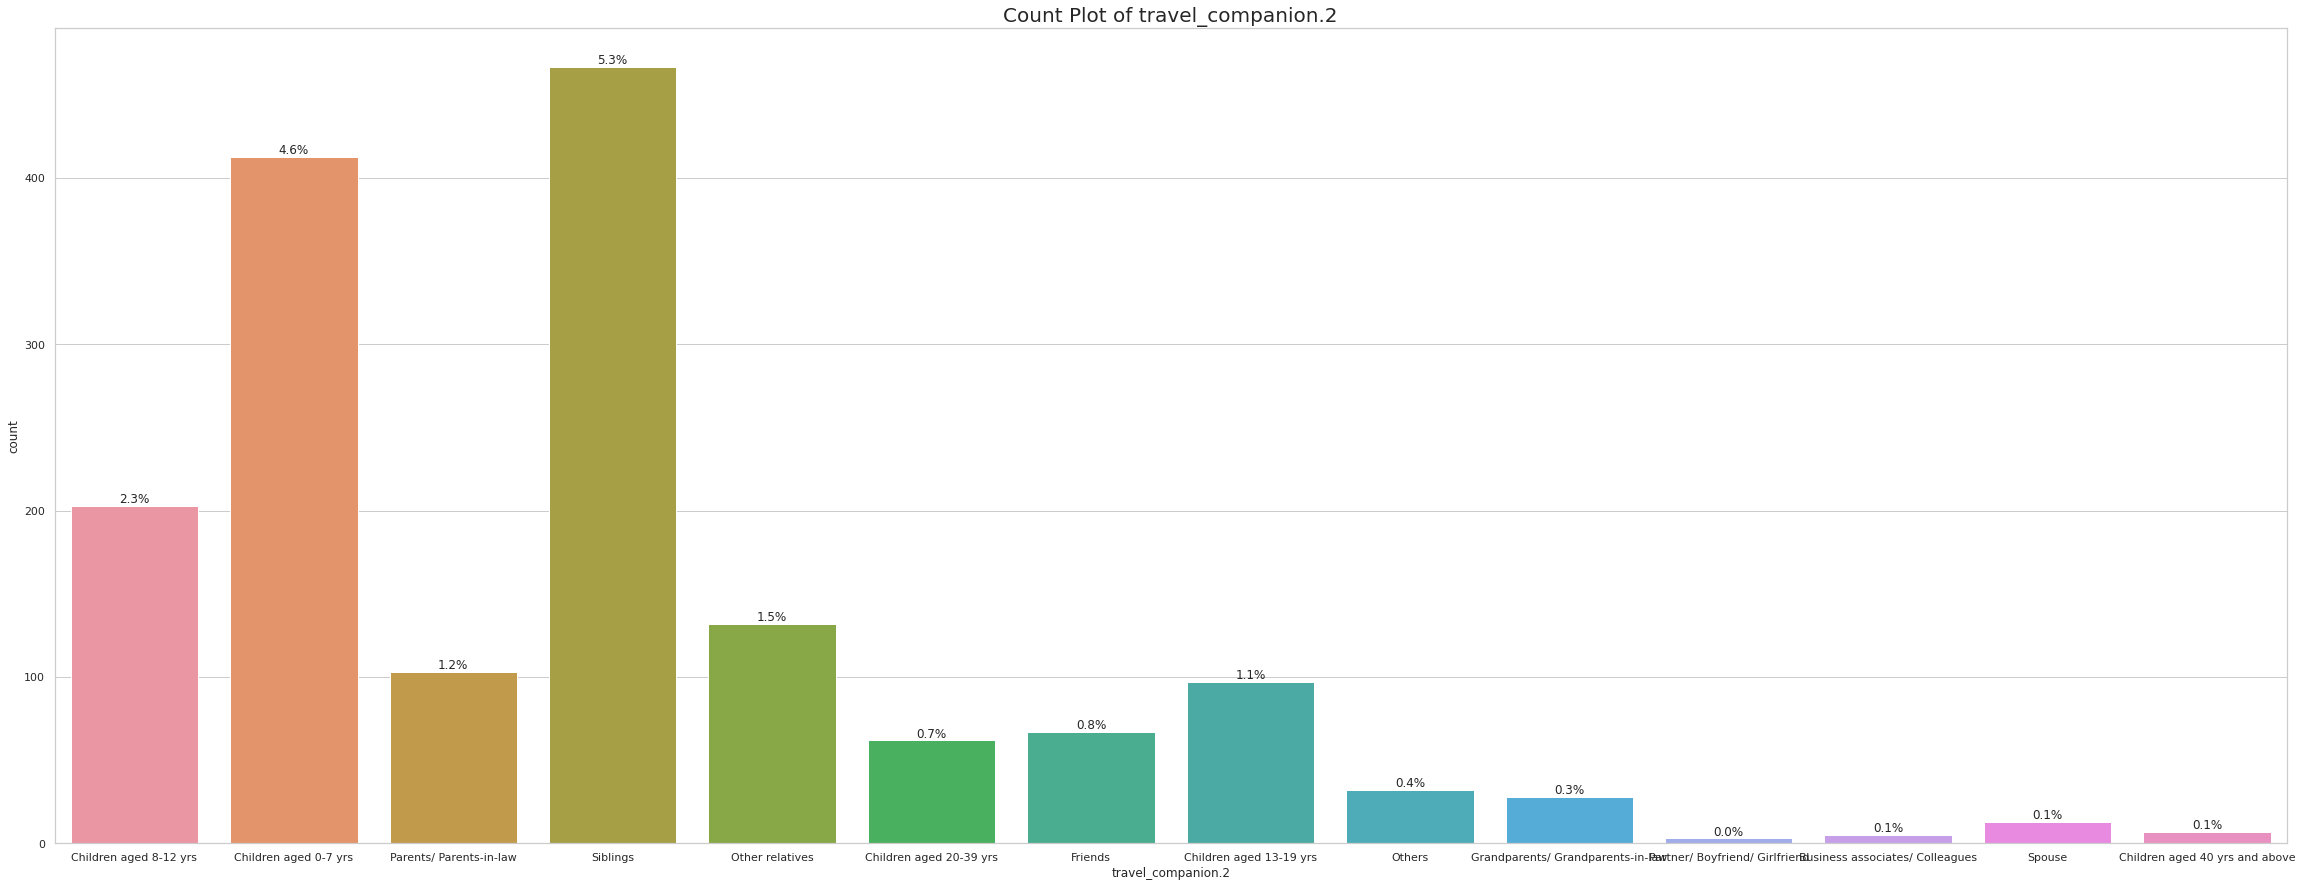

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize = (40,15))
total = float(len(data))
ax = sns.countplot(x = 'travel_companion.2',data=data,orient='v')
plt.title('Count Plot of travel_companion.2', fontsize=20)
plt.xlabel('travel_companion.2')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [84]:
#majority travelled with siblings

In [85]:
#travel_companion.3

data['travel_companion.3'].value_counts()

Children aged 8-12 yrs               101
Other relatives                       88
Children aged 13-19 yrs               85
Parents/ Parents-in-law               72
Siblings                              55
Friends                               22
Children aged 0-7 yrs                 19
Grandparents/ Grandparents-in-law     15
Others                                13
Children aged 20-39 yrs               11
Spouse                                 6
Business associates/ Colleagues        2
Children aged 40 yrs and above         1
Name: travel_companion.3, dtype: int64

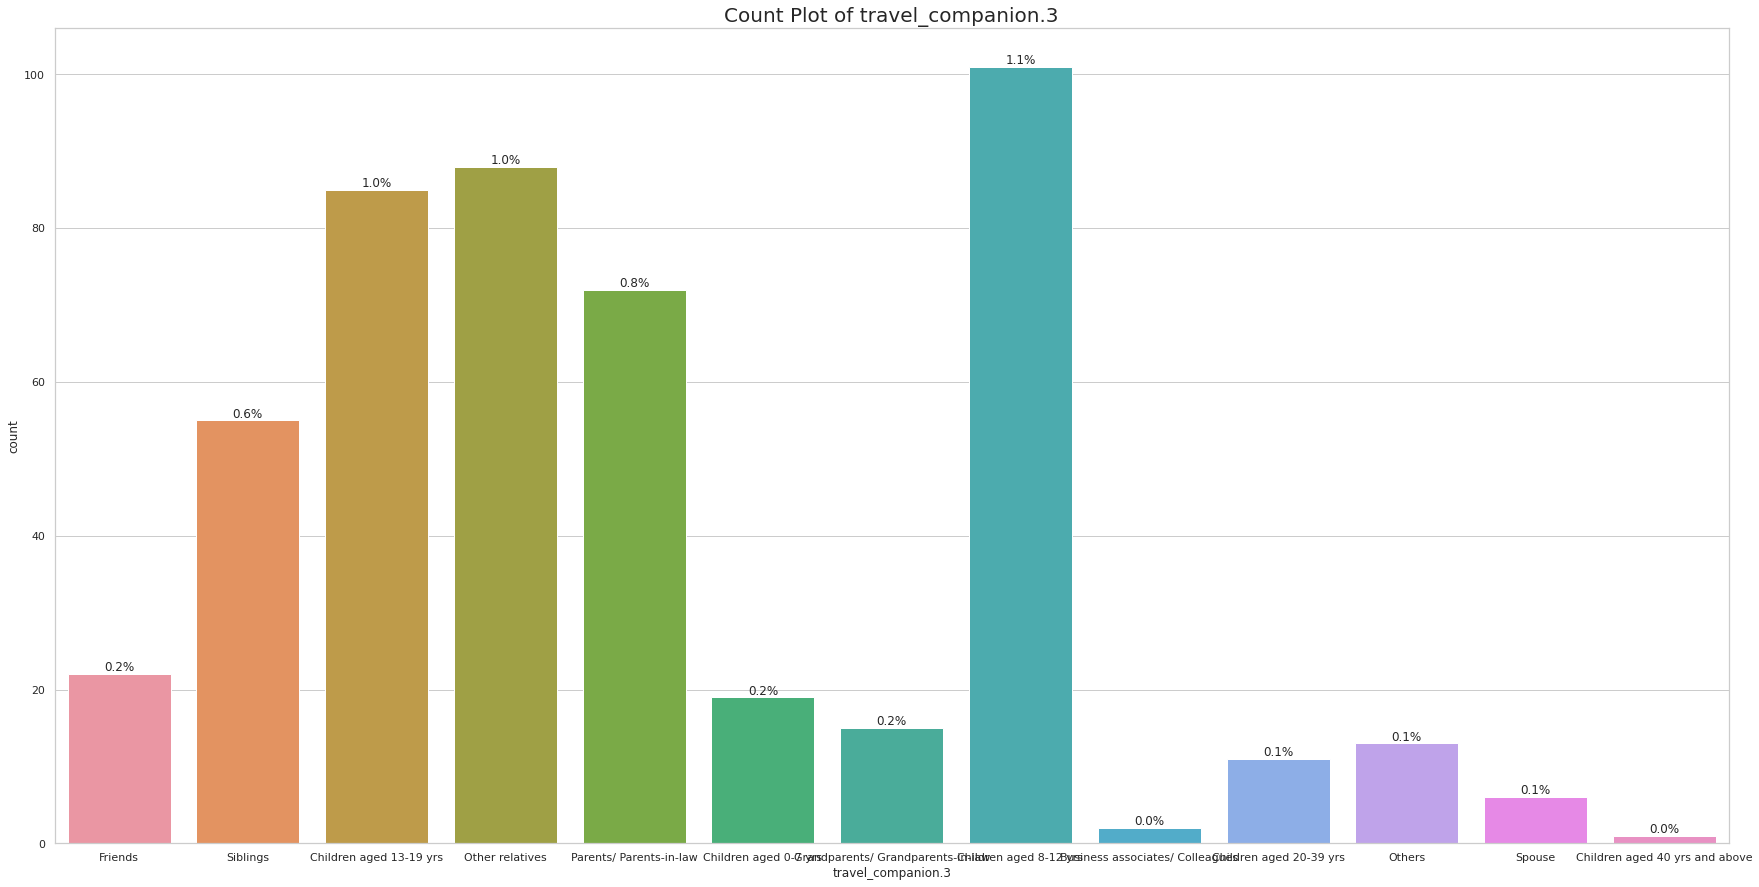

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize = (30,15))
total = float(len(data))
ax = sns.countplot(x = 'travel_companion.3',data=data,orient='v')
plt.title('Count Plot of travel_companion.3', fontsize=20)
plt.xlabel('travel_companion.3')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [87]:
#travel_companion.4


data['travel_companion.4'].value_counts()

Siblings                             24
Children aged 8-12 yrs               20
Other relatives                      17
Children aged 13-19 yrs               9
Children aged 20-39 yrs               8
Parents/ Parents-in-law               8
Others                                5
Grandparents/ Grandparents-in-law     3
Name: travel_companion.4, dtype: int64

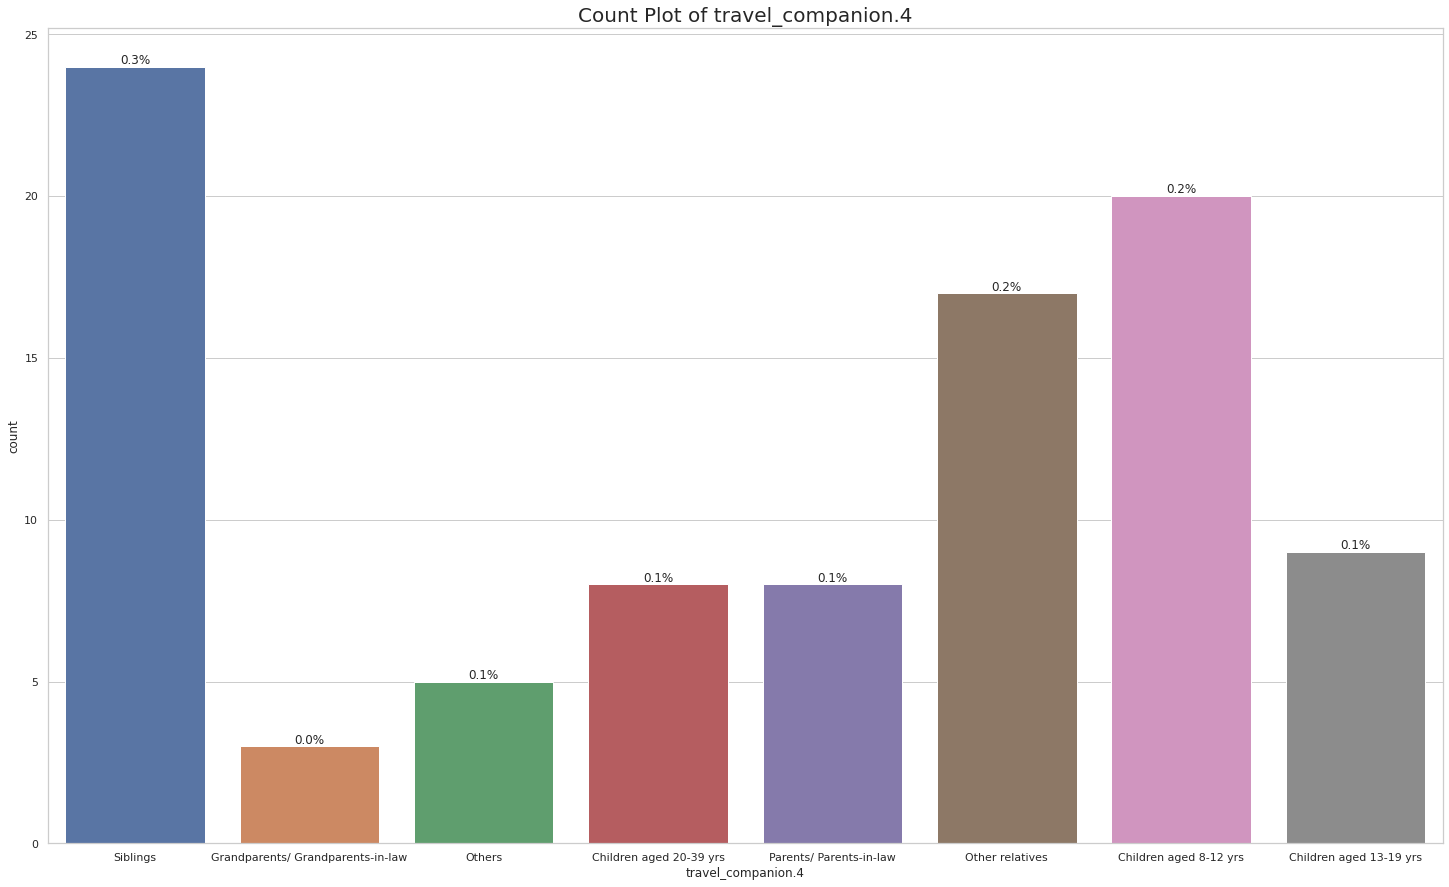

In [88]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,15))
total = float(len(data))
ax = sns.countplot(x = 'travel_companion.4',data=data,orient='v')
plt.title('Count Plot of travel_companion.4', fontsize=20)
plt.xlabel('travel_companion.4')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [89]:
#travel_companion.5


data['travel_companion.5'].value_counts()

Other relatives            8
Parents/ Parents-in-law    5
Siblings                   1
Children aged 8-12 yrs     1
Children aged 20-39 yrs    1
Others                     1
Name: travel_companion.5, dtype: int64

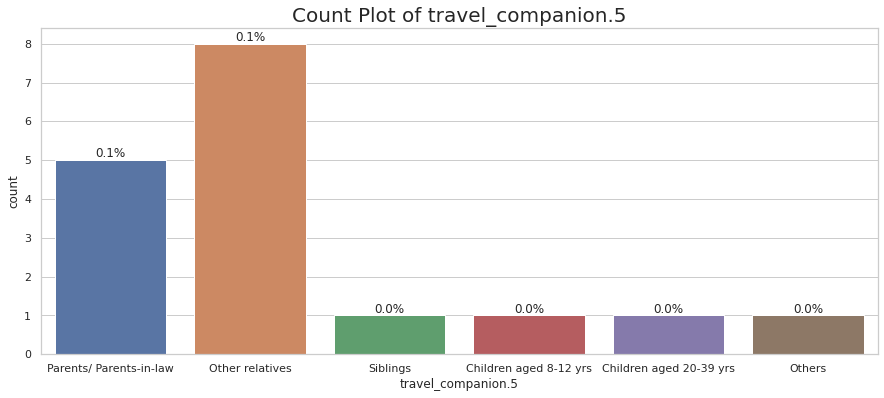

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,6))
total = float(len(data))
ax = sns.countplot(x = 'travel_companion.5',data=data,orient='v')
plt.title('Count Plot of travel_companion.5', fontsize=20)
plt.xlabel('travel_companion.5')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [91]:
#Travel companion has 5 columns with mostly null values. Hence combining all these five columns and counting the number of companions to make a single column named companion_number

In [92]:
#This is a part of feature engineering
#Combining all companion columns together 

#take unique values of companion columns to a new variable
comp_values = ['Spouse', 'Partner/ Boyfriend/ Girlfriend',
       'Parents/ Parents-in-law', 'Friends', 'Siblings',
       'Others', 'Children aged 8-12 yrs', 'Children aged 20-39 yrs',
       'Business associates/ Colleagues', 'Children aged 13-19 yrs',
       'Other relatives', 'Children aged 0-7 yrs',
       'Grandparents/ Grandparents-in-law',
       'Children aged 40 yrs and above']

In [93]:
def comp(row):
    count = 0
    if (row['travel_companion.1'] in comp_values):
        count= count+1       
    if (row['travel_companion.2'] in comp_values):
        count= count+1
    if (row['travel_companion.3'] in comp_values):
        count= count+1
    if (row['travel_companion.4'] in comp_values):
        count= count+1
    if (row['travel_companion.5'] in comp_values):
        count= count+1    
    return count

In [94]:
data['companion_number'] = data.apply(lambda row: comp(row), axis=1)

In [95]:
data['companion_number']

0       2
1       3
2       2
3       3
4       2
       ..
8882    1
8883    2
8884    3
8885    1
8886    2
Name: companion_number, Length: 8887, dtype: int64

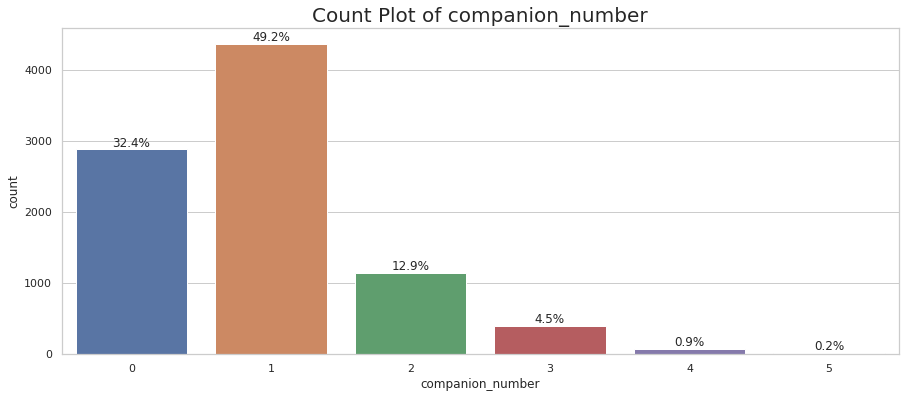

In [96]:
#Visulization of companion_number
sns.set(style="whitegrid")
plt.figure(figsize = (15,6))
total = float(len(data))
ax = sns.countplot(x = 'companion_number',data=data,orient='v')
plt.title('Count Plot of companion_number', fontsize=20)
plt.xlabel('companion_number')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [97]:
#Travellers hose who travelled with 1 companion is more .

In [98]:
#Numerical columns

numerical_columns

['case',
 'Year',
 'date',
 'Weights_QTR',
 'shop_$fash',
 'shop_$jew',
 'shop_$wat',
 'shop_$well',
 'shop_$food',
 'shop_$gift',
 'shop_$ctec',
 'shop_$anti',
 'shop_$oth',
 'shop_$any',
 'totacc_$',
 'totfnb_$',
 'tottran_$',
 'totbiz_$',
 'totedu_$',
 'totmedi_$',
 'tototh_$',
 'totshopping_$',
 'totexp_$']

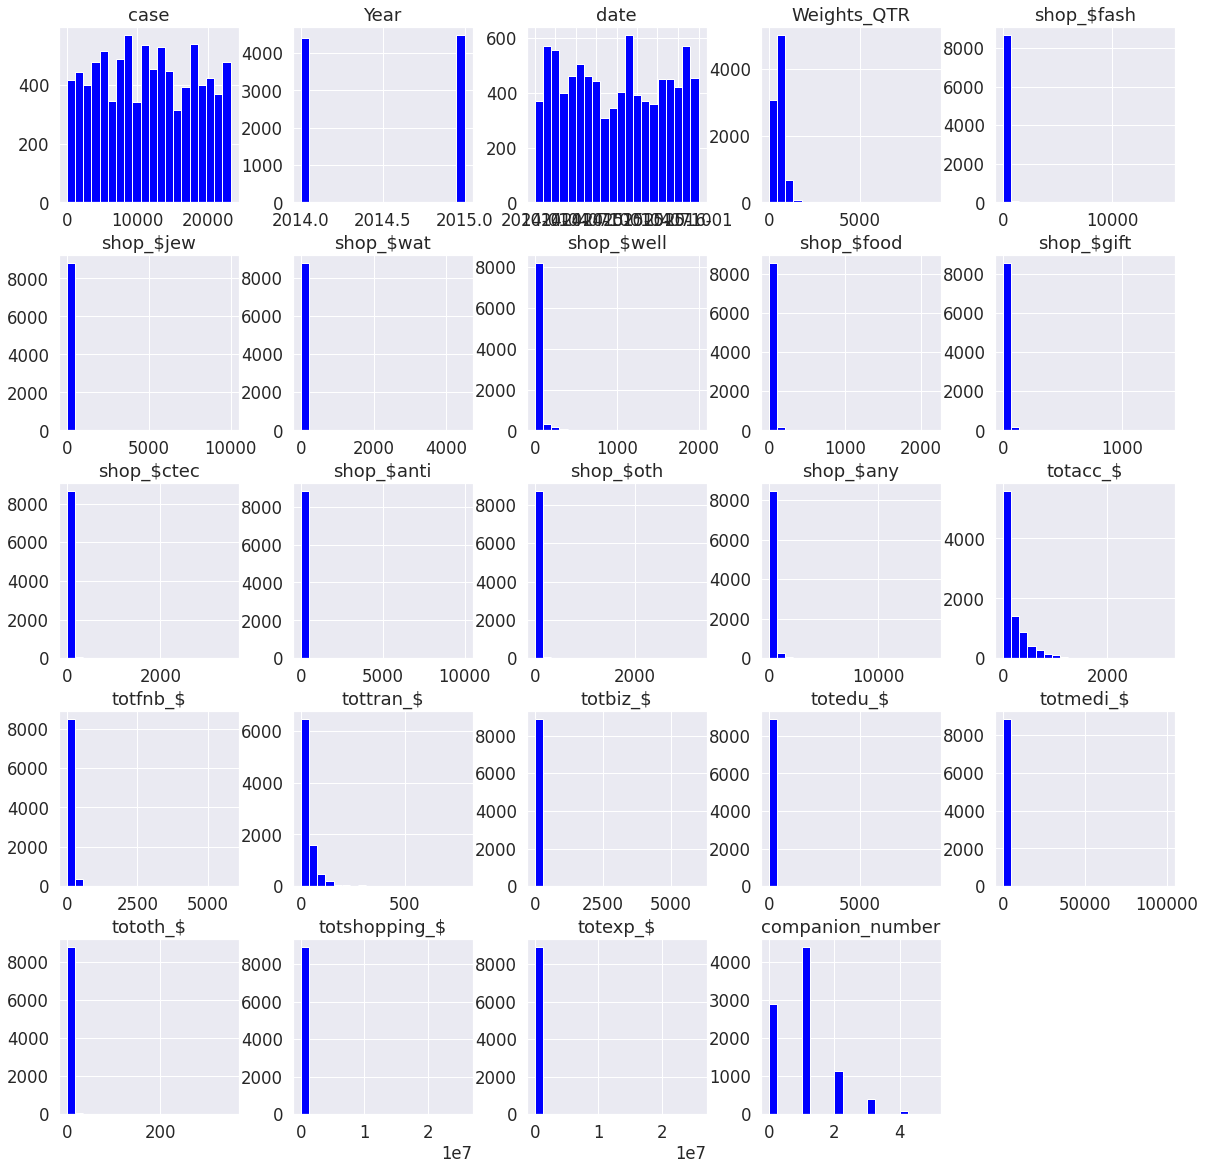

In [99]:

#Visualizing all numerical columns 
sns.set(style="darkgrid", font_scale=1.5,rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20, color="blue")

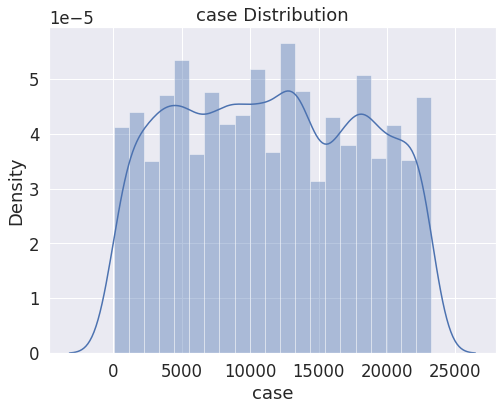

In [100]:
# case Distribution
plt.figure(figsize = (8,6))
sns.distplot(data['case'])
plt.title('case Distribution')
plt.show()


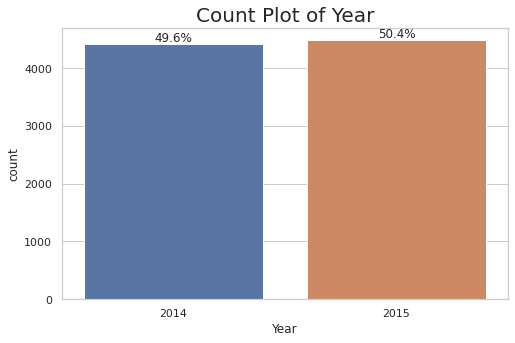

In [101]:
#Year


sns.set(style="whitegrid")
plt.figure(figsize = (8,5))
total = float(len(data))
ax = sns.countplot(x = 'Year',data=data,orient='v')
plt.title('Count Plot of Year', fontsize=20)
plt.xlabel('Year')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

In [102]:
#date

In [103]:
#Weights_QTR
data['Weights_QTR'].value_counts()

317.743750     160
308.766234     154
310.762963     135
451.398496     133
400.192000     125
              ... 
5467.000000      1
4700.000000      1
7492.000000      1
7489.000000      1
6380.000000      1
Name: Weights_QTR, Length: 192, dtype: int64

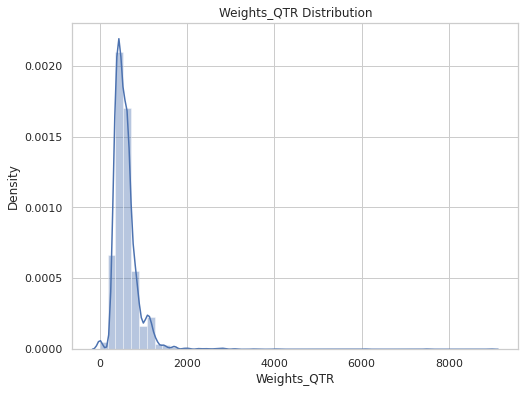

In [104]:
plt.figure(figsize = (8,6))
sns.distplot(data['Weights_QTR'])
plt.title('Weights_QTR Distribution')
plt.show()

In [105]:
# seggregating all shopping related expenses and other food,accomodation,travel etc expenses into groups for visualization

shop_list1=['shop_$fash',
 'shop_$jew',
 'shop_$wat',
 'shop_$well']
shop_list2=['shop_$food',
 'shop_$gift',
 'shop_$ctec',
 'shop_$anti']
shop_list3= ['shop_$oth',
 'shop_$any']

exp_1= ['totacc_$',
 'totfnb_$',
 'tottran_$']
exp_2=['totbiz_$',
 'totedu_$',
 'totmedi_$']
exp_3=['tototh_$',
 'totshopping_$',
 'totexp_$']

In [106]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
 


  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

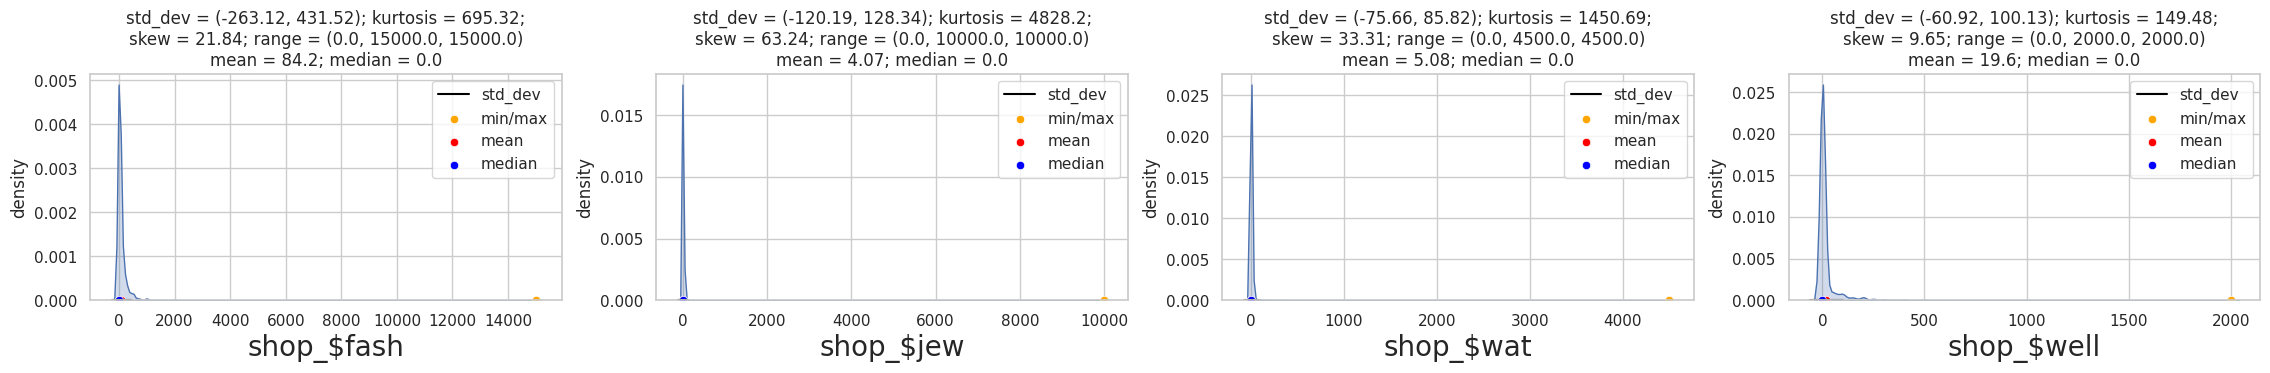

In [107]:
UVA_numeric(data,shop_list1)

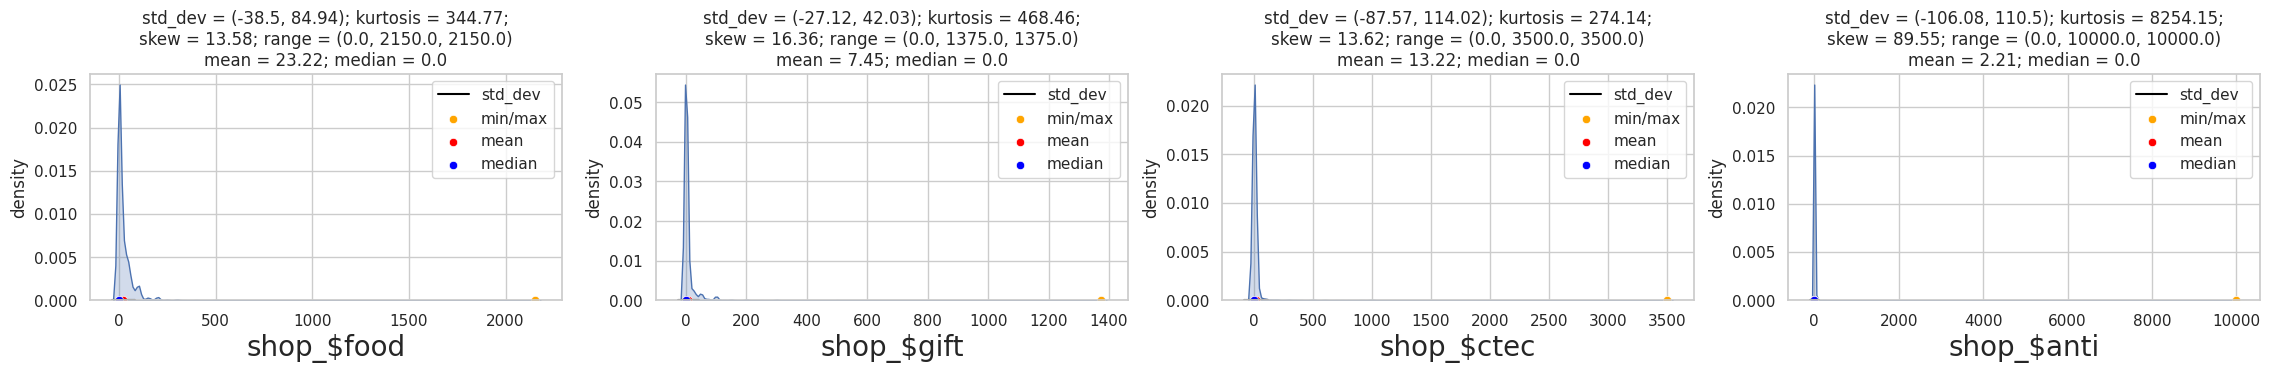

In [108]:
UVA_numeric(data,shop_list2)

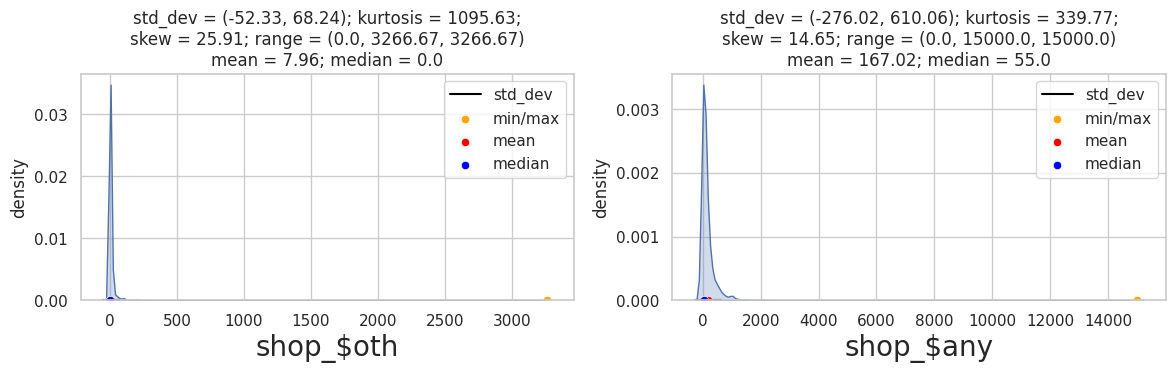

In [109]:
UVA_numeric(data,shop_list3)

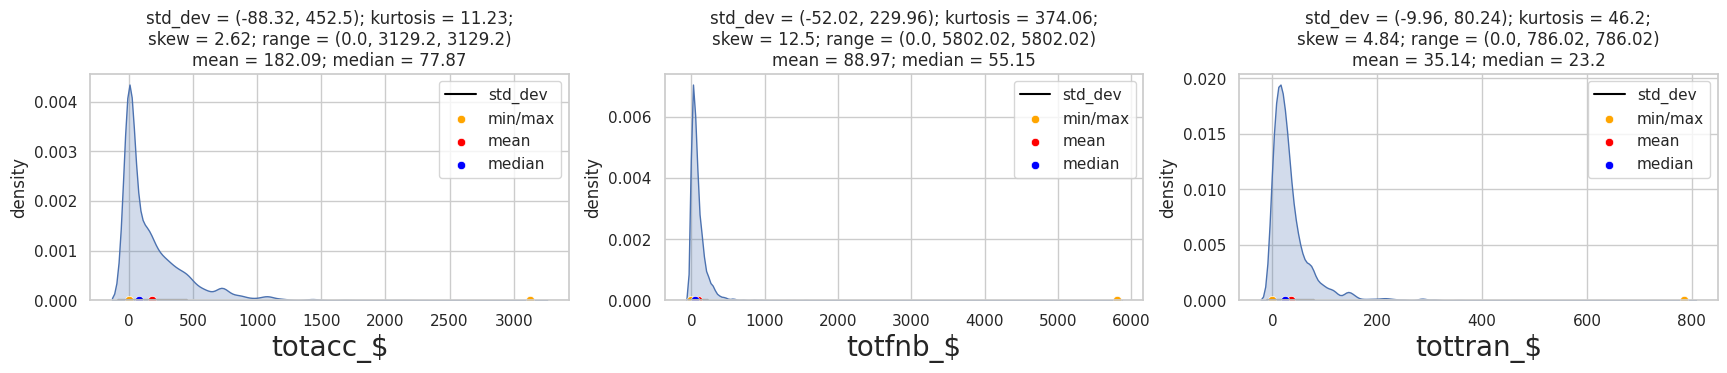

In [110]:
UVA_numeric(data,exp_1)

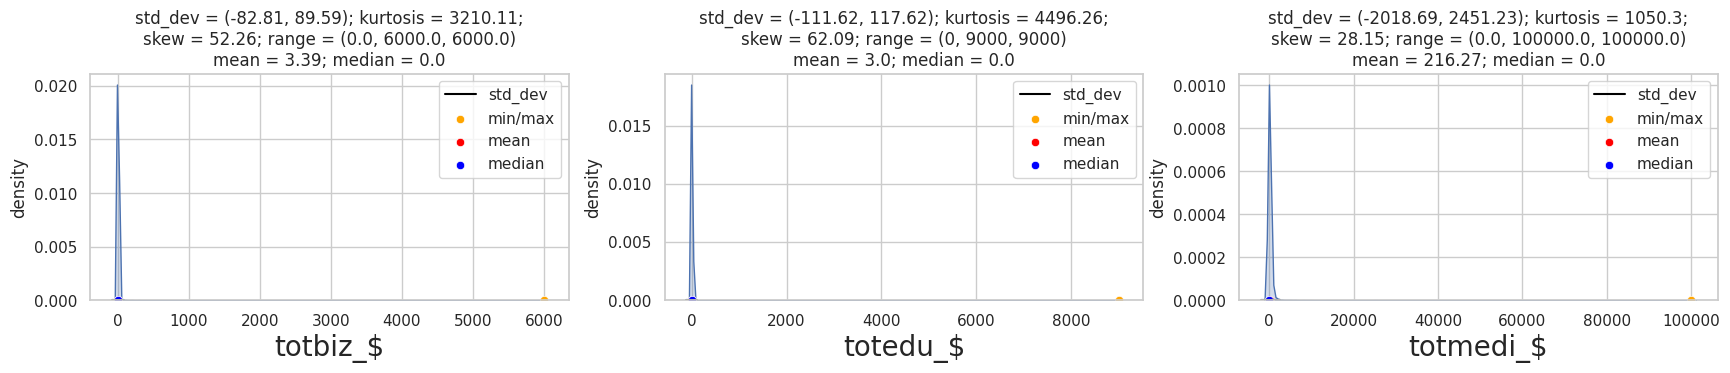

In [111]:
UVA_numeric(data,exp_2)

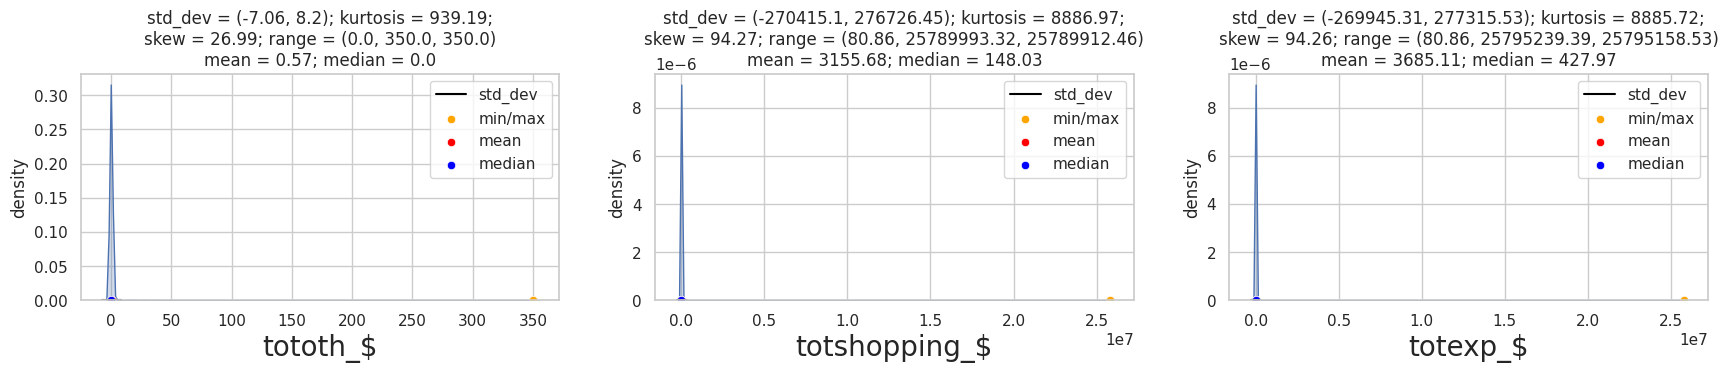

In [112]:
UVA_numeric(data,exp_3)

Summary of Expense from the above plots

1. Spend range is between 0 and 1500 dollars
2. Highest amount is spend for accomodation and fashion

**Creating a new column for shopping expense**

In [113]:
#Creating a new column to sum up shopping expense

data['shopping_exp'] = data[['shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any']].sum(axis=1)

In [114]:
# creating a new column of Total Expense of visitors
data['Total_Expense']=data[['shopping_exp','totexp_$']].sum(axis=1)

In [115]:
data[['shopping_exp','totexp_$','Total_Expense']]

shopping_exp     totexp_$  Total_Expense
0      1500.000000  1096.186995    2596.186995
1       133.333333   379.309926     512.643259
2         0.000000   420.727677     420.727677
3       232.000000   378.990074     610.990074
4         0.000000   342.356298     342.356298
...            ...          ...            ...
8882    100.000000   152.884995     252.884995
8883      0.000000   100.863932     100.863932
8884    980.000000   794.744736    1774.744736
8885    400.000000  1157.292504    1557.292504
8886      0.000000   211.889255     211.889255

[8887 rows x 3 columns]

In [116]:
data[['shop_$fash','shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any']]

shop_$fash  shop_$jew  shop_$wat  shop_$well  shop_$food  shop_$gift  \
0       0.000000        0.0        0.0         0.0         0.0         0.0   
1      66.666667        0.0        0.0         0.0         0.0         0.0   
2       0.000000        0.0        0.0         0.0         0.0         0.0   
3      25.000000        0.0        0.0         0.0         0.0        91.0   
4       0.000000        0.0        0.0         0.0         0.0         0.0   
...          ...        ...        ...         ...         ...         ...   
8882   50.000000        0.0        0.0         0.0         0.0         0.0   
8883    0.000000        0.0        0.0         0.0         0.0         0.0   
8884    0.000000        0.0      370.0         0.0       120.0         0.0   
8885  100.000000        0.0       50.0         0.0         0.0        50.0   
8886    0.000000        0.0        0.0         0.0         0.0         0.0   

      shop_$ctec  shop_$anti  shop_$oth   shop_$any  
0          750.0         0.0        0.0  750.000000  
1            0.0         0.0        0.0   66.666667  
2            0.0         0.0        0.0    0.000000  
3            0.0         0.0        0.0  116.000000  
4            0.0         0.0        0.0    0.000000  
...          ...         ...        ...         ...  
8882         0.0         0.0        0.0   50.000000  
8883         0.0         0.0        0.0    0.000000  
8884         0.0         0.0        0.0  490.000000  
8885         0.0         0.0        0.0  200.000000  
8886         0.0         0.0        0.0    0.000000  

[8887 rows x 10 columns]

In [117]:
data[['totacc_$','totfnb_$', 'tottran_$','totbiz_$', 'totedu_$', 'totmedi_$','tototh_$', 'totshopping_$','totexp_$']]

totacc_$    totfnb_$  tottran_$  totbiz_$  totedu_$  totmedi_$  \
0     153.227847   76.613923  11.492089       0.0         0        0.0   
1     155.740741   24.845679  27.203704       0.0         0        0.0   
2     148.153546  139.767496  27.953499       0.0         0        0.0   
3       0.000000  143.760853  14.376085       0.0         0        0.0   
4     153.227847   45.968354  38.306962       0.0         0        0.0   
...          ...         ...        ...       ...       ...        ...   
8882    0.000000   11.010531  11.010531       0.0         0        0.0   
8883    0.000000    0.000000   0.000000      20.0         0        0.0   
8884    0.000000  220.210627   3.670177       0.0         0        0.0   
8885  720.466667   98.000000  57.961905       0.0         0        0.0   
8886   66.063188   27.526328  37.435807       0.0         0        0.0   

      tototh_$  totshopping_$     totexp_$  
0          0.0     854.853136  1096.186995  
1          0.0     171.519802   379.309926  
2          0.0     104.853136   420.727677  
3          0.0     220.853136   378.990074  
4          0.0     104.853136   342.356298  
...        ...            ...          ...  
8882       0.0     130.863932   152.884995  
8883       0.0      80.863932   100.863932  
8884       0.0     570.863932   794.744736  
8885       0.0     280.863932  1157.292504  
8886       0.0      80.863932   211.889255  

[8887 rows x 9 columns]

In [118]:
data.head(2)

case  Year    R.mth       date     intv_nam Country_residence  \
0    18  2015  January 2015-01-01    Cindy Liu         Indonesia   
1    41  2015  January 2015-01-01  Philip Chew         Indonesia   

  City_residence Purpose_grp                Purpose  Weights_QTR  ...  \
0     Yogyakarta     Leisure  Holiday/ Rest & Relax   632.145161  ...   
1          Batam     Leisure  Holiday/ Rest & Relax   341.937500  ...   

          MainHotel travel_companion.1      travel_companion.2  \
0  V Hotel Lavender             Spouse  Children aged 8-12 yrs   
1      Madras Hotel             Spouse   Children aged 0-7 yrs   

  travel_companion.3 travel_companion.4 travel_companion.5 Travel Path  \
0                NaN                NaN                NaN         Air   
1            Friends                NaN                NaN         Sea   

  companion_number shopping_exp Total_Expense  
0                2  1500.000000   2596.186995  
1                3   133.333333    512.643259  

[2 rows x 52 columns]

# Bivariate Analysis

In [119]:
#Categorical columns

categorical_columns

['R.mth',
 'intv_nam',
 'Country_residence',
 'City_residence',
 'Purpose_grp',
 'Purpose',
 'Air_Terminal',
 'Sea_Terminal',
 'Land_Terminal',
 'langint',
 '1st_visit',
 'length_stay',
 'travel_type',
 'f1_gender',
 'f3_occupation',
 'f4_industry',
 'f5_designation',
 'f5_designation.oth',
 'MainAccomm',
 'MainHotel',
 'travel_companion.1',
 'travel_companion.2',
 'travel_companion.3',
 'travel_companion.4',
 'travel_companion.5']

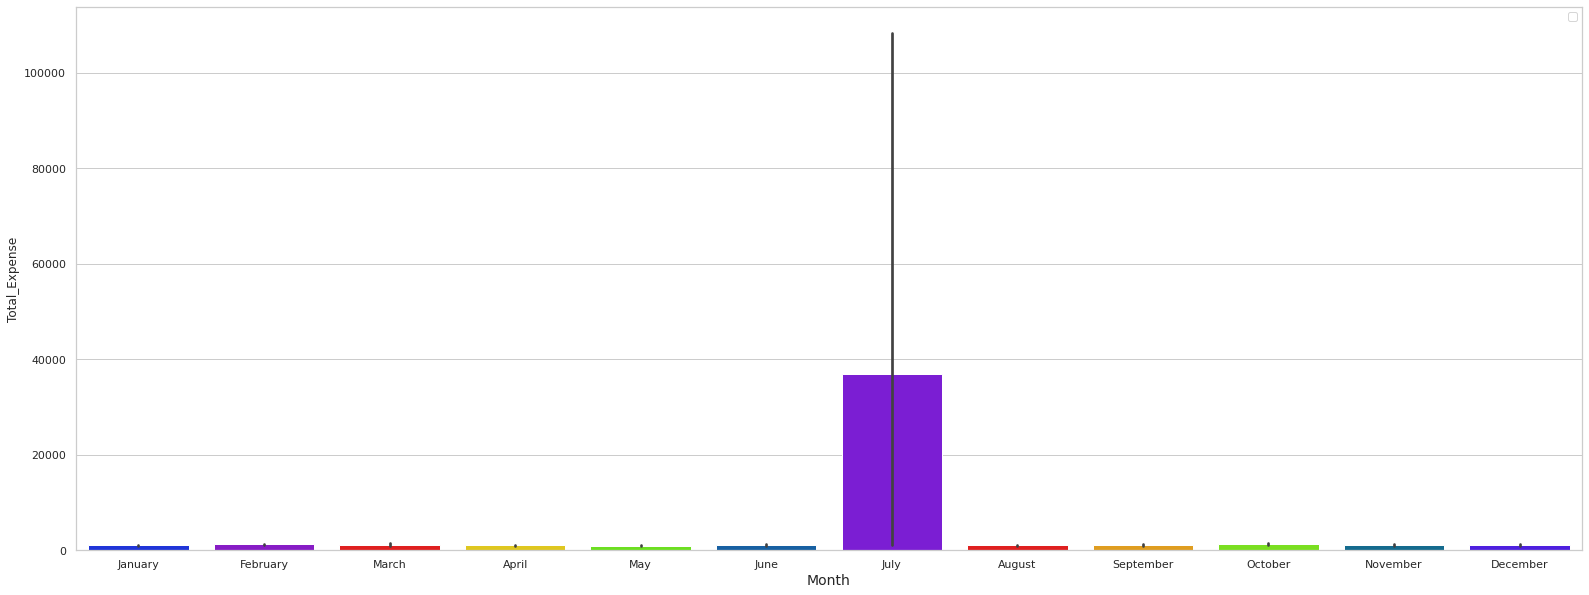

In [120]:
#R.mth

plt.figure(figsize=(27,10))
sns.barplot('R.mth' ,'Total_Expense', data=data ,palette='prism_r')
plt.xlabel('Month', fontsize=14)
plt.legend()
plt.show()

In [121]:
#Visitors who came in July month had spend more

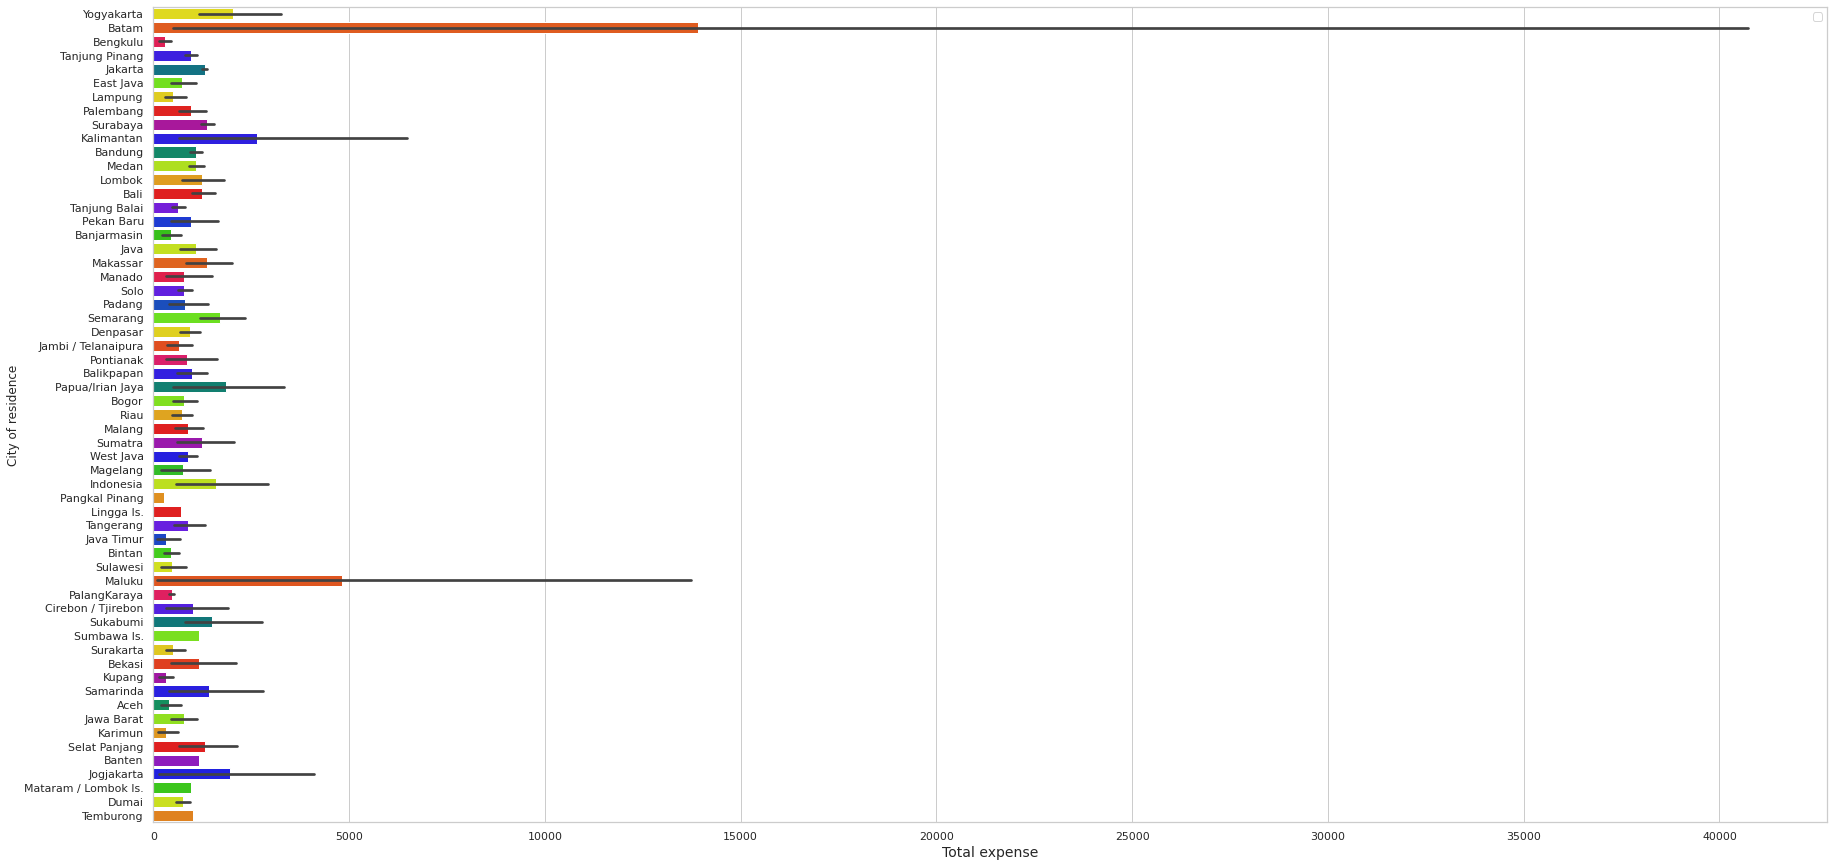

In [122]:
#City_residence
plt.figure(figsize=(30,15))
sns.barplot(y='City_residence' ,x='Total_Expense', data=data ,palette='prism_r')
plt.xlabel('Total expense', fontsize=14)
plt.ylabel('City of residence')
plt.legend()
plt.show()

In [123]:
#Visualising City of residence vs max and min spend amount

data[["Total_Expense","City_residence"]].groupby(['City_residence']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

In [124]:
#People who came  from Batam and Maluku have spend more 

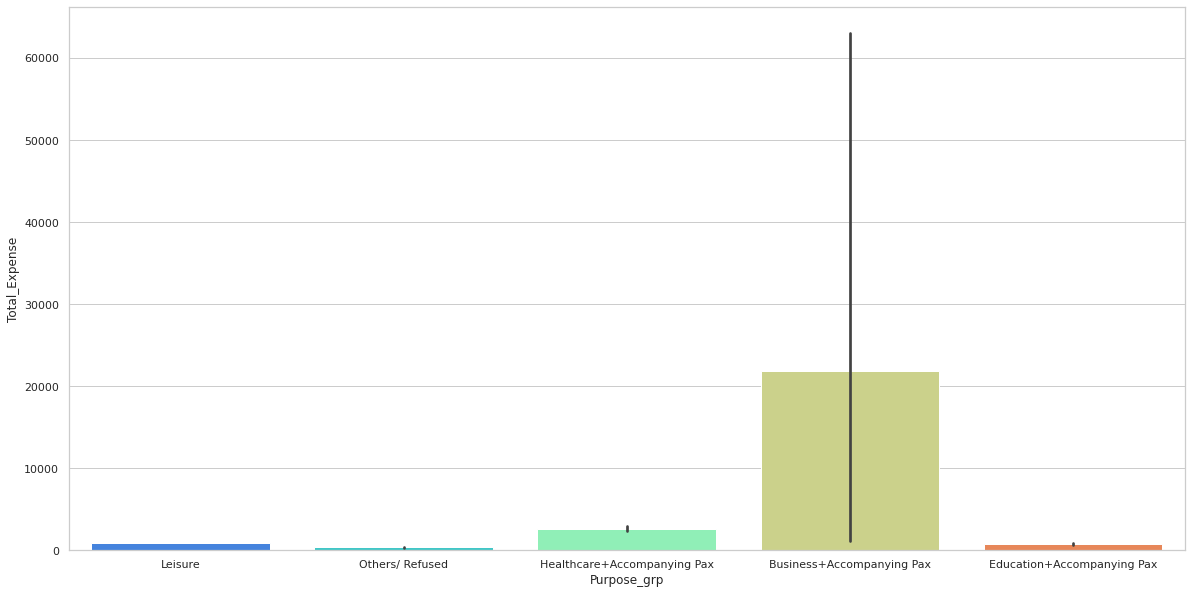

In [125]:
#Purpose_grp

plt.figure(figsize=(20,10))
sns.barplot(x="Purpose_grp", y="Total_Expense", data=data,palette='rainbow')

In [126]:
#those who came for Business or those who came as accompanying have spend more

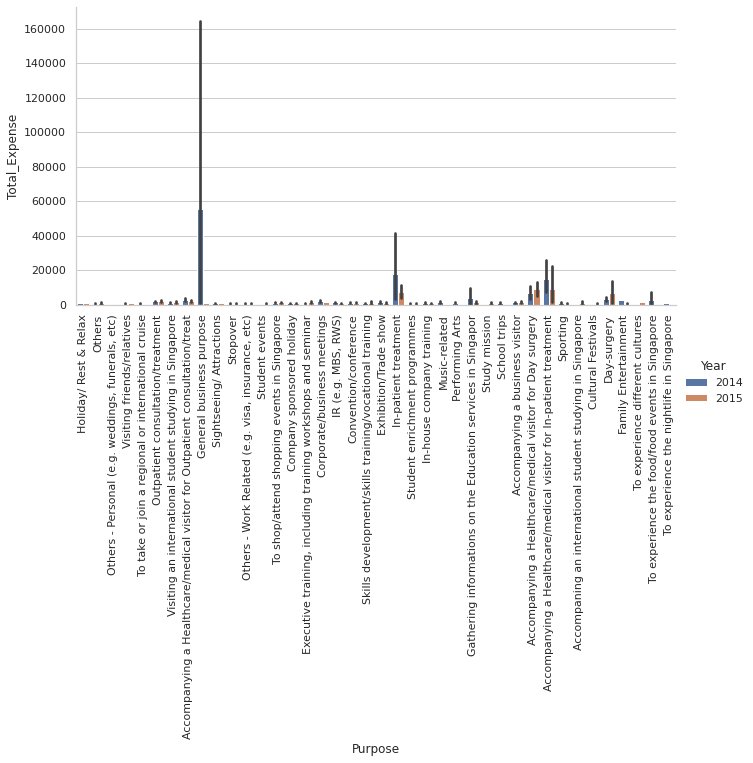

In [127]:
#visualisation of Purpose vs Expense

sns.catplot(data=data, x="Purpose", y="Total_Expense", hue="Year", kind="bar",height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [128]:
#Those who came for Business purpose have spend more,followed by those who came as accompanying for medical treatment undergoing patient

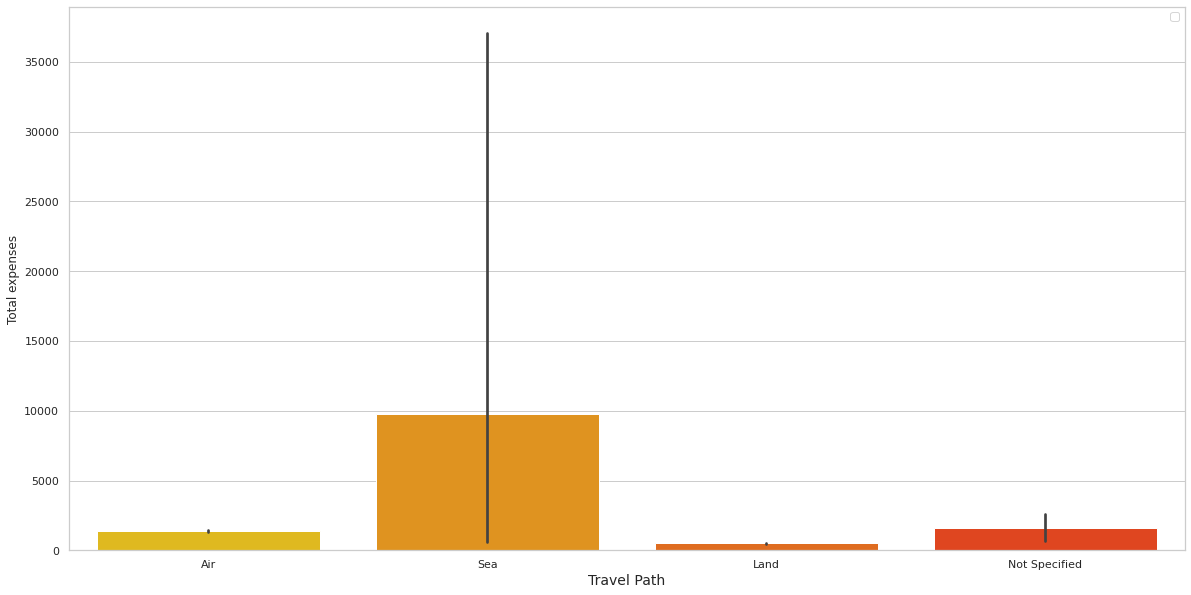

In [129]:
#travel path

plt.figure(figsize=(20,10))
sns.barplot('Travel Path','Total_Expense', data=data ,palette='autumn_r')
plt.xlabel('Travel Path', fontsize=14)
plt.ylabel('Total expenses')
plt.legend()
plt.show()

In [130]:
#Those who came by Sea have spend more

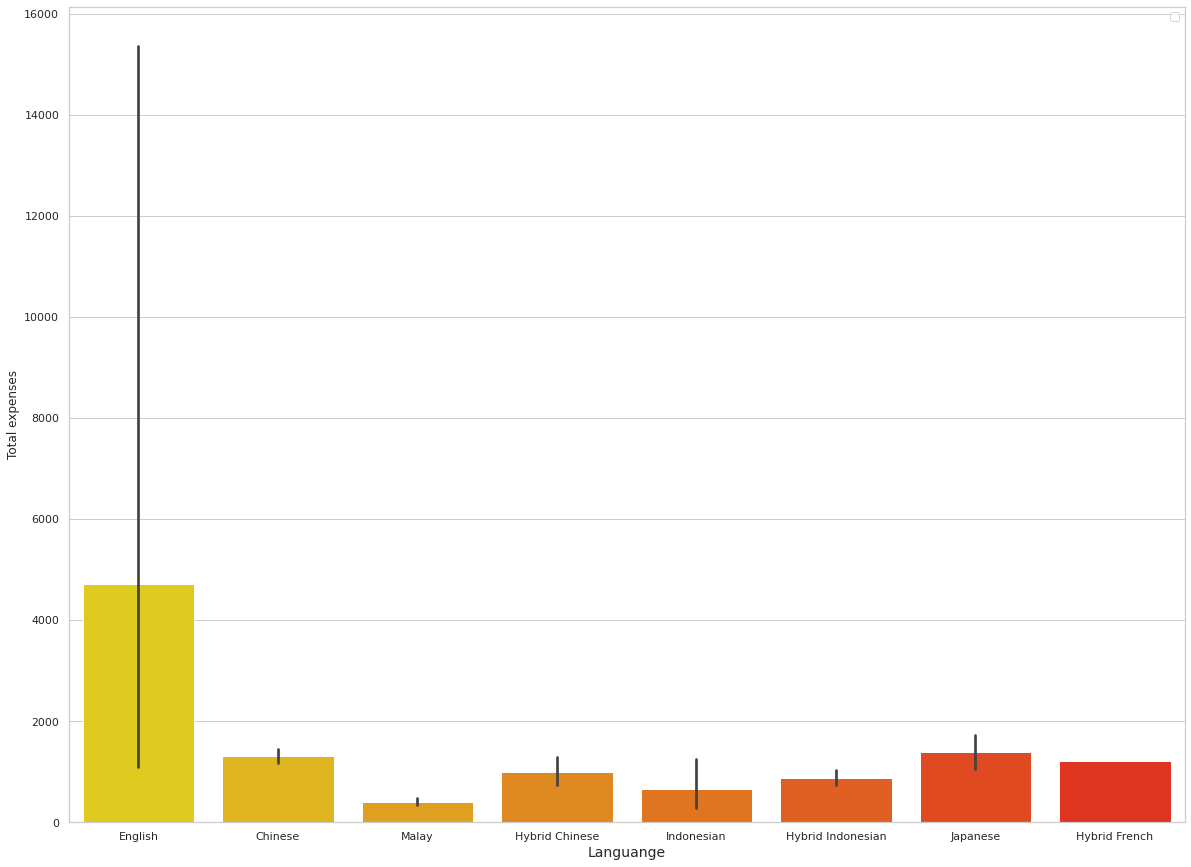

In [131]:
#langint

plt.figure(figsize=(20,15))
sns.barplot('langint','Total_Expense', data=data ,palette='autumn_r')
plt.xlabel('Languange', fontsize=14)
plt.ylabel('Total expenses')
plt.legend()
plt.show()

In [132]:
#English speaking visitors have spend more followed by those who speaks Hybrid French

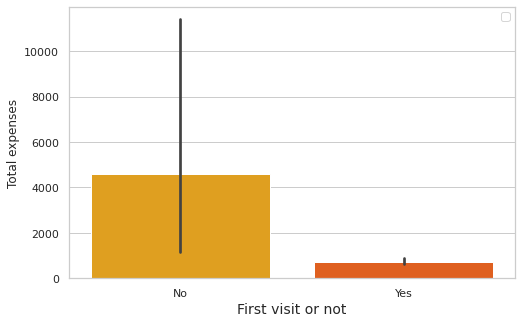

In [133]:
#1st_visit

plt.figure(figsize=(8,5))
sns.barplot('1st_visit','Total_Expense', data=data ,palette='autumn_r')
plt.xlabel('First visit or not', fontsize=14)
plt.ylabel('Total expenses')
plt.legend()
plt.show()


In [134]:
#Those who have visited Singapore more than once have spend more

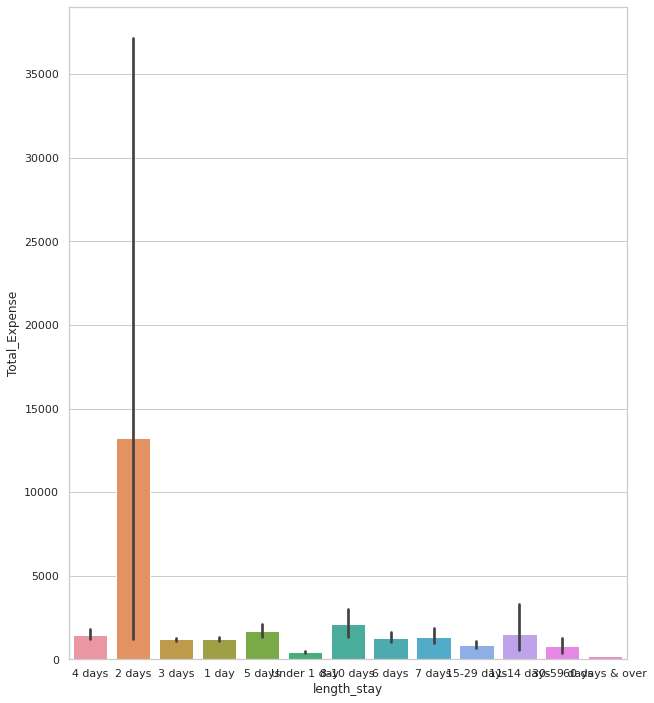

In [135]:
plt.figure(figsize=(10,12))
sns.barplot(x='length_stay',y='Total_Expense', data=data )
plt.show()

In [136]:
#Those who stayed for 2 days have spend more

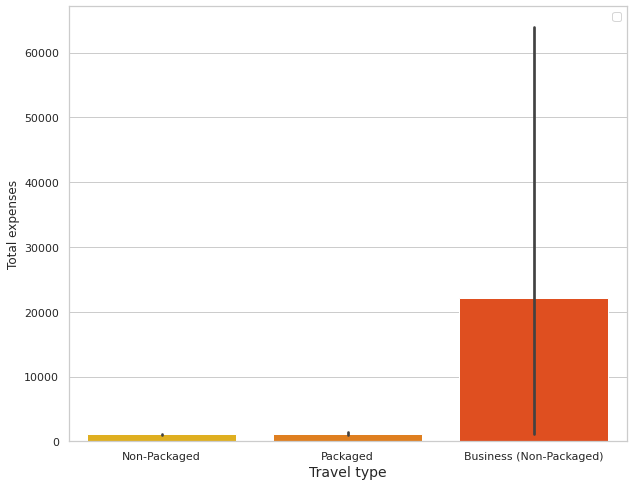

In [137]:
#'travel_type'


plt.figure(figsize=(10,8))
sns.barplot('travel_type','Total_Expense', data=data ,palette='autumn_r')
plt.xlabel('Travel type', fontsize=14)
plt.ylabel('Total expenses')
plt.legend()
plt.show()

In [138]:
#Non pacakged Visitors have spend more

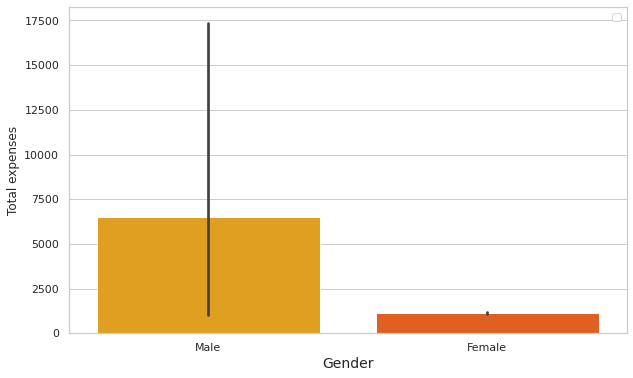

In [139]:
#'f1_gender'

plt.figure(figsize=(10,6))
sns.barplot('f1_gender','Total_Expense', data=data ,palette='autumn_r')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total expenses')
plt.legend()
plt.show()

In [140]:
#Male travellors have spend more compared to females

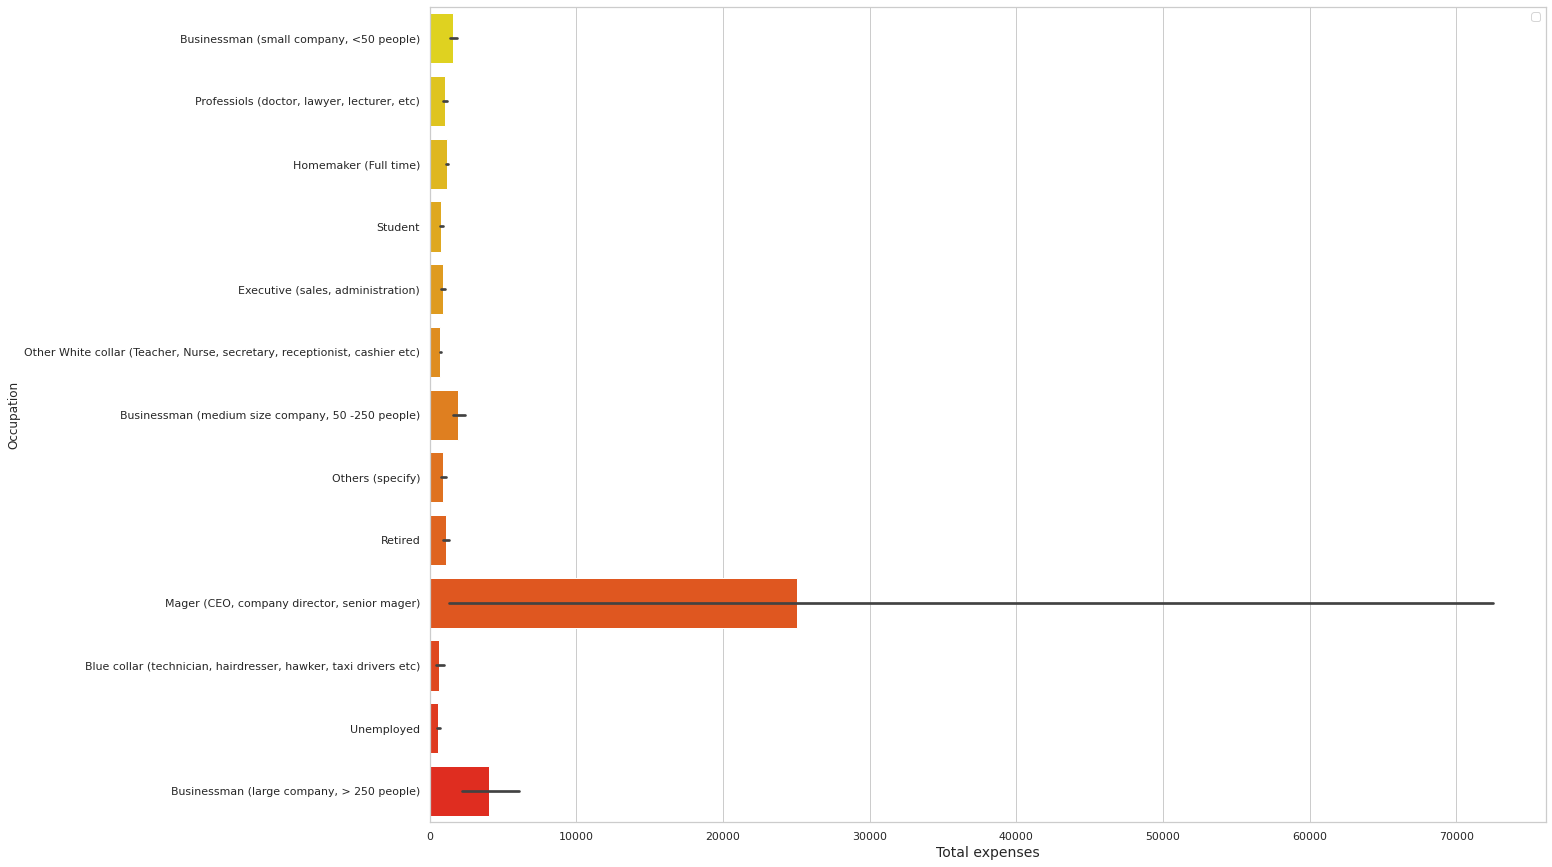

In [141]:
#'f3_occupation'

plt.figure(figsize=(20,15))
sns.barplot('Total_Expense','f3_occupation', data=data ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Occupation')
plt.legend()
plt.show()

In [142]:
#Those who handle the positions as Manager(CEO,company director,senior manager) have spend more.

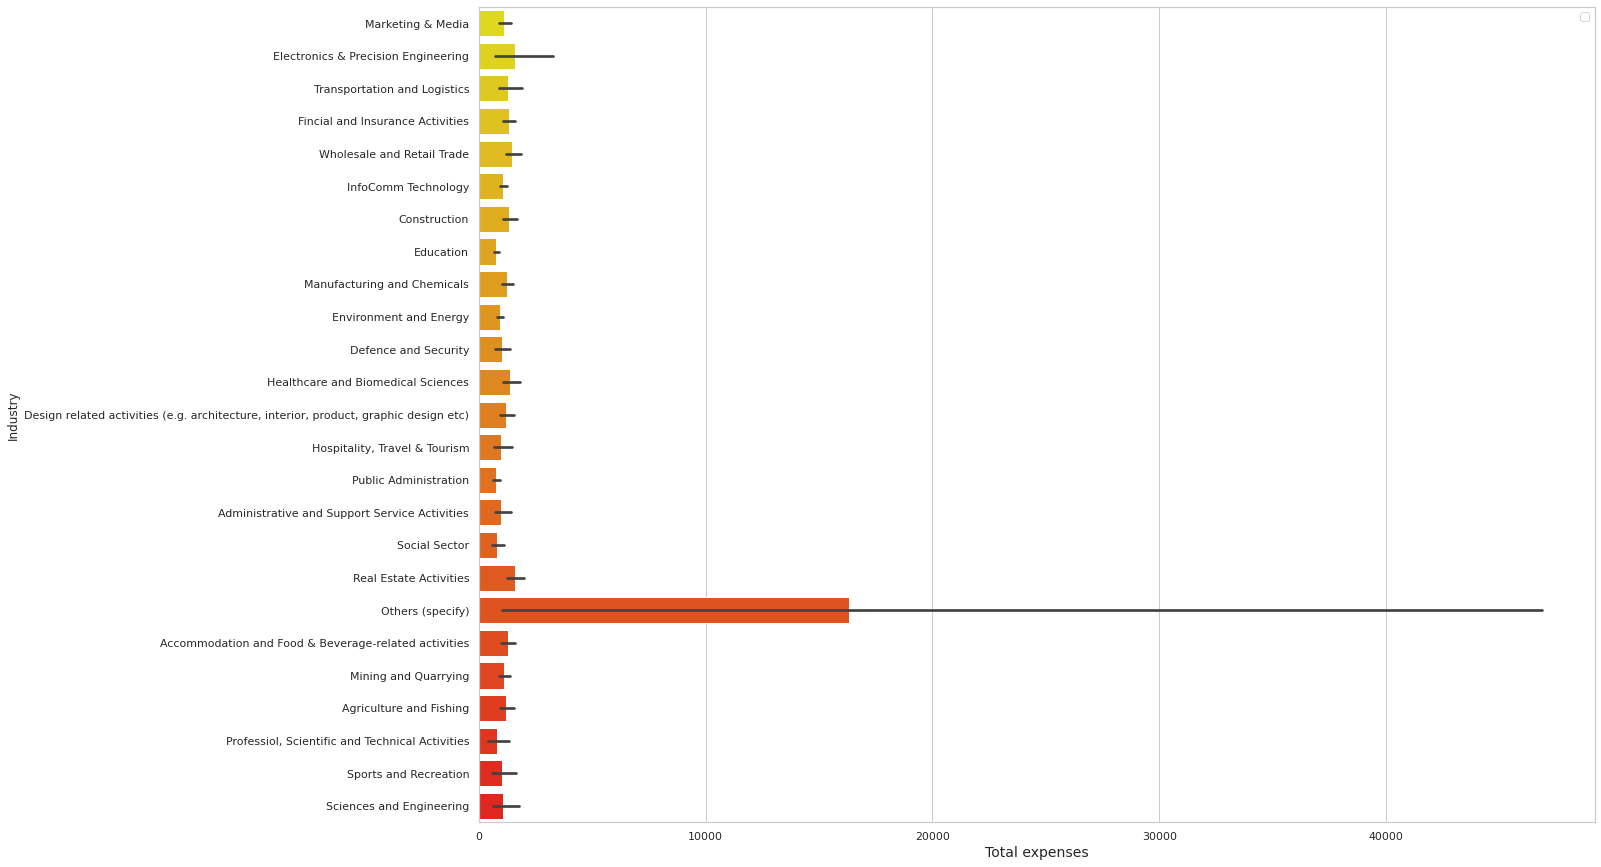

In [143]:
#'f4_industry'

plt.figure(figsize=(20,15))
sns.barplot('Total_Expense','f4_industry', data=data ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Industry')
plt.legend()
plt.show()

In [144]:
#As per data the poeple from industry who have spend more have not specified their industry type

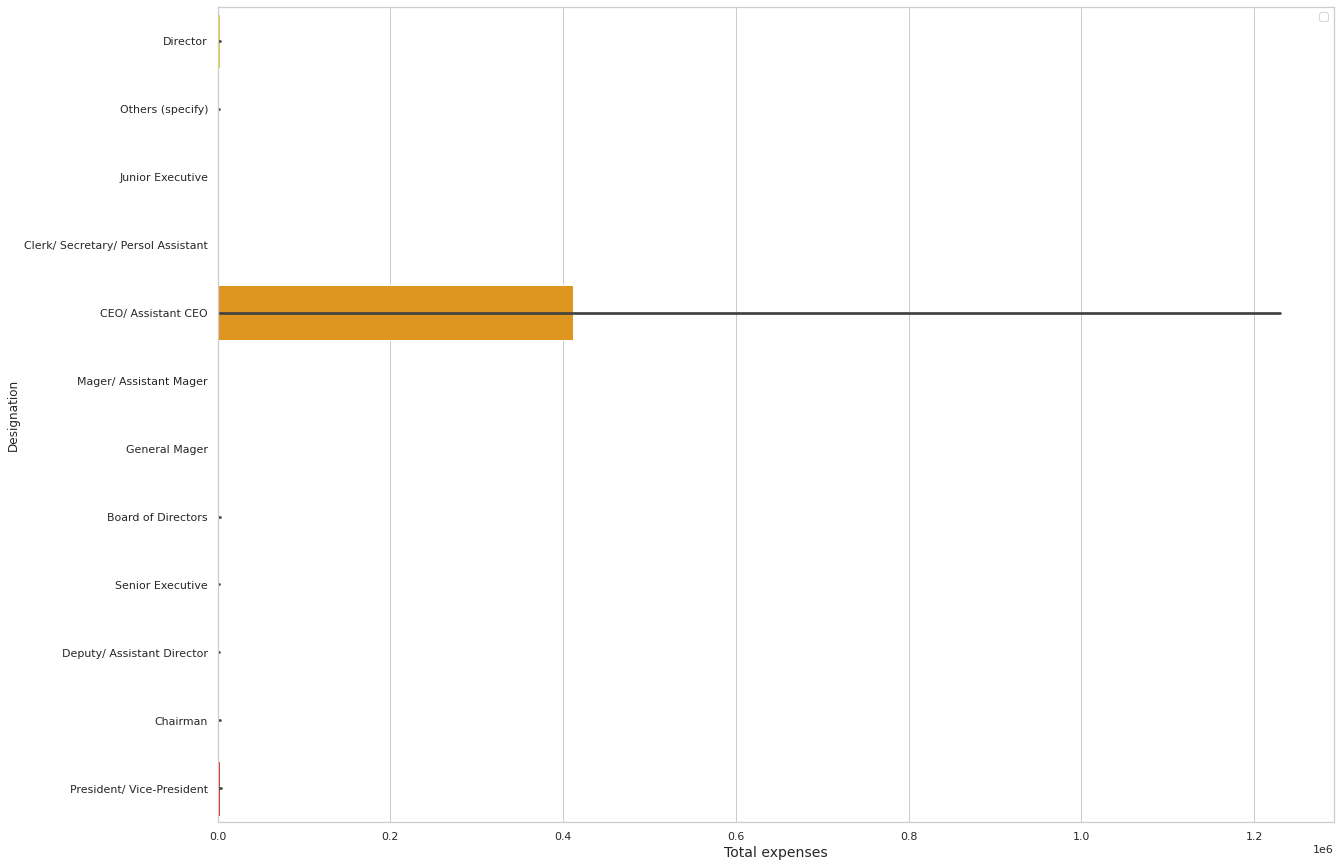

In [145]:
#'f5_designation'

plt.figure(figsize=(20,15))
sns.barplot('Total_Expense','f5_designation', data=data ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Designation')
plt.legend()
plt.show()

In [146]:
#those who were CEO/Assistant CEO have spend more

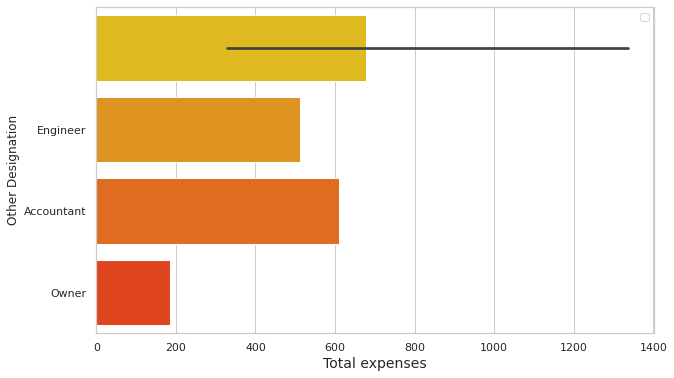

In [147]:
#'f5_designation.oth'

plt.figure(figsize=(10,6))
sns.barplot('Total_Expense','f5_designation.oth', data=data[:10] ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Other Designation')
plt.legend()
plt.show()

In [148]:
#The designation of people who have spend more has not specified

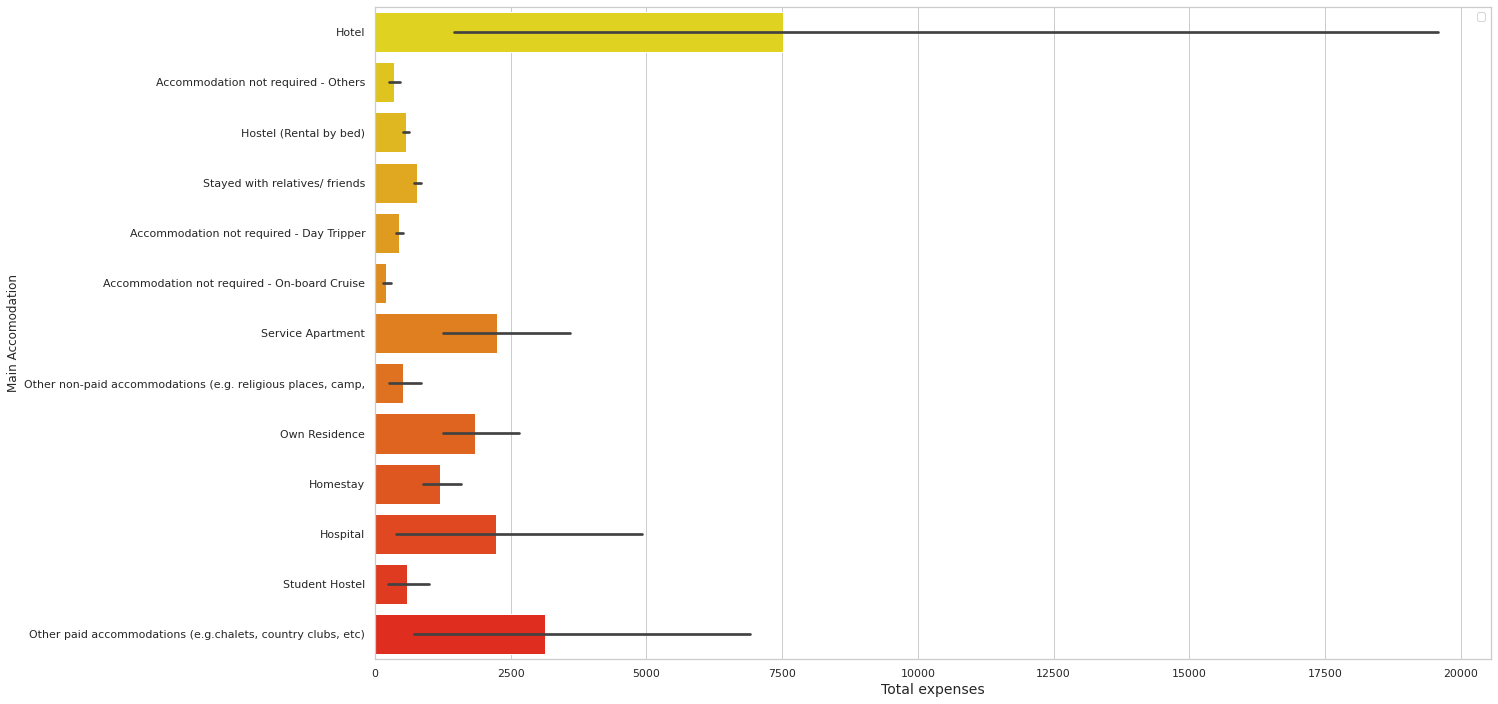

In [149]:
#'MainAccomm'


plt.figure(figsize=(20,12))
sns.barplot('Total_Expense','MainAccomm', data=data ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Main Accomodation')
plt.legend()
plt.show()

In [150]:
#The category of people who stayed in Hotel have spend more,followed by those with other accomodation chosen

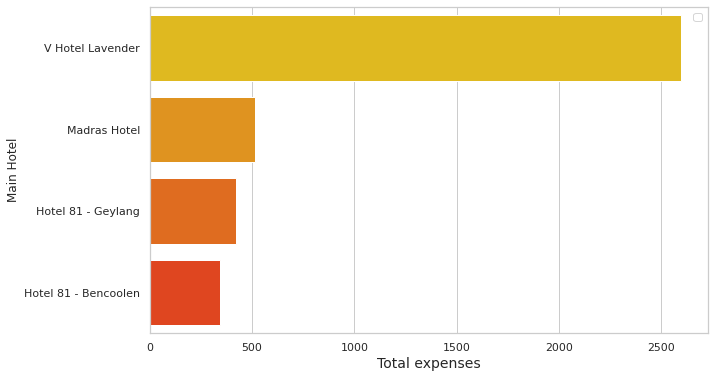

In [151]:
#'MainHotel'

plt.figure(figsize=(10,6))
sns.barplot('Total_Expense','MainHotel', data=data[:5] ,palette='autumn_r')
plt.xlabel('Total expenses', fontsize=14)
plt.ylabel('Main Hotel')
plt.legend()
plt.show()

In [152]:
#Looks like V Hotel Lavender was expensive as those who stayed there have spend more
#The top expensive Hotels as per expenses is been given above

**Travel Companion columns vs Total Expense**

<Figure size 1440x1152 with 0 Axes>

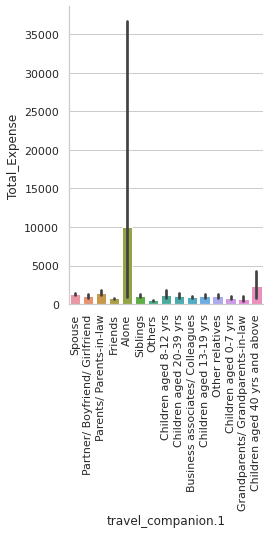

In [153]:
plt.figure(figsize=(20,16))
sns.catplot("travel_companion.1","Total_Expense", data=data, kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1152 with 0 Axes>

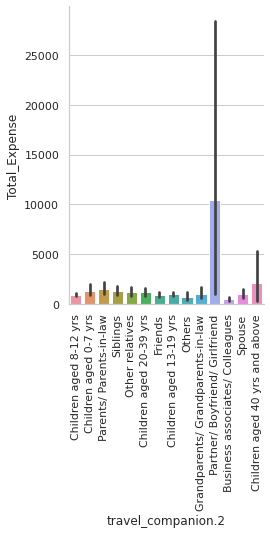

In [154]:
plt.figure(figsize=(20,16))
sns.catplot("travel_companion.2","Total_Expense", data=data, kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1152 with 0 Axes>

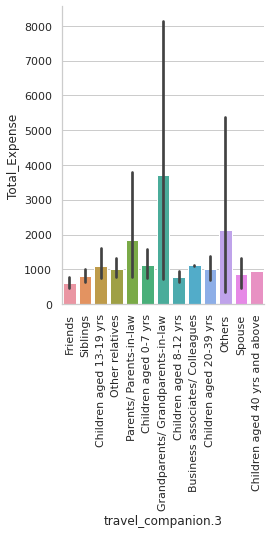

In [155]:
plt.figure(figsize=(20,16))
sns.catplot("travel_companion.3","Total_Expense", data=data, kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1152 with 0 Axes>

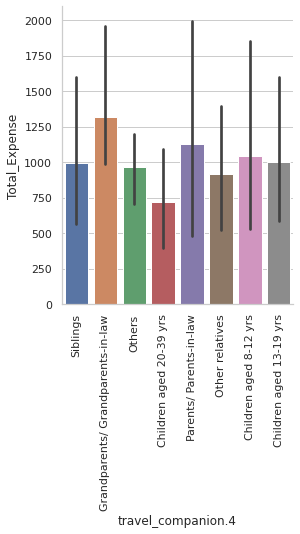

In [156]:
plt.figure(figsize=(20,16))
sns.catplot("travel_companion.4","Total_Expense", data=data, kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1152 with 0 Axes>

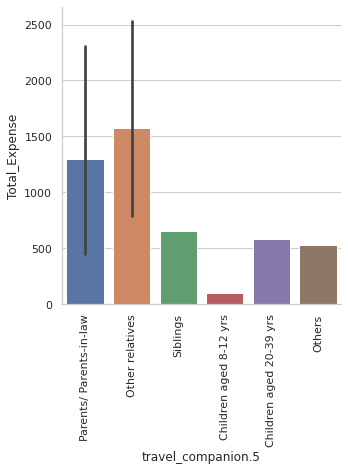

In [157]:
plt.figure(figsize=(20,16))
sns.catplot("travel_companion.5","Total_Expense", data=data, kind="bar")
plt.xticks(rotation=90)
plt.show()

In [158]:
#Travel Companion 1 - Alone
#Travel Companion 2 - Partner/Boyfriend?Girlfriend
#Travel Companion 3 - Grandparents/Grandparents in-law
#Travel Companion 4 - Grandparents/Grandparents in-law , Parents/Parents in-law
#Travel Companion 5 - Other Relatives

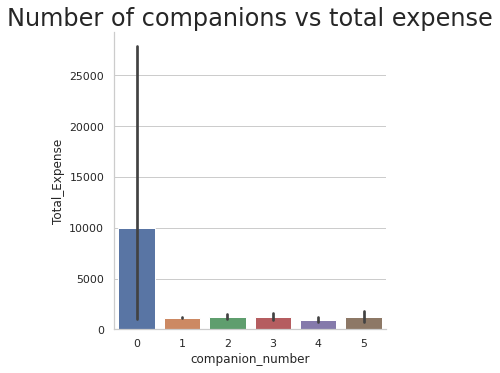

In [159]:
#companion_number

#Visualising Number of companions vs total expense
sns.catplot("companion_number","Total_Expense", data=data, kind="bar")
plt.title("Number of companions vs total expense",fontsize=24)
plt.show()

In [160]:
#Those who travelled alone have spend more compared to those who were with a companion

In [161]:
numerical_columns

['case',
 'Year',
 'date',
 'Weights_QTR',
 'shop_$fash',
 'shop_$jew',
 'shop_$wat',
 'shop_$well',
 'shop_$food',
 'shop_$gift',
 'shop_$ctec',
 'shop_$anti',
 'shop_$oth',
 'shop_$any',
 'totacc_$',
 'totfnb_$',
 'tottran_$',
 'totbiz_$',
 'totedu_$',
 'totmedi_$',
 'tototh_$',
 'totshopping_$',
 'totexp_$']

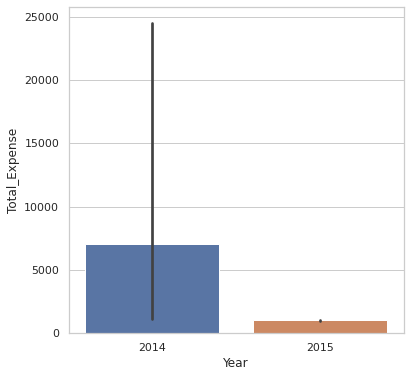

In [162]:
#year

plt.figure(figsize=(6,6))
sns.barplot(x='Year',y='Total_Expense', data=data )
plt.show()

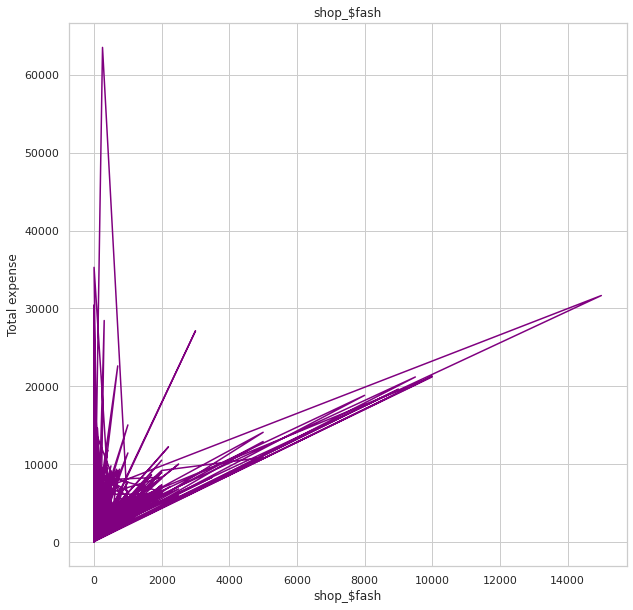

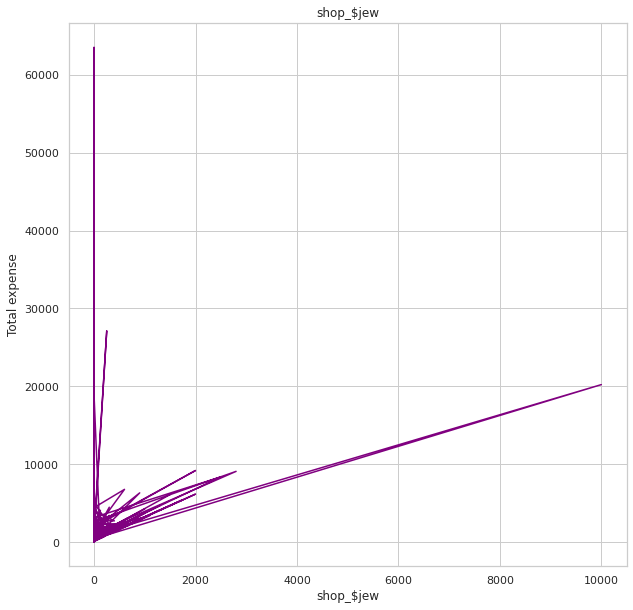

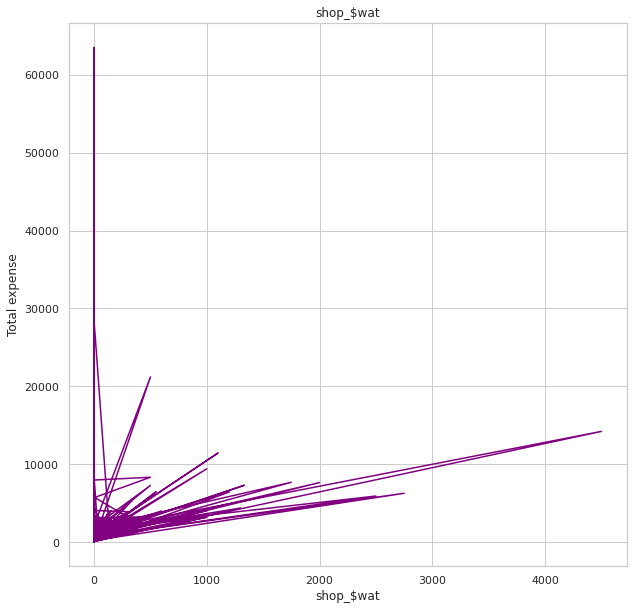

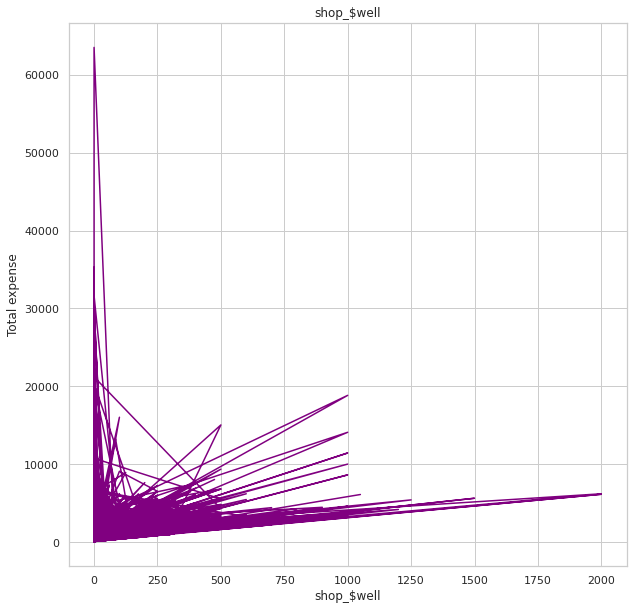

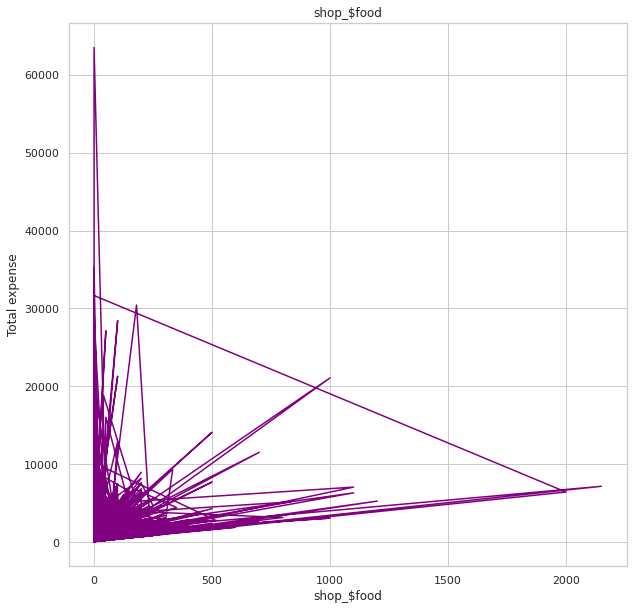

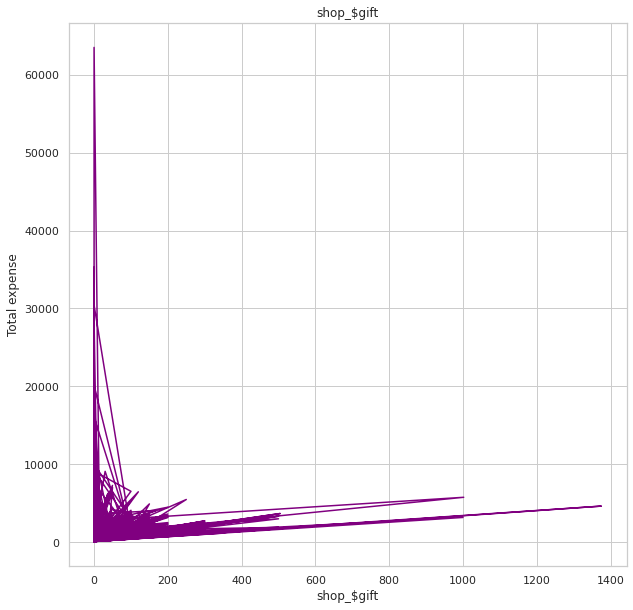

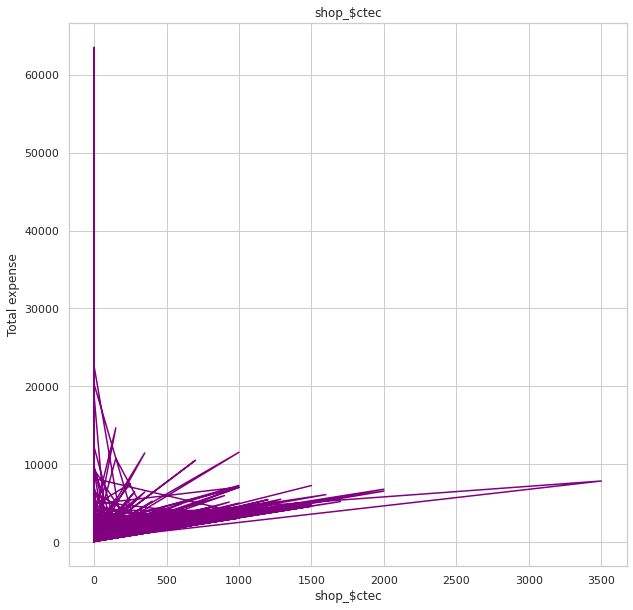

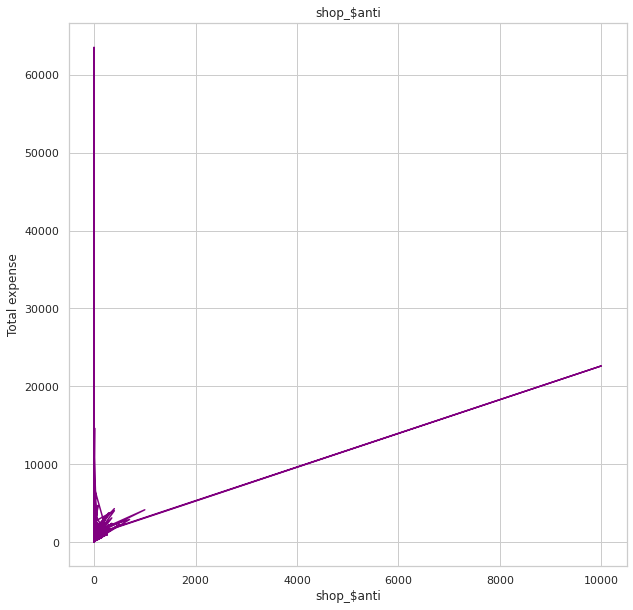

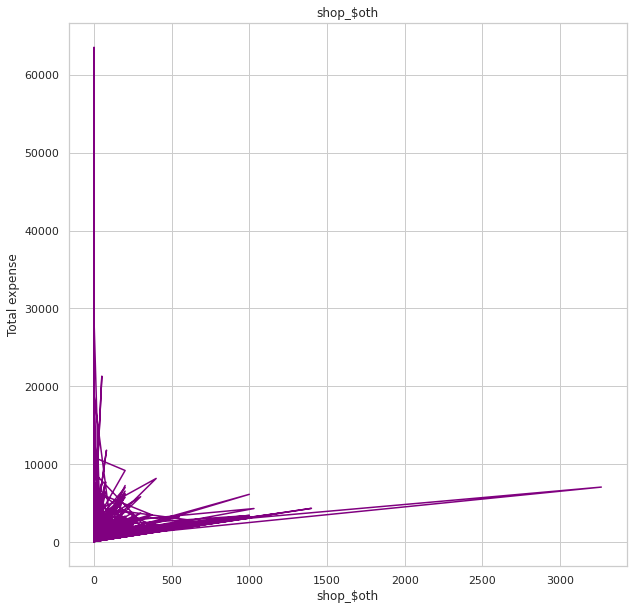

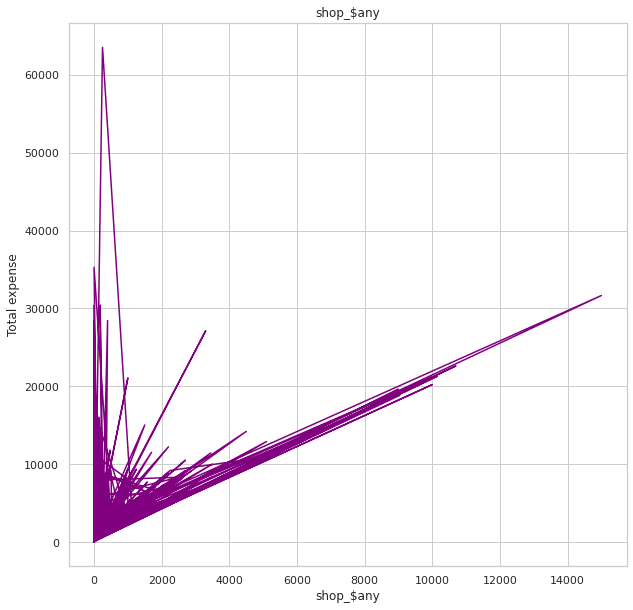

In [163]:
#Bivariate analysis of different shopping expenses against Total Expense

for i in ['shop_$fash', 'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift', 'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any']:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(data[i],data['Total_Expense'],color='purple')
    plt.xlabel(i)
    plt.ylabel("Total expense")
    plt.title(i)
    plt.show()

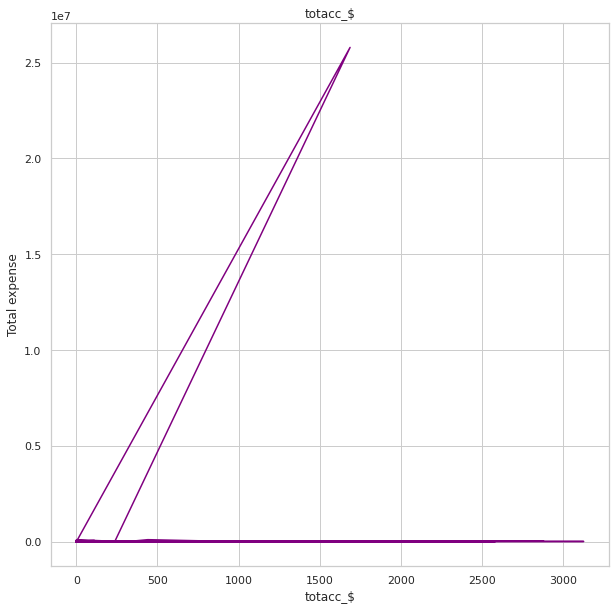

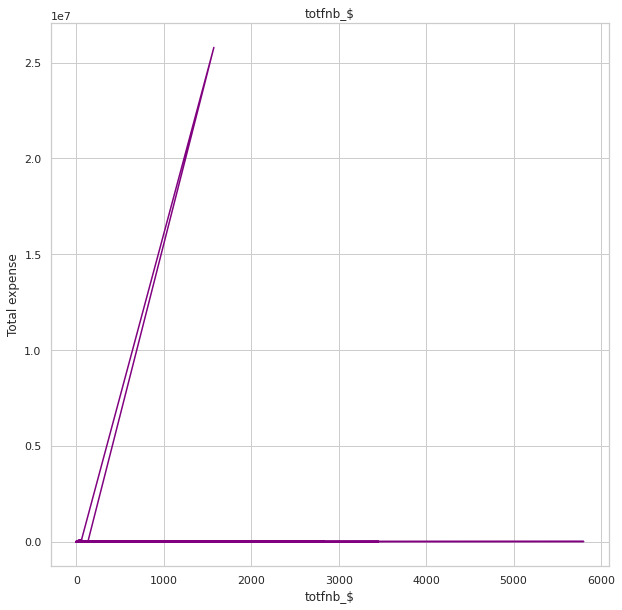

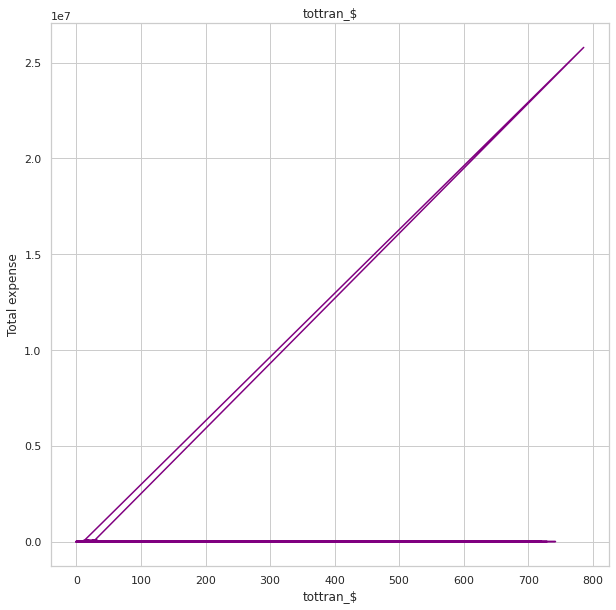

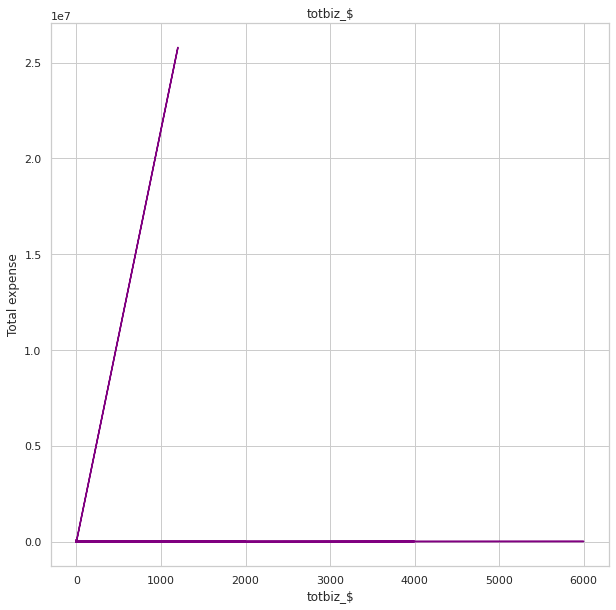

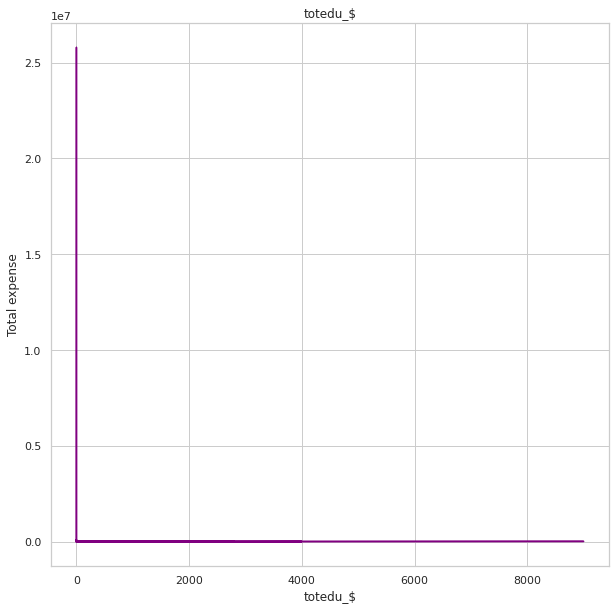

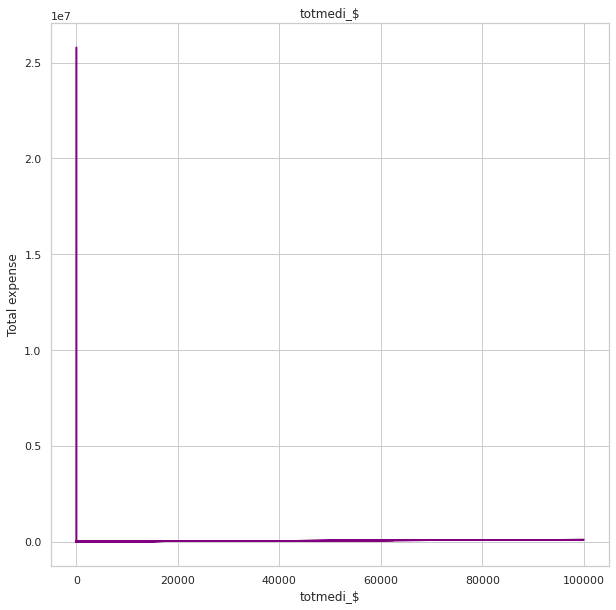

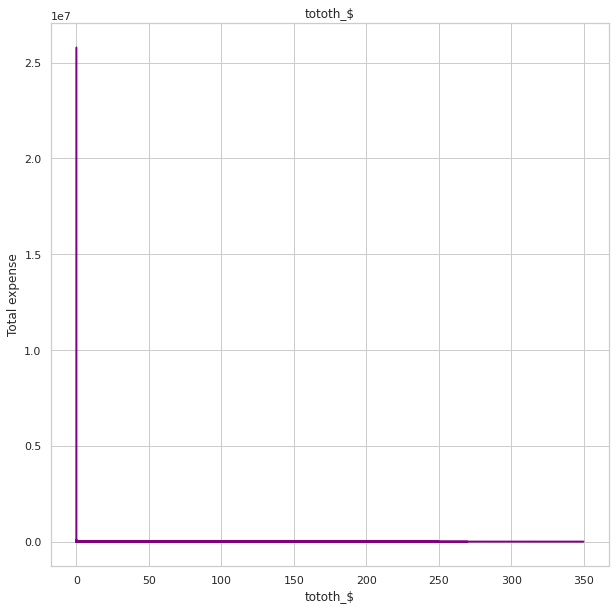

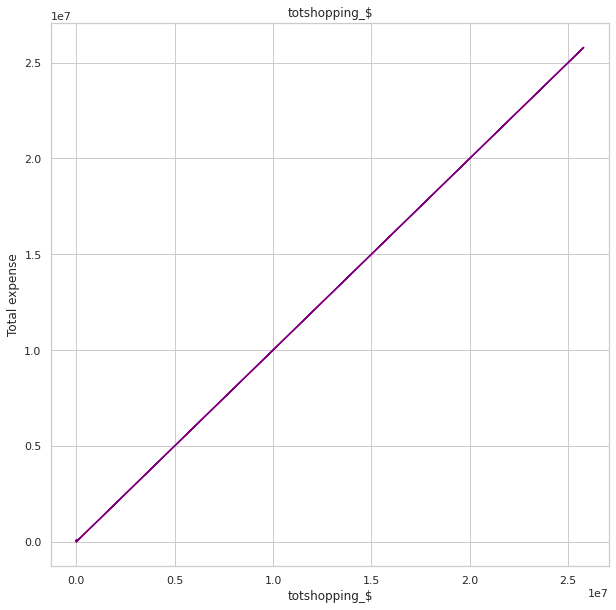

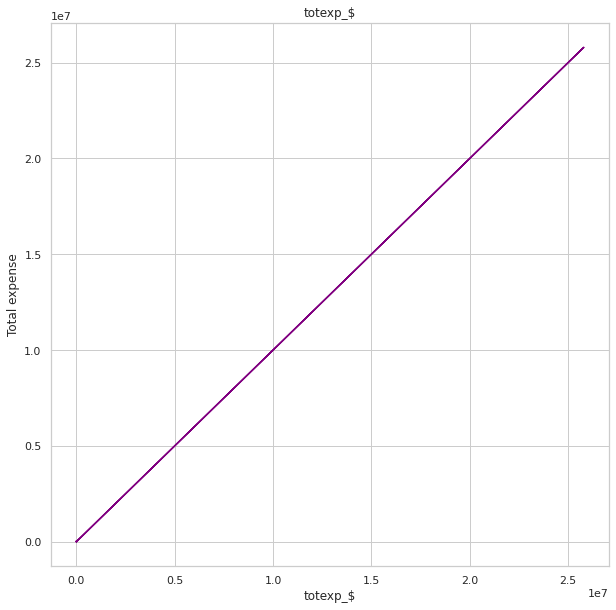

In [164]:
#Bivariate analysis of sum of various expenses and Total Expense

for i in ['totacc_$',
 'totfnb_$',
 'tottran_$',
 'totbiz_$',
 'totedu_$',
 'totmedi_$',
 'tototh_$',
 'totshopping_$',
 'totexp_$']:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(data[i],data['Total_Expense'],color='purple')
    plt.xlabel(i)
    plt.ylabel("Total expense")
    plt.title(i)
    plt.show()

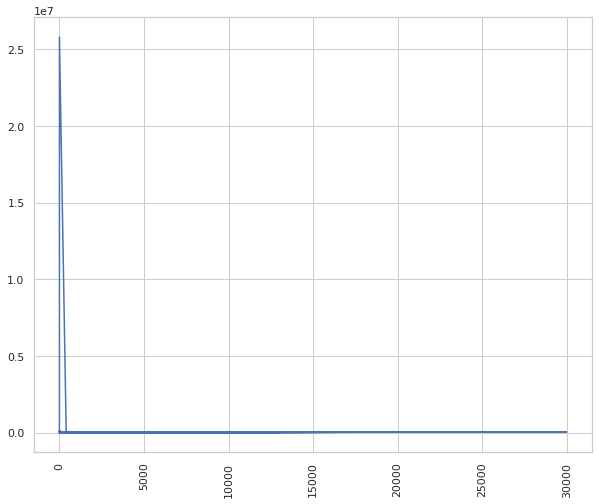

In [165]:
#Shopping expense total vs Total Expense

plt.figure(figsize=(10,8))
plt.plot(data["shopping_exp"],data["Total_Expense"])
plt.xticks(rotation=90)
plt.show()

In [166]:
#Finding correlation 

cor=data[['shop_$fash', 'shop_$jew', 'shop_$wat', 'shop_$well','shop_$food', 'shop_$gift', 'shop_$ctec', 'shop_$anti','shop_$oth', 'shop_$any','totexp_$']].corr()
cor

shop_$fash  shop_$jew  shop_$wat  shop_$well  shop_$food  \
shop_$fash    1.000000   0.001792   0.040886    0.137925    0.054094   
shop_$jew     0.001792   1.000000  -0.002062    0.014915    0.008666   
shop_$wat     0.040886  -0.002062   1.000000    0.039500    0.008134   
shop_$well    0.137925   0.014915   0.039500    1.000000    0.063791   
shop_$food    0.054094   0.008666   0.008134    0.063791    1.000000   
shop_$gift   -0.000984  -0.004475   0.019262   -0.008685    0.014677   
shop_$ctec    0.006589  -0.001894   0.015035    0.005154    0.036717   
shop_$anti    0.018766  -0.000669   0.001437   -0.000306   -0.002964   
shop_$oth     0.001406  -0.003462   0.007929    0.016898   -0.008734   
shop_$any     0.830700   0.284013   0.228377    0.312876    0.204806   
totexp_$      0.128921   0.022221   0.051945    0.113375    0.108967   

            shop_$gift  shop_$ctec  shop_$anti  shop_$oth  shop_$any  totexp_$  
shop_$fash   -0.000984    0.006589    0.018766   0.001406   0.830700  0.128921  
shop_$jew    -0.004475   -0.001894   -0.000669  -0.003462   0.284013  0.022221  
shop_$wat     0.019262    0.015035    0.001437   0.007929   0.228377  0.051945  
shop_$well   -0.008685    0.005154   -0.000306   0.016898   0.312876  0.113375  
shop_$food    0.014677    0.036717   -0.002964  -0.008734   0.204806  0.108967  
shop_$gift    1.000000   -0.017187   -0.002611   0.003067   0.075849  0.019893  
shop_$ctec   -0.017187    1.000000   -0.002628  -0.003630   0.238456  0.070954  
shop_$anti   -0.002611   -0.002628    1.000000  -0.000247   0.257907  0.006513  
shop_$oth     0.003067   -0.003630   -0.000247   1.000000   0.138851  0.039477  
shop_$any     0.075849    0.238456    0.257907   0.138851   1.000000  0.177211  
totexp_$      0.019893    0.070954    0.006513   0.039477   0.177211  1.000000

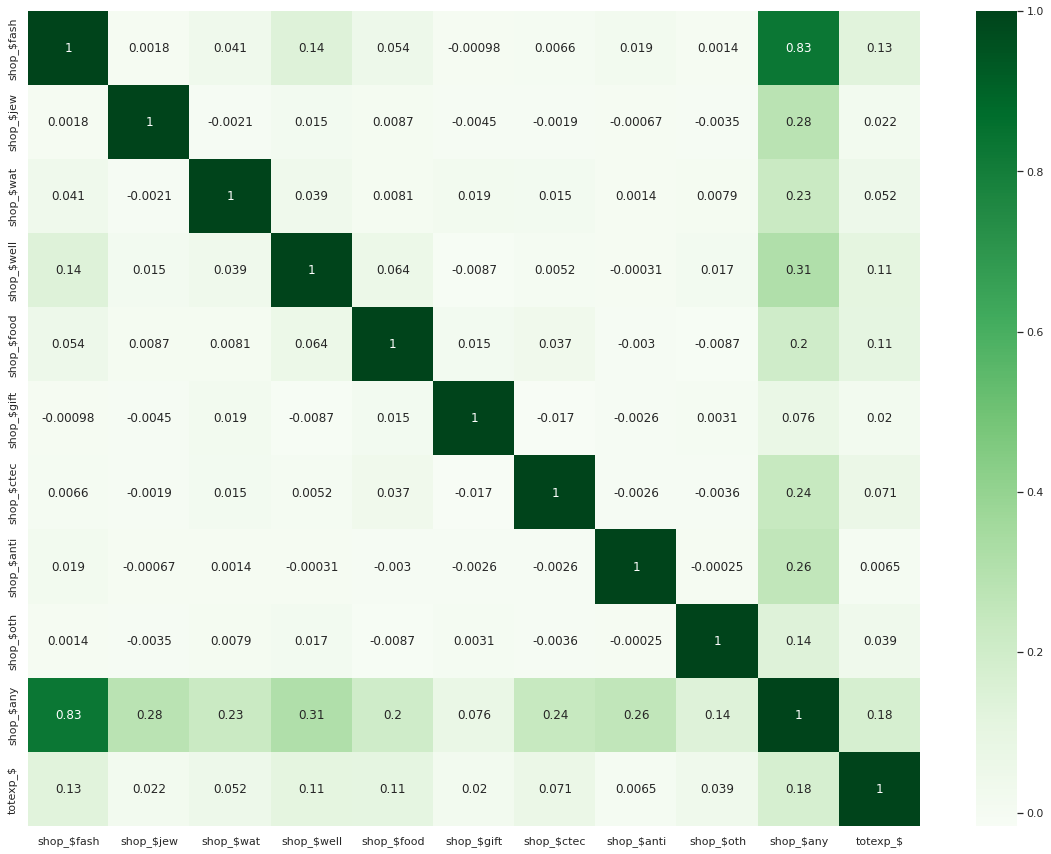

In [167]:
#plotting using heatmap

plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True,cmap='Greens')

In [168]:
cor2=data[['totacc_$',
 'totfnb_$',
 'tottran_$',
 'totbiz_$',
 'totedu_$',
 'totmedi_$',
 'tototh_$',
 'totshopping_$',
 'totexp_$']].corr()
cor2

totacc_$  totfnb_$  tottran_$  totbiz_$  totedu_$  totmedi_$  \
totacc_$       1.000000  0.340978   0.385141  0.037605  0.036412   0.026705   
totfnb_$       0.340978  1.000000   0.493278  0.035876  0.008416   0.017588   
tottran_$      0.385141  0.493278   1.000000  0.055815  0.021745   0.018071   
totbiz_$       0.037605  0.035876   0.055815  1.000000 -0.001030  -0.003787   
totedu_$       0.036412  0.008416   0.021745 -0.001030  1.000000  -0.002530   
totmedi_$      0.026705  0.017588   0.018071 -0.003787 -0.002530   1.000000   
tototh_$      -0.006456  0.011662   0.016811 -0.002931 -0.001952   0.000927   
totshopping_$  0.059241  0.111821   0.176803  0.147296 -0.000282  -0.001020   
totexp_$       0.060700  0.112889   0.177739  0.147612  0.000160   0.007184   

               tototh_$  totshopping_$  totexp_$  
totacc_$      -0.006456       0.059241  0.060700  
totfnb_$       0.011662       0.111821  0.112889  
tottran_$      0.016811       0.176803  0.177739  
totbiz_$      -0.002931       0.147296  0.147612  
totedu_$      -0.001952      -0.000282  0.000160  
totmedi_$      0.000927      -0.001020  0.007184  
tototh_$       1.000000      -0.000788 -0.000752  
totshopping_$ -0.000788       1.000000  0.999965  
totexp_$      -0.000752       0.999965  1.000000

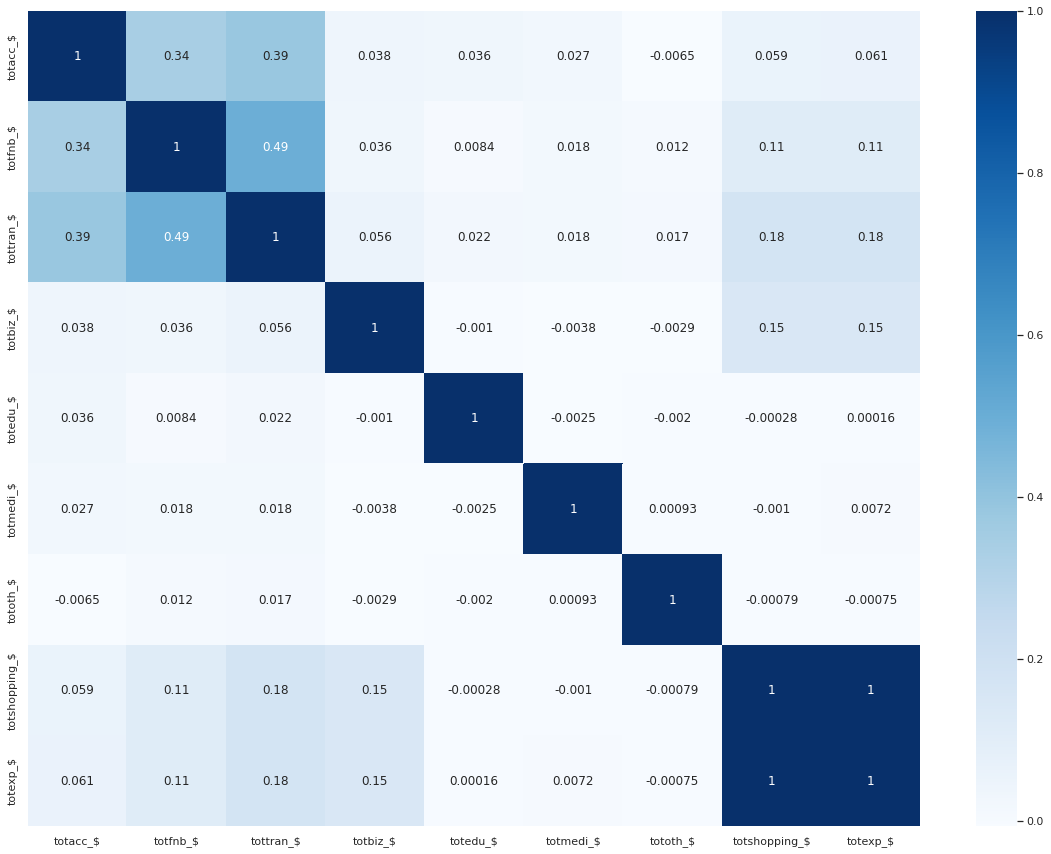

In [169]:
plt.figure(figsize=(20,15))
sns.heatmap(cor2,annot=True,cmap='Blues')

In [170]:
#It is found from the heatmap that fashion shopping and other miscellaneous shopping has highest positive correlation with the total expense

**Inferences of Univaiate and Bivariate Analysis**

-Singapore has highest number of visitors from Jakarta, mostly in the month of March, August and December.
\
-Leisure, Holiday or relaxing  were the main purpose for travel.\
-People prefered airways and stayed mostly for 2 days.\
-Most opted top 5 hotels are: Mandarin Orchard Singapore, V Hotel Lavender, York Hotel, Ibis Singapore on Bencoolen, Marina Bay Sands Singapore.
-High expenses were on accommodation and fashion.\
-Highest spends were found in the categories such as:
 People from Batam Island,

> 

*   Who came in for Business activities and Medical treatments
*   Those stayed for 2 days
*   Who travelled alone 
*   In the year 2015










# **Data Cleaning & Missing value handling**

In [171]:
#Convert the length of stay coulmn into numerical

data["length_stay"]=data["length_stay"].replace(['2 days',"1 day","3 days","4 days"], ['2',"1","3","4"])
data["length_stay"]=data["length_stay"].replace(['5 days',"6 days","7 days","Under 1 day"], ['5',"6","7","0.5"])
data["length_stay"]=data["length_stay"].replace(['15-29 days',"8-10 days","11-14 days","30-59 days","60 days & over"], ['22',"9","12","45","60"])
data["length_stay"]

0         4
1         2
2         3
3         1
4         1
       ... 
8882    0.5
8883    0.5
8884    0.5
8885      2
8886      1
Name: length_stay, Length: 8887, dtype: object

In [172]:
#converting 'length_stay' to numeric data type

data['length_stay'] = pd.to_numeric(data['length_stay'])

In [173]:
#Cleaning the occupation column 
#Extracting first name of occupation
#Use str.split() by space

occupation=data["f3_occupation"].apply(lambda x: x.split(" ")[0])
occupation.value_counts()

Businessman    1407
Homemaker      1262
Professiols    1208
Mager          1090
Student        1012
Executive       773
Other           766
Others          548
Retired         347
Blue            332
Unemployed      142
Name: f3_occupation, dtype: int64

In [174]:
#Keep all the first words even having underscore also
import re
p=re.compile(r'\w+-?\w+')
occupation=data["f3_occupation"].apply(lambda x: re.findall(p,x)[0])
data["Occupation"]=data["f3_occupation"].apply(lambda x:re.findall(p,x)[0])
data["Occupation"].astype("category").value_counts()

Businessman    1407
Homemaker      1262
Professiols    1208
Mager          1090
Student        1012
Executive       773
Other           766
Others          548
Retired         347
Blue            332
Unemployed      142
Name: Occupation, dtype: int64

In [175]:
#Check spelling and replace the miss-spelled

#Professionals

data.loc[data["Occupation"] == "Professiols", "Occupation"] ="Professionals"

#Manager
data.loc[data["Occupation"]== "Mager", "Occupation"]="Manager"

#Other_whitecollar
data.loc[data["Occupation"]=="Other", "Occupation"]="Other_whitecollar"

#Blue_collar
data.loc[data["Occupation"]=="Blue", "Occupation"]="Blue_collar"

data["Occupation"].value_counts()         

Businessman          1407
Homemaker            1262
Professionals        1208
Manager              1090
Student              1012
Executive             773
Other_whitecollar     766
Others                548
Retired               347
Blue_collar           332
Unemployed            142
Name: Occupation, dtype: int64

In [176]:
#Cleaning MainAccomm column

data['MainAccomm'].unique()

array(['Hotel', 'Accommodation not required - Others',
       'Hostel (Rental by bed)', 'Stayed with relatives/ friends',
       'Accommodation not required - Day Tripper',
       'Accommodation not required - On-board Cruise',
       'Service Apartment',
       'Other non-paid accommodations (e.g. religious places, camp,',
       'Own Residence', 'Homestay', 'Hospital', 'Student Hostel',
       'Other paid accommodations (e.g.chalets, country clubs, etc)', nan],
      dtype=object)

In [177]:
#replacing values which are repeating and has less counts
data.loc[(data['MainAccomm']=='Accommodation not required - Day Tripper')|(data['MainAccomm']=='Accommodation not required - Others'),'MainAccomm']='Accomodation not required'
data.loc[(data['MainAccomm']=='Hostel (Rental by bed)'),'MainAccomm']='Hostel'
data.loc[(data['MainAccomm']=='Accommodation not required - On-board Cruise')|(data['MainAccomm']=='Other non-paid accommodations (e.g. religious places, camp,')|(data['MainAccomm']=='Homestay')|(data['MainAccomm']=='Hospital')|(data['MainAccomm']=='Student Hostel')|(data['MainAccomm']=='Other paid accommodations (e.g.chalets, country clubs, etc)'),'MainAccomm']='Others'

#Checking the unique values
data['MainAccomm'].unique()

array(['Hotel', 'Accomodation not required', 'Hostel',
       'Stayed with relatives/ friends', 'Others', 'Service Apartment',
       'Own Residence', nan], dtype=object)

In [178]:
data['MainAccomm']=data['MainAccomm'].fillna('Others')
data['MainAccomm'].isna().sum()

0

In [179]:
#Replacing missing values in  MainHotel columns as Not specified

data['MainHotel'].isna().sum()

4590

In [180]:
data['MainHotel']=data['MainHotel'].fillna('Not Specified')
data['MainHotel'].isna().sum()

0

In [181]:
#Selecting Top 9 Hotels
#checking top 10 expensive hotels

data1_group=data.groupby("MainHotel")["Total_Expense"].sum().reset_index()
data1_group = data1_group.sort_values("Total_Expense", ascending=False)
top_10 = data1_group.head(9)
top_10.round(2)

MainHotel  Total_Expense
168   Marina Bay Sands Singapore    26107347.26
183                Not Specified     3415397.76
166   Mandarin Orchard Singapore      732989.77
290                   York Hotel      387897.07
272             V Hotel Lavender      227355.90
146  Ibis Singapore on Bencoolen      205616.41
251                The Elizabeth      164221.63
84            Grand Park Orchard      117167.40
221                  Royal Plaza      109875.04

In [182]:
#checking top 10 popular hotels having maximum number of guest visited

Popular_10= data["MainHotel"].value_counts().sort_values(ascending=False).head(10)
Popular_10

Not Specified                  4590
Mandarin Orchard Singapore      358
V Hotel Lavender                200
York Hotel                      175
Ibis Singapore on Bencoolen     166
Marina Bay Sands Singapore      146
The Elizabeth                    86
Other Hotels                     72
Royal Plaza                      66
Concorde Hotel Singapore         64
Name: MainHotel, dtype: int64

Top 10 Polpular hotels and top 10 Expensive hotesls 
list is almost the same. Hence replacing the MainHotel column with only these popular 10 hotels and labelling rest of the hotesl as Others.

Hotels names are: Mandarin Orchard Singapore, V Hotel Lavender, York Hotel , Ibis Singapore on Bencoolen , Marina Bay Sands Singapore, The Elizabeth ,Royal Plaza,Grand Park Orchar, Not Specified and Others

In [183]:
#Finding the index of columns with are not in top 10 popular hotels list and marking the values on these indices as Other Hotels

l=Popular_10.index.tolist()
l_index = data[~data["MainHotel"].isin(l)].index
for i in l_index:
    data.loc[i, "MainHotel"] = "Other Hotels"

In [184]:
data["MainHotel"].nunique()

10

In [185]:
data["MainHotel"].value_counts()

Not Specified                  4590
Other Hotels                   3036
Mandarin Orchard Singapore      358
V Hotel Lavender                200
York Hotel                      175
Ibis Singapore on Bencoolen     166
Marina Bay Sands Singapore      146
The Elizabeth                    86
Royal Plaza                      66
Concorde Hotel Singapore         64
Name: MainHotel, dtype: int64

In [186]:
#Selecting Top 9 City_residence
#checking top 10 cities vs total expense

data1_group2=data.groupby("City_residence")["Total_Expense"].sum().reset_index()
data1_group2 = data1_group2.sort_values("Total_Expense", ascending=False)
top_10 = data1_group2.head(9)
top_10.round(2)

City_residence  Total_Expense
6            Batam    26832838.44
16         Jakarta     5072655.92
51        Surabaya     1024498.99
3          Bandung      608148.89
58      Yogyakarta      554776.29
34           Medan      303779.24
1             Bali      232726.11
55  Tanjung Pinang      201831.07
45        Semarang      150587.11

In [187]:
#checking top 9 popular cities  from where maximum number of guest visited Singapore

Popular_10= data["City_residence"].value_counts().sort_values(ascending=False).head(9)
Popular_10

Jakarta           3867
Batam             1928
Surabaya           746
Bandung            563
Medan              277
Yogyakarta         272
Tanjung Pinang     211
Bali               189
Tanjung Balai      100
Name: City_residence, dtype: int64

In [188]:
#Finding the index of columns with are not in top 10 popular cities list and marking the values on these indices as Other cities

l=Popular_10.index.tolist()
l_index = data[~data["City_residence"].isin(l)].index
for i in l_index:
    data.loc[i, "City_residence"] = "Other cities"

In [189]:
data["City_residence"].nunique()

10

In [190]:
data["City_residence"].value_counts()

Jakarta           3867
Batam             1928
Surabaya           746
Other cities       734
Bandung            563
Medan              277
Yogyakarta         272
Tanjung Pinang     211
Bali               189
Tanjung Balai      100
Name: City_residence, dtype: int64

In [191]:
data.isna().sum()

case                     0
Year                     0
R.mth                    0
date                     0
intv_nam                 0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Weights_QTR              0
Air_Terminal          3190
Sea_Terminal          6059
Land_Terminal         8532
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
shop_$fash              80
shop_$jew               80
shop_$wat               80
shop_$well              80
shop_$food              80
shop_$gift              80
shop_$ctec              80
shop_$anti              80
shop_$oth               80
shop_$any               80
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
t

In [192]:
#Air_Terminal          35.895128
#Sea_Terminal          68.178238
#Land_Terminal         96.005401
#Now combined to new column Travel Path were no missing values.


#f4_industry           32.001800
#f5_designation        34.837403
#f5_designation.oth    33.408349
#These columns are dropped


#shop_$fash             0.900191
#shop_$jew              0.900191
#shop_$wat              0.900191
#shop_$well             0.900191
#shop_$food             0.900191
#shop_$gift             0.900191
#shop_$ctec             0.900191
#shop_$anti             0.900191
#shop_$oth              0.900191
#shop_$any              0.900191
#These columns are summed up to new column named shopping_exp where no more missing values

#MainAccomm             0.371329
#Filled null values as Others

#MainHotel             51.648475
#filled null values as Not specified


#travel_companion.1     0.000000
#travel_companion.2    81.636098
#travel_companion.3    94.486328
#travel_companion.4    98.942275
#travel_companion.5    99.808709
#These columns are now summed up to new column named companion_number so no more missing values

#**Outlier Detection**

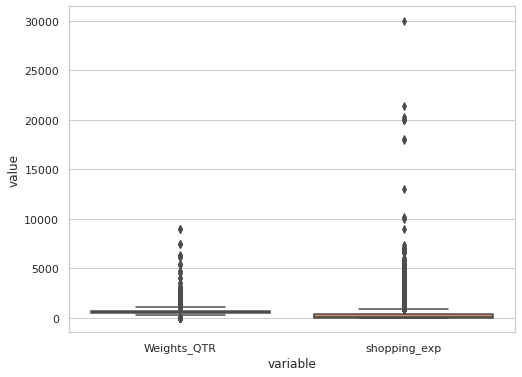

In [193]:
#we have 2 features with outliers to be handled
df = pd.DataFrame(data = data, columns = ['Weights_QTR','shopping_exp'])
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

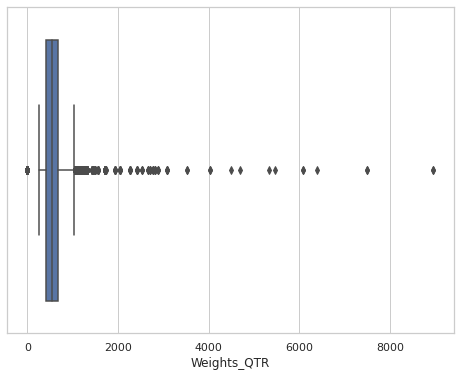

In [194]:
# Plotting outliers in Weights_QTR
plt.figure(figsize=(8,6))
sns.boxplot(data['Weights_QTR'])

In [195]:
#Handling outliers using Quantile method
IQR=data['Weights_QTR'].quantile(0.75)-data['Weights_QTR'].quantile(0.25)
low_limit=data['Weights_QTR'].quantile(0.25)-(IQR*1.5)
up_limit=data['Weights_QTR'].quantile(0.75)+(IQR*1.5)

In [196]:
#replace the outliers with upper limit and lower limit values
data['Weights_QTR']=pd.DataFrame(np.where(data['Weights_QTR']<low_limit,low_limit,np.where(data['Weights_QTR']>up_limit,up_limit,data['Weights_QTR'])))

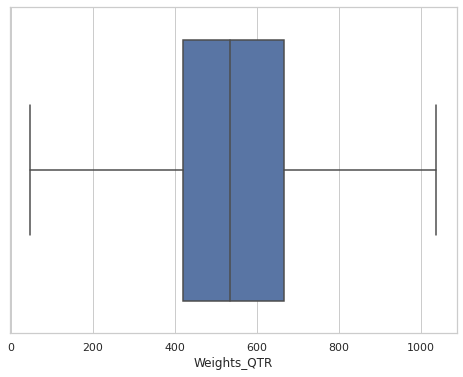

In [197]:
#After outliers
plt.figure(figsize=(8,6))
sns.boxplot(data['Weights_QTR'])

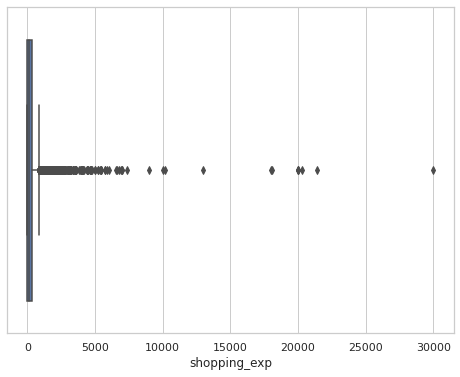

In [198]:
#Plotting outliers in  shopping_exp
plt.figure(figsize=(8,6))
sns.boxplot(data['shopping_exp'])

In [199]:
#Handling outliers using Quantile method
IQR=data['shopping_exp'].quantile(0.75)-data['shopping_exp'].quantile(0.25)
low_limit=data['shopping_exp'].quantile(0.25)-(IQR*1.5)
up_limit=data['shopping_exp'].quantile(0.75)+(IQR*1.5)

In [200]:
#replace the outliers with  upper limit and lower limit values
data['shopping_exp']=pd.DataFrame(np.where(data['shopping_exp']<low_limit,low_limit,np.where(data['shopping_exp']>up_limit,up_limit,data['shopping_exp'])))

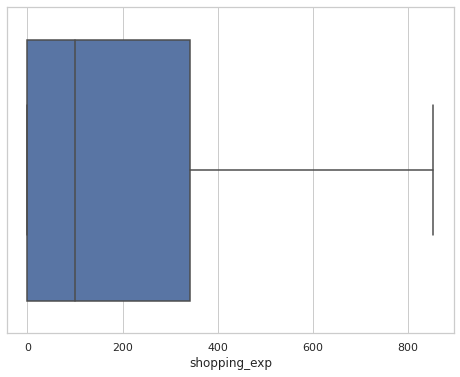

In [201]:
#After outliers
plt.figure(figsize=(8,6))
sns.boxplot(data['shopping_exp'])

# **Feature Engineering**

Air_Treminal,Sea_Terminal and Land_Terminal are now combined in a new columns Travel_path.

Columns named travel_companion.1,2,3,4,5 are now summed to  a new column named companion_number

Combined all shopping columns to a single column named shopping_exp

We already have a column called 'totexp_$' which is the sum of columns ['totacc_$','totfnb_$', 'tottran_$','totbiz_$', 'totedu_$', 'totmedi_$','tototh_$', 'totshopping_$'] 

So finally we have 2 relavant columns on spendings ie; 'shopping_exp' and 'totexp_$'. Others we can drop.

We combined totexp_$ column and shopping_exp and made target column Total_Expense.

In [202]:
#Converting date variable to datetime object
data['date'] = pd.to_datetime(data['date'])


#Extracting datetime features from the date variable
data['year'] = data['date'].apply(lambda x:x.year)
data['month'] = data['date'].apply(lambda x:x.month)
data['day'] = data['date'].apply(lambda x:x.day)

In [203]:
#Checking the changes after feature engineering
data.head(2)

case  Year    R.mth       date     intv_nam Country_residence  \
0    18  2015  January 2015-01-01    Cindy Liu         Indonesia   
1    41  2015  January 2015-01-01  Philip Chew         Indonesia   

  City_residence Purpose_grp                Purpose  Weights_QTR  ...  \
0     Yogyakarta     Leisure  Holiday/ Rest & Relax   632.145161  ...   
1          Batam     Leisure  Holiday/ Rest & Relax   341.937500  ...   

  travel_companion.4 travel_companion.5 Travel Path companion_number  \
0                NaN                NaN         Air                2   
1                NaN                NaN         Sea                3   

  shopping_exp  Total_Expense     Occupation  year month day  
0   853.893750    2596.186995    Businessman  2015     1   1  
1   133.333333     512.643259  Professionals  2015     1   1  

[2 rows x 56 columns]

In [204]:
#Cheking all columns after feature engineering
data.columns

Index(['case', 'Year', 'R.mth', 'date', 'intv_nam', 'Country_residence',
       'City_residence', 'Purpose_grp', 'Purpose', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'langint', '1st_visit',
       'length_stay', 'travel_type', 'f1_gender', 'f3_occupation',
       'f4_industry', 'f5_designation', 'f5_designation.oth', 'shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$',
       'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
       'tototh_$', 'totshopping_$', 'totexp_$', 'MainAccomm', 'MainHotel',
       'travel_companion.1', 'travel_companion.2', 'travel_companion.3',
       'travel_companion.4', 'travel_companion.5', 'Travel Path',
       'companion_number', 'shopping_exp', 'Total_Expense', 'Occupation',
       'year', 'month', 'day'],
      dtype='object')

In [205]:
#dropping all unnecessary features and storing it to new variable data1

data1=data.drop(['Occupation','year','case','Year', 'R.mth', 'date','day','intv_nam','Country_residence','Air_Terminal', 'Sea_Terminal', 'Land_Terminal','travel_companion.1', 'travel_companion.2', 'travel_companion.3',
       'travel_companion.4', 'travel_companion.5', 'shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$',
       'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
       'tototh_$', 'totshopping_$', 'totexp_$','f3_occupation','f4_industry', 'f5_designation', 'f5_designation.oth','langint','Purpose'],axis=1)

In [206]:
#Checking the final data
data1.head(2)

City_residence Purpose_grp  Weights_QTR 1st_visit  length_stay  \
0     Yogyakarta     Leisure   632.145161        No          4.0   
1          Batam     Leisure   341.937500        No          2.0   

    travel_type f1_gender MainAccomm         MainHotel Travel Path  \
0  Non-Packaged      Male      Hotel  V Hotel Lavender         Air   
1      Packaged      Male      Hotel      Other Hotels         Sea   

   companion_number  shopping_exp  Total_Expense  month  
0                 2    853.893750    2596.186995      1  
1                 3    133.333333     512.643259      1

In [207]:
#final data columns
data1.columns

Index(['City_residence', 'Purpose_grp', 'Weights_QTR', '1st_visit',
       'length_stay', 'travel_type', 'f1_gender', 'MainAccomm', 'MainHotel',
       'Travel Path', 'companion_number', 'shopping_exp', 'Total_Expense',
       'month'],
      dtype='object')

In [208]:
#Cheking for any missing values in final data
data1.isna().sum()

City_residence      0
Purpose_grp         0
Weights_QTR         0
1st_visit           0
length_stay         0
travel_type         0
f1_gender           0
MainAccomm          0
MainHotel           0
Travel Path         0
companion_number    0
shopping_exp        0
Total_Expense       0
month               0
dtype: int64

In [209]:
#Checking the datatypes of our final features
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City_residence    8887 non-null   object 
 1   Purpose_grp       8887 non-null   object 
 2   Weights_QTR       8887 non-null   float64
 3   1st_visit         8887 non-null   object 
 4   length_stay       8887 non-null   float64
 5   travel_type       8887 non-null   object 
 6   f1_gender         8887 non-null   object 
 7   MainAccomm        8887 non-null   object 
 8   MainHotel         8887 non-null   object 
 9   Travel Path       8887 non-null   object 
 10  companion_number  8887 non-null   int64  
 11  shopping_exp      8887 non-null   float64
 12  Total_Expense     8887 non-null   float64
 13  month             8887 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 972.1+ KB


There are few features which are categorical and we need to encode it before model building

#Correlation

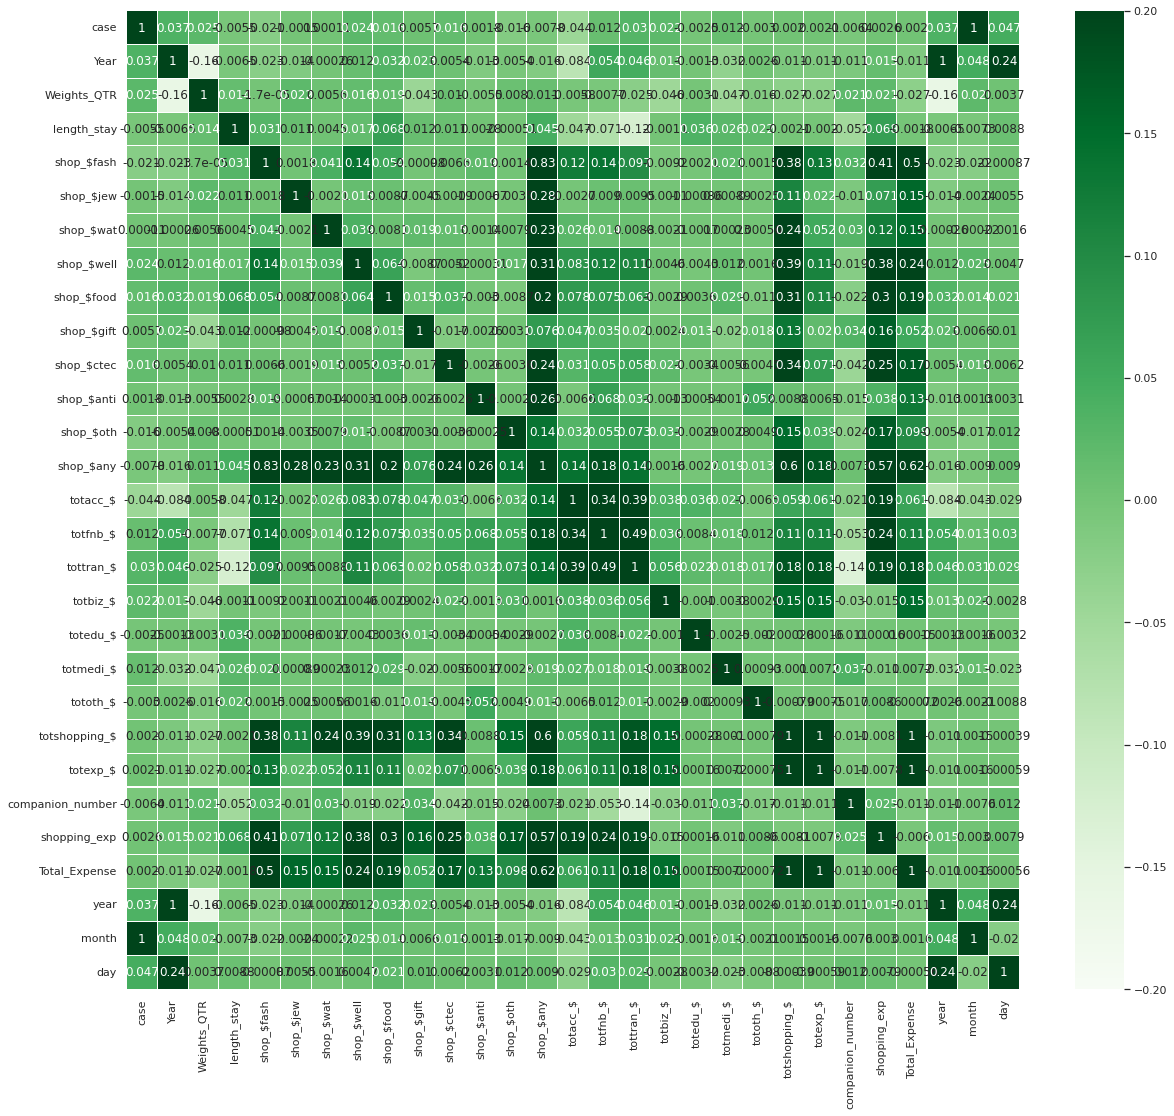

In [210]:
 #Taking the whole data and checking correlation
corrmatrix = data.corr()   #Taking the whole data
plt.subplots(figsize=(20,18))
sns.heatmap(corrmatrix, vmin=-0.2, vmax=0.2, linewidth=0.1, annot=True, cmap='Greens')

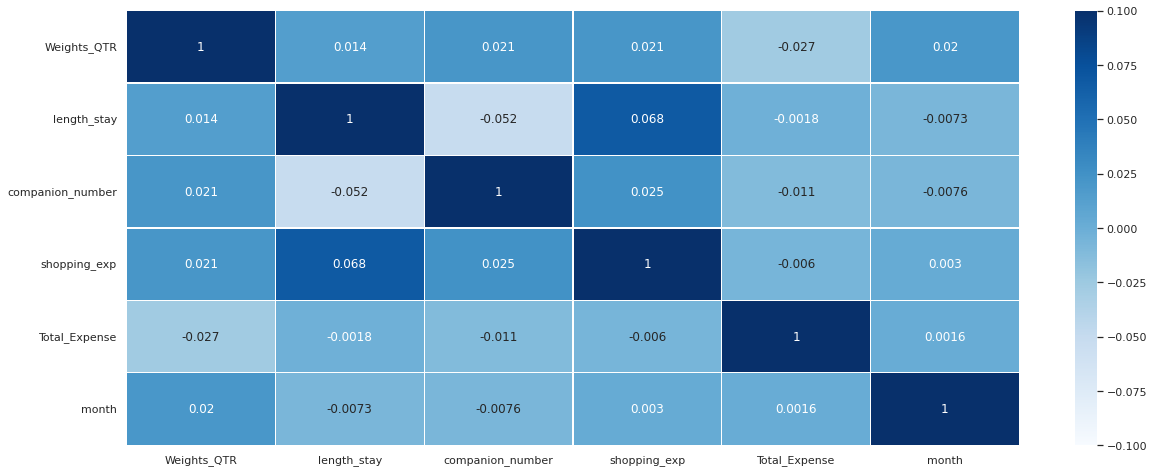

In [211]:
#taking our final features
corrmatrix = data1.corr()  
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.1, vmax=0.1, linewidth=0.1, annot=True, cmap='Blues')

In [212]:
#checking zeros in dataset
(data1 == 0).sum()

City_residence         0
Purpose_grp            0
Weights_QTR            0
1st_visit              0
length_stay            0
travel_type            0
f1_gender              0
MainAccomm             0
MainHotel              0
Travel Path            0
companion_number    2883
shopping_exp        2277
Total_Expense          0
month                  0
dtype: int64

#Log Transform

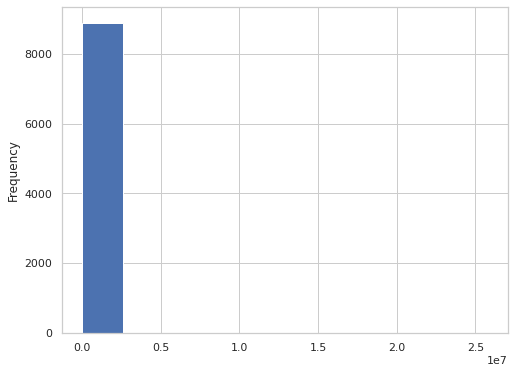

In [213]:
#Plotting target column to see the data
plt.figure(figsize=(8,6))
data1['Total_Expense'].plot.hist()

In [214]:
# log transformation of target column

data1['Total_Expense'] = np.log(data1['Total_Expense'])

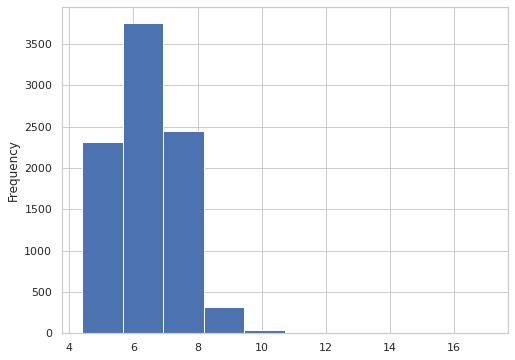

In [215]:
#Plotting after log transformation
plt.figure(figsize=(8,6))
data1['Total_Expense'].plot.hist()

In [216]:
data1['Total_Expense']

0       7.861799
1       6.239580
2       6.041986
3       6.415081
4       5.835852
          ...   
8882    5.532935
8883    4.613772
8884    7.481412
8885    7.350704
8886    5.356064
Name: Total_Expense, Length: 8887, dtype: float64

#Scaling

In [217]:
#Scaling continous numerical features
X1 = data1[['Weights_QTR','shopping_exp']]

In [218]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1.loc[:,:] = sc.fit_transform(X1)

In [219]:
type(X1)

pandas.core.frame.DataFrame

In [220]:
X1.describe()

Weights_QTR  shopping_exp
count  8.887000e+03  8.887000e+03
mean   4.029634e-16  9.434460e-17
std    1.000056e+00  1.000056e+00
min   -2.528575e+00 -8.332296e-01
25%   -7.202607e-01 -8.332296e-01
50%   -1.558635e-01 -4.696149e-01
75%    4.852819e-01  4.087236e-01
max    2.293596e+00  2.271653e+00

In [221]:
#dropping unscaled features from final data
data1=data1.drop(['Weights_QTR','shopping_exp'], axis =1)

In [222]:
#combining scaled features to other final features in data1
data1 = pd.concat([data1,X1], axis=1)

In [223]:

data1.head(2)

City_residence Purpose_grp 1st_visit  length_stay   travel_type f1_gender  \
0     Yogyakarta     Leisure        No          4.0  Non-Packaged      Male   
1          Batam     Leisure        No          2.0      Packaged      Male   

  MainAccomm         MainHotel Travel Path  companion_number  Total_Expense  \
0      Hotel  V Hotel Lavender         Air                 2       7.861799   
1      Hotel      Other Hotels         Sea                 3       6.239580   

   month  Weights_QTR  shopping_exp  
0      1     0.318208      2.271653  
1      1    -1.096316     -0.348410

In [224]:
#statistical summary
data1.describe()

length_stay  companion_number  Total_Expense        month  \
count  8887.000000       8887.000000    8887.000000  8887.000000   
mean      2.852537          0.926859       6.393390     6.499944   
std       4.174137          0.857010       1.062640     3.456780   
min       0.500000          0.000000       4.392768     1.000000   
25%       1.000000          0.000000       5.614777     3.000000   
50%       2.000000          1.000000       6.406708     6.000000   
75%       3.000000          1.000000       7.116934    10.000000   
max      60.000000          5.000000      17.065701    12.000000   

        Weights_QTR  shopping_exp  
count  8.887000e+03  8.887000e+03  
mean   4.029634e-16  9.434460e-17  
std    1.000056e+00  1.000056e+00  
min   -2.528575e+00 -8.332296e-01  
25%   -7.202607e-01 -8.332296e-01  
50%   -1.558635e-01 -4.696149e-01  
75%    4.852819e-01  4.087236e-01  
max    2.293596e+00  2.271653e+00

# **Encoding**

In [225]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [226]:

data1['City_residence']=le.fit_transform(data1['City_residence'])
data1['Purpose_grp']=le.fit_transform(data1['Purpose_grp'])
data1['MainAccomm']=le.fit_transform(data1['MainAccomm'])
data1['MainHotel']=le.fit_transform(data1['MainHotel'])
data1['1st_visit']=le.fit_transform(data1['1st_visit'])
data1['f1_gender']=le.fit_transform(data1['f1_gender'])
data1['travel_type']=le.fit_transform(data1['travel_type'])
data1['Travel Path']=le.fit_transform(data1['Travel Path'])

In [227]:
#Now all features are numerical for model building
data1.head(2)

City_residence  Purpose_grp  1st_visit  length_stay  travel_type  \
0               9            3          0          4.0            1   
1               2            3          0          2.0            2   

   f1_gender  MainAccomm  MainHotel  Travel Path  companion_number  \
0          1           2          8            0                 2   
1          1           2          5            3                 3   

   Total_Expense  month  Weights_QTR  shopping_exp  
0       7.861799      1     0.318208      2.271653  
1       6.239580      1    -1.096316     -0.348410

In [228]:
data1.columns

Index(['City_residence', 'Purpose_grp', '1st_visit', 'length_stay',
       'travel_type', 'f1_gender', 'MainAccomm', 'MainHotel', 'Travel Path',
       'companion_number', 'Total_Expense', 'month', 'Weights_QTR',
       'shopping_exp'],
      dtype='object')

# Model Building 

In [229]:
#Splitting dataset into X and Y variables
#X has independent features
X=data1.drop(['Total_Expense'],axis=1)
#Y has dependent feature(target)
Y=data1['Total_Expense']

In [230]:
#Splitting into train and test set for model building and predicting
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.2, 
                                                    random_state=42)

## Feature Selection

In [231]:
from numpy import array
features = array(data1[['City_residence', 'Purpose_grp', '1st_visit', 'length_stay',
       'travel_type', 'f1_gender', 'MainAccomm', 'MainHotel', 'Travel Path',
       'companion_number','month', 'Weights_QTR',
       'shopping_exp']])

## Recursive Feature Elimination 

In [232]:
#using RFE we are selecting important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


print("Feature data dimension: ", X.shape)
lr=LinearRegression()

selector = RFE(lr, n_features_to_select=13, step=1)
selector = selector.fit(X, Y)
 
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)


  

Feature data dimension:  (8887, 13)
Mask data:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1]


In [233]:
#Looks like all features are important

In [234]:
# from sklearn.linear_model import LinearRegression,Lasso,Ridge
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
# from datetime import datetime
# import warnings
# warnings.filterwarnings('ignore')

# Regression Models

In [235]:
#Before tuning


models = [('Linear Regresion', LinearRegression()),
          ('Lasso Regresion', Lasso()),
          ('Ridge Regresion', Ridge()),
          ('Knearest neighbors',KNeighborsRegressor()),
           ('Decision Tree', DecisionTreeRegressor()),
           ('Random Forest', RandomForestRegressor()),
          ('Xgbooster', XGBRegressor()),
          ('Gradient Boosting', GradientBoostingRegressor()),
           ('Gradient Boosting', GradientBoostingRegressor()),
          ('Bagging Regressor',BaggingRegressor()),
          ('Support Vector Machine Regressor',SVR()) 
          ]



for model in models:              #for looping through all the models
    reg = model[1]                #initialize the model object
    reg.fit(X_train,Y_train)      #fitting the training data
    pred = reg.predict(X_test)    #predict target
    print(model[0])
    print('R2: ',r2_score(Y_test, pred))                        #check r2 score
    print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))  #check root mean squared error
    print('-'*30)

Linear Regresion
R2:  0.6447228919928967
RMSE:  0.6381810212456466
------------------------------
Lasso Regresion
R2:  -6.903991357654071e-05
RMSE:  1.0707183938164038
------------------------------
Ridge Regresion
R2:  0.6447144049668401
RMSE:  0.6381886437837836
------------------------------
Knearest neighbors
R2:  0.6272839564755774
RMSE:  0.6536560960674668
------------------------------
Decision Tree
R2:  0.6848230901723726
RMSE:  0.601087184563084
------------------------------
Random Forest
R2:  0.8358708912005333
RMSE:  0.43376357319761005
------------------------------
[08:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgbooster
R2:  0.8322843021962126
RMSE:  0.43847731419627733
------------------------------
Gradient Boosting
R2:  0.8387027728678342
RMSE:  0.4300052152581474
------------------------------
Gradient Boosting
R2:  0.8386592004122609
RMSE:  0.4300632916376718
----------------------------

# Hyperparameter Tuning Of Models

## Linear Regression

In [236]:
#Creating an instance of model
lr = LinearRegression() 

lr.fit(X_train, Y_train)
start = datetime.now()
pred = lr.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
# regression coefficients
print('Coefficients: ', lr.coef_)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

lr = ('Linear Regression', r2, err, seconds)

R2:  0.6447228919928967
Coefficients:  [ 0.01197286 -0.26729646 -0.18494111 -0.01435347  0.38381848  0.00749141
  0.00323494  0.06042243 -0.16110942  0.02051003 -0.0045027  -0.05565369
  0.70688281]
Root Mean Squared Error:  0.6381810212456466
Time to compute:  0.006745 seconds


In [237]:
#Result
# R2:  0.6447228919928967
# Coefficients:  [ 0.01197286 -0.26729646 -0.18494111 -0.01435347  0.38381848  0.00749141
#   0.00323494  0.06042243 -0.16110942  0.02051003 -0.0045027  -0.05565369
#   0.70688281]
# Root Mean Squared Error:  0.6381810212456466
# Time to compute:  0.006745 seconds

## Lasso Regression

In [238]:
#creating an instance of model
lasso = Lasso()

# set up our search grid
params = {'alpha': np.arange(1e-15, 100)}
gs = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=KFold(n_splits=5), n_jobs=-1)
gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

lasso=gs.best_estimator_
gs.fit(X_train,Y_train)
start = datetime.now()
pred = gs.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
# regression coefficients
print('Coefficients: ', lasso.coef_)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

lasso = ('Lasso Regression', r2, err, seconds)

R2:  0.6447228919928965
Coefficients:  [ 0.01197286 -0.26729646 -0.18494111 -0.01435347  0.38381848  0.00749141
  0.00323494  0.06042243 -0.16110942  0.02051003 -0.0045027  -0.05565369
  0.70688281]
Root Mean Squared Error:  0.6381810212456468
Time to compute:  0.005545 seconds


In [239]:
#Result
# R2:  0.6447228919928965
# Coefficients:  [ 0.01197286 -0.26729646 -0.18494111 -0.01435347  0.38381848  0.00749141
#   0.00323494  0.06042243 -0.16110942  0.02051003 -0.0045027  -0.05565369
#   0.70688281]
# Root Mean Squared Error:  0.6381810212456468
# Time to compute:  0.005545 seconds

## Ridge Regression Model

In [240]:
#Creating an instance of model
ridge = Ridge()

# set up our search grid
params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
gs = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=KFold(n_splits=5),n_jobs=-1)
gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

ridge=gs.best_estimator_
gs.fit(X_train,Y_train)
start = datetime.now()
pred = gs.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
# regression coefficients
print('Coefficients: ', ridge.coef_)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

ridge = ('Ridge Regression', r2, err, seconds)

{'alpha': 200}
Ridge(alpha=200)
R2:  0.6420329848773012
Coefficients:  [ 0.01231844 -0.23251919 -0.14772269 -0.01387518  0.27512601  0.00165671
  0.00326049  0.06173674 -0.16072149  0.0246205  -0.00459747 -0.05016047
  0.68882579]
Root Mean Squared Error:  0.6405923933318959
Time to compute:  0.001866 seconds


In [241]:
#Result
# {'alpha': 200}
# Ridge(alpha=200)
# R2:  0.6420329848773012
# Coefficients:  [ 0.01231844 -0.23251919 -0.14772269 -0.01387518  0.27512601  0.00165671
#   0.00326049  0.06173674 -0.16072149  0.0246205  -0.00459747 -0.05016047
#   0.68882579]
# Root Mean Squared Error:  0.6405923933318959
# Time to compute:  0.001866 seconds

## K-nearest Neighbours Regression Model

In [242]:
# calculating the r2 of models with different values of k
mean_r2 = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_r2[i-1] = r2_score(Y_test, yhat)

mean_r2

array([0.44063326, 0.56670461, 0.60644586, 0.62278396, 0.62728396,
       0.62927802, 0.6321328 , 0.63605826, 0.63458214, 0.63318877,
       0.63496012, 0.63246159, 0.62879654, 0.62980041, 0.62704122,
       0.62731048, 0.62405244, 0.62050456, 0.61812742, 0.61643067])

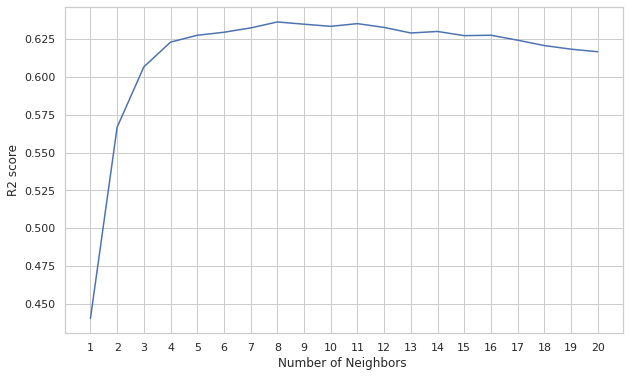

In [243]:
#plotting to find optimal K value for knn
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_r2)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('R2 score')
plt.show()

In [244]:
#With k=8 let us set up our search grid
params = { 'n_neighbors' : [8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn = KNeighborsRegressor()
# try out every combination of the above values
gs = GridSearchCV(estimator=knn, param_grid=params, cv=KFold(n_splits=5), n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

knn = gs.best_estimator_
knn.fit(X_train, Y_train)
start = datetime.now()
pred = knn.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

knn_reg = ('KNN', r2, err, seconds)

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')
------------------------------
R2:  0.6652267776529922
Root Mean Squared Error:  0.6194918945907171
Time to compute:  0.10171 seconds


In [245]:
#Result
# {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
# KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')
# ------------------------------
# R2:  0.6652267776529922
# Root Mean Squared Error:  0.6194918945907171
# Time to compute:  0.10171 seconds

## Decision Tree Regression Model

In [246]:


#set up the search grid

params = {'max_depth': [3,5], # The maximum depth of the tree
          'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [3,5,7], # The minimum number of samples required to be at a leaf node
          
         }

tree = DecisionTreeRegressor()
# try out every combination of the above values
gs = GridSearchCV(estimator=tree, param_grid=params, cv=KFold(n_splits=5), n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

tree = gs.best_estimator_
tree.fit(X_train, Y_train)
start = datetime.now()
pred = tree.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

decision_tree = ('Decision Tree', r2, err, seconds)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 7}
DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=7)
------------------------------
R2:  0.7539057960351488
Root Mean Squared Error:  0.531142391631218
Time to compute:  0.001285 seconds


In [247]:
#Result
# {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 7}
# DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=7)
# ------------------------------
# R2:  0.7539057960351488
# Root Mean Squared Error:  0.531142391631218
# Time to compute:  0.001285 seconds

## Random Forest Regression Model

In [248]:
#Set up the search grid
params = { 'n_estimators' : [10,20,30,40,50],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}


rf=RandomForestRegressor()
#try out every combination of the above values
gs = GridSearchCV(estimator=rf, param_grid=params, cv=KFold(n_splits=5), n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

rf = gs.best_estimator_
rf.fit(X_train, Y_train)
start = datetime.now()
pred = rf.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

random_forest = ('Random Forest', r2, err, seconds) 

{'max_depth': 9, 'n_estimators': 40}
RandomForestRegressor(max_depth=9, n_estimators=40)
------------------------------
R2:  0.8355016619970171
Root Mean Squared Error:  0.434251202134877
Time to compute:  0.013129 seconds


In [249]:
#Result
# {'max_depth': 9, 'n_estimators': 40}
# RandomForestRegressor(max_depth=9, n_estimators=40)
# ------------------------------
# R2:  0.8355016619970171
# Root Mean Squared Error:  0.434251202134877
# Time to compute:  0.013129 seconds

## XGBoost Regression Model

In [250]:
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

#creating model instance
xgb = XGBRegressor()
# try out every combination of the above values
gs = GridSearchCV(xgb, param_grid, cv=KFold(n_splits=5), n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

xgb = gs.best_estimator_
xgb.fit(X_train, Y_train)
start = datetime.now()
pred = xgb.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

XGB = ('XGBoost regressor', r2, err, seconds)

[08:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}
XGBRegressor(learning_rate=0.015, max_depth=4, n_estimators=700)
[08:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
------------------------------
R2:  0.844999105593523
Root Mean Squared Error:  0.4215289185035186
Time to compute:  0.043413 seconds


In [251]:
#Result
# [08:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
# {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}
# XGBRegressor(learning_rate=0.015, max_depth=4, n_estimators=700)
# [08:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
# ------------------------------
# R2:  0.844999105593523
# Root Mean Squared Error:  0.4215289185035186
# Time to compute:  0.043413 seconds

## Gradient Boosting Regression Model

In [252]:
# set up our search grid
params={'n_estimators':[100,300,500],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1]}

#creating model instance
gbr=GradientBoostingRegressor()
# try out every combination of the above values
gs=GridSearchCV(estimator=gbr,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,cv=KFold(n_splits=5))

gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

gbr = gs.best_estimator_
gbr.fit(X_train, Y_train)
start = datetime.now()
pred = gbr.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

GBR = ('Gradient Boost', r2, err, seconds)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.75}
GradientBoostingRegressor(max_depth=4, subsample=0.75)
------------------------------
R2:  0.8317012356782825
Root Mean Squared Error:  0.4392388398813526
Time to compute:  0.005499 seconds


In [253]:
#Result
# {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.75}
# GradientBoostingRegressor(max_depth=4, subsample=0.75)
# ------------------------------
# R2:  0.8317012356782825
# Root Mean Squared Error:  0.4392388398813526
# Time to compute:  0.005499 seconds

## Bagging Regression Model

In [254]:
#creating a model instance
bg=BaggingRegressor()
#fixing base estimator
tree=DecisionTreeRegressor(max_depth=16)
# set up our search grid
params = { 
    'base_estimator':[tree],
    'n_estimators': [100, 300, 500],
     'max_features': [0.90, 0.92, 0.95, 1.0],
     'bootstrap': [True, False],
     'bootstrap_features': [True, False]}

# try out every combination of the above values
gs= GridSearchCV(bg, param_grid=params, cv=KFold(n_splits=5),scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

bg = gs.best_estimator_
bg.fit(X_train, Y_train)
start = datetime.now()
pred = bg.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

BG = ('Bagging regressor', r2, err, seconds)

{'base_estimator': DecisionTreeRegressor(max_depth=16), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.95, 'n_estimators': 500}
BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                 max_features=0.95, n_estimators=500)
------------------------------
R2:  0.840625177426755
Root Mean Squared Error:  0.4274350475711307
Time to compute:  0.752964 seconds


In [255]:
#Result
# {'base_estimator': DecisionTreeRegressor(max_depth=16), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.95, 'n_estimators': 500}
# BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
#                  max_features=0.95, n_estimators=500)
# ------------------------------
# R2:  0.840625177426755
# Root Mean Squared Error:  0.4274350475711307
# Time to compute:  0.752964 seconds

## Support Vector Machine Regression Model

In [256]:
#creating model instance
svr=SVR()

#Set up search grid
params={
     'kernel': ['linear', 'rbf', 'poly'],
                'C': [5,10,15]
}


# try out every combination of the above values
gs= GridSearchCV(svr, param_grid=params, cv=KFold(n_splits=5),scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_estimator_)

svr = gs.best_estimator_
svr.fit(X_train, Y_train)
start = datetime.now()
pred = svr.predict(X_test)
stop = datetime.now()
delta = stop - start

#Evaluation
print('-'*30)
r2 = r2_score(Y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(Y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

SVR = ('Support vector machine regressor', r2, err, seconds)

{'C': 15, 'kernel': 'rbf'}
SVR(C=15)
------------------------------
R2:  0.7695949623804434
Root Mean Squared Error:  0.5139327069891055
Time to compute:  0.533999 seconds


In [257]:
#Result
# {'C': 15, 'kernel': 'rbf'}
# SVR(C=15)
# ------------------------------
# R2:  0.7695949623804434
# Root Mean Squared Error:  0.5139327069891055
# Time to compute:  0.533999 seconds

# Model performance results after Hyperparameter Tuning

In [258]:
results = pd.DataFrame([lr,lasso,ridge,knn_reg, decision_tree,random_forest,XGB,GBR,BG,SVR], columns=['Model', 'R2','RMSE','Comp_time'])
results.sort_values('R2',ascending=False)

Model        R2      RMSE  Comp_time
6                 XGBoost regressor  0.844999  0.421529   0.043413
8                 Bagging regressor  0.840625  0.427435   0.752964
5                     Random Forest  0.835502  0.434251   0.013129
7                    Gradient Boost  0.831701  0.439239   0.005499
9  Support vector machine regressor  0.769595  0.513933   0.533999
4                     Decision Tree  0.753906  0.531142   0.001285
3                               KNN  0.665227  0.619492   0.101710
0                 Linear Regression  0.644723  0.638181   0.006745
1                  Lasso Regression  0.644723  0.638181   0.005545
2                  Ridge Regression  0.642033  0.640592   0.001866

# Training the data using the best model

In [ ]:
#As we can see that XGBoost model performed better compared to other 9 models and hence we are going to use XGBoost for prediction


xgb = XGBRegressor('learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.75)
xgb.fit(X,Y)

In [260]:
#We can use pickle file to save model and use it for Web development and Deployment
import pickle

#For model
pickle.dump(xgb,open('Final_model.pkl','wb'))

#For scaling
pickle.dump(sc,open('scaling_features.pkl','wb'))